# Second EDA, Data Cleaning and Initial modelling

### Marco Wong

### November 12th, 2023

### Introduction

This notebook follows the previous notebook: 'Initial EDA'.

This notebook will be split into three sections:
- [Data Cleaning](#Data-Cleaning)
- [Data Preprocessing](#Data-Preprocessing)
- [Baseline Modelling](#Baseline-modelling)

### Data Cleaning Outline
- Remove unique columns from each player statistics DataFrames to ensure datasets can be successfully merged.
- Merge first name and last name in player valuations DataFrames to prepare for merging with statistics datasets.
- Clean names in the player statistics DataFrames.

### Data Preprocessing Outline
- Merge valuation and player statistics DataFrames together, joining on player names.
- Check for any missing valuations, and fix accordingly.
- Merge player statistics dataframes vertically.
- One hot encode categorical variables

### Baseline modelling
- Proceed with linear regression as baseline model


Without further ado, let's load our required packages and our data back in.

In [1]:
# For general use
import numpy as np
import pandas as pd

# For plotting purposes
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# Used for statistical analysis
import statsmodels.api as sm

pd.set_option('display.max_rows', 150)


In [2]:
#Player statistics DataFrames
import_stats_2023 = pd.read_csv("data/player_stats2023_initial_EDA.csv")
import_stats_2022 = pd.read_csv("data/player_stats2022_initial_EDA.csv")

#Player valuation DataFrames
import_2023 = pd.read_csv("data/merged_2023_initial_EDA.csv")
import_2022 = pd.read_csv("data/merged_2022_initial_EDA.csv")

In [3]:
# Copy the DataFrames to prevent reloading
player_stats_2023 = import_stats_2023.copy()
player_stats_2022 = import_stats_2022.copy()

player_valuation_2023 = import_2023.copy()
player_valuation_2022 = import_2022.copy()

Let's make sure that the DataFrames are properly loaded.

In [4]:
player_stats_2023.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.62,2.26,0.17,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,1.32,0.50,0.05,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,1.74,1.28,0.00,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,2.45,1.35,0.00,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.93,1.01,0.00,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [5]:
player_stats_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 120 entries, Rk to AerWon%
dtypes: float64(108), int64(7), object(5)
memory usage: 2.5+ MB


In [6]:
player_stats_2023.shape

(2689, 120)

The shape is identical to what we left off in the last EDA. Looks good.

In [7]:
player_stats_2022.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.97,1.84,0.03,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,1.30,0.73,0.00,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,1.64,1.28,0.00,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,1.40,2.07,0.03,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,2.00,0.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


In [8]:
player_stats_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Columns: 139 entries, Rk to AerWon%
dtypes: float64(129), int64(5), object(5)
memory usage: 3.1+ MB


In [9]:
player_stats_2022.shape

(2921, 139)

This dataframe also looks good.

In [10]:
player_valuation_2023.head()

,player_id,first_name,last_name,height_in_cm,mean_market_value_in_eur
0,18922,Karim,Benzema,185.0,25000000.0
1,22860,Jesper,Hansen,188.0,200000.0
2,30321,Óscar,Trejo,180.0,3000000.0
3,33925,Jessy,Moulin,184.0,200000.0
4,35099,Steven,Fletcher,185.0,200000.0


In [11]:
player_valuation_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_id                 9330 non-null   int64  
 1   first_name                8787 non-null   object 
 2   last_name                 9330 non-null   object 
 3   height_in_cm              8941 non-null   float64
 4   mean_market_value_in_eur  9330 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 364.6+ KB


In [12]:
player_valuation_2023.shape

(9330, 5)

Finally, we check the last dataframe.

In [13]:
player_valuation_2022.head()

,index,player_id,first_name,last_name,height_in_cm,mean_market_value_per_player
0,0,4042,Brad,Jones,194.0,200000.0
1,1,4133,Richie,Ryan,178.0,100000.0
2,2,8187,Juanmi,Callejón,180.0,250000.0
3,3,14221,Aaron,Lennon,165.0,1000000.0
4,4,17592,Pawel,Kieszek,187.0,75000.0


In [14]:
player_valuation_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17796 entries, 0 to 17795
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         17796 non-null  int64  
 1   player_id                     17796 non-null  int64  
 2   first_name                    16695 non-null  object 
 3   last_name                     17796 non-null  object 
 4   height_in_cm                  17302 non-null  float64
 5   mean_market_value_per_player  17796 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 834.3+ KB


In [15]:
player_valuation_2022.shape

(17796, 6)

Index for this set looks misaligned. Let's reset the index.

In [16]:
player_valuation_2022 = player_valuation_2022.reset_index(drop=True).drop(columns = 'index')

In [17]:
player_valuation_2022.head()

,player_id,first_name,last_name,height_in_cm,mean_market_value_per_player
0,4042,Brad,Jones,194.0,200000.0
1,4133,Richie,Ryan,178.0,100000.0
2,8187,Juanmi,Callejón,180.0,250000.0
3,14221,Aaron,Lennon,165.0,1000000.0
4,17592,Pawel,Kieszek,187.0,75000.0


In [18]:
player_valuation_2022.shape

(17796, 5)

All the DataFrames have been properly loaded in. Let's proceed to Data Preprocessing!

# Data Cleaning

As summarized in the introduction, this will be the section outline:
- Remove unique columns from each player statistics DataFrames to ensure datasets can be successfully merged.
- Merge first name and last name in player valuation DataFrames to prepare for merging with valuation datasets.

The reason we remove the unique columns from each dataset is because we have to put the same features into the model for it to work. If each dataset has unique columns and we merge them together, there will be many NaN values which would not work in our model. Since we have no access to additional data, we would not be able to fill this NaN values. Hence, we must drop these unique features.

First, we find all the unique columns in each of the datasets.

### Removing unique columns

In [19]:
Unique2023 = set(player_stats_2023.columns) - set(player_stats_2022.columns)
print(f'These columns are unique to 2023 Dataset: {Unique2023}')

These columns are unique to 2023 Dataset: {'ToTkl', 'ToSuc', 'ToTkl%', 'ToAtt', 'ToSuc%'}


In [22]:
Unique2022 = set(player_stats_2022.columns) - set(player_stats_2023.columns)
print(f'These columns are unique to 2022 Dataset: {Unique2022}')

These columns are unique to 2022 Dataset: {'PasOut', 'PresAtt3rd', 'DriSucc%', 'PasPress', 'PasGround', 'DriAtt', 'PaswLeft', 'RecTarg', 'PresMid3rd', 'PresDef3rd', 'DriPast', 'DriSucc', 'PaswOther', 'PaswHead', 'Rec%', 'DriMegs', 'Press', 'Press%', 'BlkShSv', 'PasInt', 'PaswRight', 'PasHigh', 'PasLow', 'PresSucc'}


In [21]:
Unique2023

{'ToAtt', 'ToSuc', 'ToSuc%', 'ToTkl', 'ToTkl%'}

Next, we proceed to drop these unique columns from it's respective dataframes.

In [22]:
drop_columns_2023 = list(Unique2023)
#Sanity check our shape
print(f"Unique features: {len(drop_columns_2023)}")
print(f"Final shape: {player_stats_2023.shape[1]- len(drop_columns_2023)}")

Unique features: 5
Final shape: 115


In [23]:
player_stats_2023.drop(columns = drop_columns_2023, axis = 1, inplace = True)

In [24]:
#Sanity check
player_stats_2023.shape

(2689, 115)

Next, we do the same for our 2022 dataset. The columns should be the same as the above: 115.

In [25]:
drop_columns_2022 = list(Unique2022)

player_stats_2022.drop(columns = drop_columns_2022, axis = 1, inplace = True)

In [26]:
player_stats_2022.shape

(2921, 115)

Looks to be properly done! Let's double check to make sure there are no unique columns in each dataset.

In [27]:
set(player_stats_2023.columns) - set(player_stats_2022.columns)

set()

In [28]:
set(player_stats_2022.columns) - set(player_stats_2023.columns)

set()

There are no longer any unique columns in each dataset. We can now move onto merging the first name and last name in the player valuation datasets.

### Merging first and last names in player valuation datasets

Ultimately, the goal of this process is to properly match the names in the player valuation dataframes to the names in the player statistic dataframes. If they are identical, we can merge the datasets and join on the names. 

First, let's look at the player statistics dataframe to see what we need to turn our names into.

#### player_valuation_2023 naming

In [29]:
player_stats_2023['Player'].sample(20, random_state = 3)

350            Gleison Bremer
1141              Will Hughes
30              Ruben Aguilar
1155           Borja Iglesias
2090         Andrew Robertson
1390            Marko Lazeti?
1458              David López
1089            Gauthier Hein
1367    Vassilis Lambropoulos
226        Mads Bech Sørensen
637             Merih Demiral
208      Federico Baschirotto
709         Alan Do Marcolino
6              Matthis Abline
737              Flynn Downes
1990           Ezequiel Ponce
1584            Erhan Mašovi?
2544          Gabriel Vidovic
630               Andy Delort
1413             Mario Lemina
Name: Player, dtype: object

Observing the above, it seems like the format is as follows: First name + empty space + last name. The first letter of each word is capitalized.

Additionally, there seems to be some cleaning required as there is a ? at the end of some names.

We can quickly check the 2022 dataframe to see if it's the same.

In [30]:
player_stats_2022['Player'].sample(20, random_state = 5)

47            Sofiane Alakouch
170                 Dénys Bain
219            Daniele Baselli
163            Youssouph Badji
816                Nico Elvedi
1492           Jean-Louis Leca
1008        Sebastian Giovinco
2916          Martín Zubimendi
1431           Andrej Kramari?
1961             Bram Nuytinck
2187       Przemys?aw P?acheta
1110                 Raúl Guti
186                Iván Balliu
989        Hamadi Al Ghaddioui
1747             Óscar Melendo
2855               Marius Wolf
2845             Callum Wilson
1792    Vanja Milinkovi?-Savi?
2108            Matteo Pessina
626                Diogo Dalot
Name: Player, dtype: object

Looks to be in the same format!

Next, let's look at our player valuation data.

In [31]:
player_valuation_2023.sample(20, random_state=7)

,player_id,first_name,last_name,height_in_cm,mean_market_value_in_eur
8555,169460,Turgay,Gemicibasi,180.0,300000.0
1280,327251,Ridle,Baku,176.0,13000000.0
2288,58930,Volodymyr,Chesnakov,184.0,250000.0
1354,456492,Faride,Alidou,186.0,2500000.0
8165,531957,Cody,Drameh,175.0,3500000.0
8046,332560,Deiver,Machado,180.0,4000000.0
2555,568698,Issa,Soumaré,182.0,1000000.0
5970,362570,Andrey,Mostovoy,180.0,3500000.0
5272,496857,Edon,Zhegrova,181.0,8000000.0
8846,635371,Daniël,Virginio Deen,NaN,125000.0


This dataframe has a `first_name` and `last_name` column. Not every person has a first name, so we need to be careful when we put these together.

If there is no `first_name`, our output should just be the `last_name`.

If there is a `first_name`, our output should be `first_name` + ' ' + `last_name`.

We can achieve this by concatinating and trim afterwards. This may be better if the data is not clean (i.e. has additional spaces in front or behind).

In [32]:
player_valuation_2023['first_name'].str.strip()

0        Karim
1       Jesper
2        Óscar
3        Jessy
4       Steven
         ...  
9325      Ramy
9326      Jaka
9327     Festy
9328    Nicolò
9329      Axel
Name: first_name, Length: 9330, dtype: object

In [33]:
player_valuation_2023['last_name'].str.strip()

0          Benzema
1           Hansen
2            Trejo
3           Moulin
4         Fletcher
           ...    
9325    Bensebaini
9326         Bijol
9327       Ebosele
9328       Cocetta
9329      Guessand
Name: last_name, Length: 9330, dtype: object

In [34]:
# Concat together using .cat
full_name = player_valuation_2023['first_name'].str.strip().str.cat(player_valuation_2023['last_name'].str.strip(), sep = ' ')

In [35]:
# Trim the full_name
full_name = full_name.str.strip()

In [36]:
player_valuation_2023['player_name'] = full_name

In [37]:
player_valuation_2023

,player_id,first_name,last_name,height_in_cm,mean_market_value_in_eur,player_name
0,18922,Karim,Benzema,185.0,25000000.0,Karim Benzema
1,22860,Jesper,Hansen,188.0,200000.0,Jesper Hansen
2,30321,Óscar,Trejo,180.0,3000000.0,Óscar Trejo
3,33925,Jessy,Moulin,184.0,200000.0,Jessy Moulin
4,35099,Steven,Fletcher,185.0,200000.0,Steven Fletcher
...,...,...,...,...,...,...
9325,284732,Ramy,Bensebaini,187.0,20000000.0,Ramy Bensebaini
9326,371851,Jaka,Bijol,190.0,10000000.0,Jaka Bijol
9327,586756,Festy,Ebosele,180.0,3500000.0,Festy Ebosele
9328,704692,Nicolò,Cocetta,NaN,75000.0,Nicolò Cocetta


The full names look good! Let's check one of the player names with no first name.

In [38]:
player_valuation_2023[player_valuation_2023.index == 8525]

,player_id,first_name,last_name,height_in_cm,mean_market_value_in_eur,player_name
8525,128220,NaN,Luis Alberto,183.0,18000000.0,NaN


This didn't seem to work. It looks like we have to use a where statement.

In [39]:
# Drop the column first
player_valuation_2023.drop(columns = 'player_name')

,player_id,first_name,last_name,height_in_cm,mean_market_value_in_eur
0,18922,Karim,Benzema,185.0,25000000.0
1,22860,Jesper,Hansen,188.0,200000.0
2,30321,Óscar,Trejo,180.0,3000000.0
3,33925,Jessy,Moulin,184.0,200000.0
4,35099,Steven,Fletcher,185.0,200000.0
...,...,...,...,...,...
9325,284732,Ramy,Bensebaini,187.0,20000000.0
9326,371851,Jaka,Bijol,190.0,10000000.0
9327,586756,Festy,Ebosele,180.0,3500000.0
9328,704692,Nicolò,Cocetta,NaN,75000.0


In [40]:
full_name = np.where(
    player_valuation_2023['first_name'].isnull(), #if first name null
    player_valuation_2023['last_name'].str.strip(), # if true, set as last name and trim
    player_valuation_2023['first_name'].str.strip() + ' ' + player_valuation_2023['last_name'].str.strip() #if false, set as first name + ' ' + last name, all trimmed
)

In [41]:
player_valuation_2023['player_name'] = full_name

In [42]:
# Check previous test
player_valuation_2023[player_valuation_2023.index == 8525]

,player_id,first_name,last_name,height_in_cm,mean_market_value_in_eur,player_name
8525,128220,NaN,Luis Alberto,183.0,18000000.0,Luis Alberto


Looks good! We can also drop the `player_id`, `first_name`, `last_name` columns now as we no longer need these columns.

In [43]:
player_valuation_2023.drop(columns = ['player_id','first_name','last_name'], inplace = True)

In [44]:
player_valuation_2023

,height_in_cm,mean_market_value_in_eur,player_name
0,185.0,25000000.0,Karim Benzema
1,188.0,200000.0,Jesper Hansen
2,180.0,3000000.0,Óscar Trejo
3,184.0,200000.0,Jessy Moulin
4,185.0,200000.0,Steven Fletcher
...,...,...,...
9325,187.0,20000000.0,Ramy Bensebaini
9326,190.0,10000000.0,Jaka Bijol
9327,180.0,3500000.0,Festy Ebosele
9328,NaN,75000.0,Nicolò Cocetta


In [45]:
# Rearrange columns for ease of reading
player_valuation_2023_cleaned = player_valuation_2023[['player_name','height_in_cm','mean_market_value_in_eur']]

In [46]:
player_valuation_2023_cleaned

,player_name,height_in_cm,mean_market_value_in_eur
0,Karim Benzema,185.0,25000000.0
1,Jesper Hansen,188.0,200000.0
2,Óscar Trejo,180.0,3000000.0
3,Jessy Moulin,184.0,200000.0
4,Steven Fletcher,185.0,200000.0
...,...,...,...
9325,Ramy Bensebaini,187.0,20000000.0
9326,Jaka Bijol,190.0,10000000.0
9327,Festy Ebosele,180.0,3500000.0
9328,Nicolò Cocetta,NaN,75000.0


We have successfully cleaned this dataset. Now we can proceed to clean the `player_stats_2022` dataset.

#### player_valuation_2022 naming

In [47]:
# Double check the format is similar
player_stats_2022['Player'].sample(20, random_state = 3)

266               Marco Benassi
630                 Kevin Danso
57                Rubén Alcaraz
932             Morten Frendrup
1433       Jean-Philippe Krasso
2250              Samuele Ricci
30             Anel Ahmedhodzic
1365          Marc-Oliver Kempf
2810              Šime Vrsaljko
737              Moussa Djenepo
2797                Mattia Viti
362               Bilal Brahimi
1711    Konstantinos Mavropanos
2497                 Unai Simón
1500               Thomas Lemar
2628            Nahuel Tenaglia
216          Abdourahmane Barry
2686            Abdoulaye Touré
1743              Admir Mehmedi
540           Giorgio Cittadini
Name: Player, dtype: object

Looks to have the same format. We can skip most of the steps and proceed to concat the names together.

In [48]:
full_name = np.where(
    player_valuation_2022['first_name'].isnull(), #if first name null
    player_valuation_2022['last_name'].str.strip(), # if true, set as last name and trim
    player_valuation_2022['first_name'].str.strip() + ' ' + player_valuation_2022['last_name'].str.strip() #if false, set as first name + ' ' + last name, all trimmed
)

In [49]:
player_valuation_2022['player_name'] = full_name

In [50]:
player_valuation_2022

,player_id,first_name,last_name,height_in_cm,mean_market_value_per_player,player_name
0,4042,Brad,Jones,194.0,200000.0,Brad Jones
1,4133,Richie,Ryan,178.0,100000.0,Richie Ryan
2,8187,Juanmi,Callejón,180.0,250000.0,Juanmi Callejón
3,14221,Aaron,Lennon,165.0,1000000.0,Aaron Lennon
4,17592,Pawel,Kieszek,187.0,75000.0,Pawel Kieszek
...,...,...,...,...,...,...
17791,371851,Jaka,Bijol,190.0,3500000.0,Jaka Bijol
17792,537171,Semuel,Pizzignacco,188.0,300000.0,Semuel Pizzignacco
17793,586756,Festy,Ebosele,180.0,3500000.0,Festy Ebosele
17794,704692,Nicolò,Cocetta,NaN,75000.0,Nicolò Cocetta


The player_names look well set. Let's check for players with `first_name` as NaN.

In [51]:
player_valuation_2022[player_valuation_2022['first_name'].isnull()]

,player_id,first_name,last_name,height_in_cm,mean_market_value_per_player,player_name
7,23365,NaN,Reginaldo,175.0,25000.0,Reginaldo
12,32568,NaN,Pedro Geromel,190.0,600000.0,Pedro Geromel
13,33357,NaN,Miranda,186.0,350000.0,Miranda
61,52787,NaN,Dentinho,176.0,500000.0,Dentinho
62,54137,NaN,Caiuby,185.0,125000.0,Caiuby
...,...,...,...,...,...,...
17699,54160,NaN,Guilherme,174.0,100000.0,Guilherme
17717,369283,NaN,Bruno Mota,187.0,200000.0,Bruno Mota
17746,323954,NaN,Walace,188.0,5000000.0,Walace
17770,217863,NaN,Guilherme,180.0,1500000.0,Guilherme


This looks to be all correct. Let's proceed to drop our unneeded columns are rearrange.

In [52]:
player_valuation_2022_cleaned = player_valuation_2022.drop(columns = ['player_id', 'first_name', 'last_name'], axis = 1)[['player_name', 'height_in_cm','mean_market_value_per_player']]

In [53]:
player_valuation_2022_cleaned

,player_name,height_in_cm,mean_market_value_per_player
0,Brad Jones,194.0,200000.0
1,Richie Ryan,178.0,100000.0
2,Juanmi Callejón,180.0,250000.0
3,Aaron Lennon,165.0,1000000.0
4,Pawel Kieszek,187.0,75000.0
...,...,...,...
17791,Jaka Bijol,190.0,3500000.0
17792,Semuel Pizzignacco,188.0,300000.0
17793,Festy Ebosele,180.0,3500000.0
17794,Nicolò Cocetta,NaN,75000.0


This dataset has been successfully cleaned!

Next, we need to clean names in the player statistics dataframes.

### Cleaning names in the player statistics dataframes

#### Player statistics 2023 cleaning names

Let's take a look at all the names with punctuation inside the names.

In [54]:
player_stats_2023[player_stats_2023['Player'].str.contains(r'[^\w\s]', regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
23,24,Felix Afena-Gyan,GHA,FWMF,Cremonese,Serie A,20,2003,12,2,...,2.00,1.00,1.00,0.00,0.0,0.0,4.25,2.00,4.00,33.3
34,35,Jean-Eudes Aholou,CIV,MF,Strasbourg,Ligue 1,28,1994,19,10,...,2.58,1.72,0.11,0.00,0.0,0.0,5.27,1.51,1.40,51.9
47,48,Jean-Daniel Akpa-Akpro,CIV,MF,Empoli,Serie A,30,1992,12,7,...,2.24,1.19,0.00,0.00,0.0,0.0,4.78,0.90,0.60,60.0
63,64,Trent Alexander-Arnold,ENG,DF,Liverpool,Premier League,24,1998,20,17,...,0.50,0.19,0.19,0.00,0.0,0.0,7.56,0.69,0.44,61.1
95,96,Komnen Andri?,SRB,FW,Clermont Foot,Ligue 1,27,1995,23,15,...,1.01,2.59,0.43,0.07,0.0,0.0,2.52,2.95,3.38,46.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,2672,Piotr Zieli?ski,POL,MF,Napoli,Serie A,28,1994,21,16,...,0.55,1.23,0.14,0.00,0.0,0.0,4.04,0.14,0.55,20.0
2684,2685,Szymon ?urkowski,POL,MF,Fiorentina,Serie A,25,1997,2,0,...,2.50,0.00,0.00,0.00,0.0,0.0,5.00,2.50,2.50,50.0
2685,2686,Szymon ?urkowski,POL,MF,Spezia,Serie A,25,1997,1,0,...,0.00,0.00,0.00,0.00,0.0,0.0,30.00,0.00,0.00,0.0
2687,2688,Milan ?uri?,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,...,1.92,1.79,0.38,0.00,0.0,0.0,2.05,14.50,3.59,80.1


There are 183 rows with player names that have punctuation.

It seems it can be divided into two types:
1. Player names with '-' in between that divides a name into 2. This is relatively normal in names, but we need to check if this is preserved in the other dataset.
    - Apostrophes will also fall in this category. We should check for these.
2. Names with ?, which likely signifies some sort of error. We will need to clean up these names for sure.

First, let's check for names with apostrophes.

In [55]:
player_stats_2023[player_stats_2023['Player'].str.contains(r"'", regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
578,579,Marco D'Alessandro,ITA,DFFW,Monza,Serie A,31,1991,8,3,...,1.88,2.81,0.31,0.0,0.00,0.00,5.94,0.63,0.63,50.0
579,580,Danilo D'Ambrosio,ITA,DF,Inter,Serie A,34,1988,4,1,...,2.50,0.00,0.00,0.0,0.00,0.00,3.33,0.83,0.83,50.0
580,581,Luca D'Andrea,ITA,FW,Sassuolo,Serie A,18,2004,5,5,...,1.14,2.57,0.29,0.0,0.00,0.00,3.71,0.57,0.86,40.0
917,918,Silvère Ganvoula M'Boussy,CGO,FW,Bochum,Bundesliga,26,1996,12,0,...,0.87,0.00,1.74,0.0,0.00,0.00,1.30,9.57,6.52,59.5
1263,1264,N'Golo Kanté,FRA,MF,Chelsea,Premier League,31,1991,2,2,...,0.00,0.00,0.53,0.0,0.00,0.00,8.95,0.00,1.05,0.0
1489,1490,Youssouf M'Changama,COM,MF,Auxerre,Ligue 1,32,1990,18,6,...,1.01,1.88,0.00,0.0,0.00,0.00,5.36,0.72,0.14,83.3
1755,1756,Obite N'Dicka,FRA,DF,Eint Frankfurt,Bundesliga,23,1999,19,19,...,1.32,0.37,0.00,0.0,0.05,0.05,6.56,2.54,1.53,62.3
1756,1757,Nathan N'Goumou,FRA,FW,Toulouse,Ligue 1,22,2000,1,1,...,0.00,0.00,0.00,0.0,0.00,0.00,6.00,1.00,0.00,100.0
1757,1758,Nathan N'Goumou,FRA,FW,M'Gladbach,Bundesliga,22,2000,10,3,...,1.18,0.29,0.29,0.0,0.00,0.00,2.06,1.47,0.59,71.4
1758,1759,Stanley N'Soki,FRA,DF,Hoffenheim,Bundesliga,23,1999,14,12,...,0.91,0.58,0.00,0.0,0.08,0.00,7.85,1.49,0.99,60.0


We can confirm that there is apostrophes in our player statistics datasets. There are 13 rows with apostrophes. 

Let's check how many rows have hyphens.

In [56]:
player_stats_2023[player_stats_2023['Player'].str.contains(r"-", regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
23,24,Felix Afena-Gyan,GHA,FWMF,Cremonese,Serie A,20,2003,12,2,...,2.00,1.00,1.00,0.00,0.00,0.00,4.25,2.00,4.00,33.3
34,35,Jean-Eudes Aholou,CIV,MF,Strasbourg,Ligue 1,28,1994,19,10,...,2.58,1.72,0.11,0.00,0.00,0.00,5.27,1.51,1.40,51.9
47,48,Jean-Daniel Akpa-Akpro,CIV,MF,Empoli,Serie A,30,1992,12,7,...,2.24,1.19,0.00,0.00,0.00,0.00,4.78,0.90,0.60,60.0
63,64,Trent Alexander-Arnold,ENG,DF,Liverpool,Premier League,24,1998,20,17,...,0.50,0.19,0.19,0.00,0.00,0.00,7.56,0.69,0.44,61.1
106,107,Christopher Antwi-Adjei,GHA,FWMF,Bochum,Bundesliga,29,1994,15,8,...,0.57,1.70,1.14,0.00,0.00,0.00,5.80,0.91,2.27,28.6
137,138,Pierre-Emerick Aubameyang,GAB,FW,Chelsea,Premier League,33,1989,11,4,...,0.83,0.21,0.00,0.00,0.00,0.00,2.08,0.21,1.88,10.0
138,139,Pierre-Emerick Aubameyang,GAB,FW,Barcelona,La Liga,33,1989,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.0
148,149,Mehmet-Can Aydin,GER,DF,Schalke 04,Bundesliga,21,2002,10,1,...,1.21,0.61,0.00,0.00,0.00,0.00,7.27,2.12,2.12,50.0
183,184,Fodé Ballo-Touré,SEN,DF,Milan,Serie A,26,1997,3,2,...,0.91,1.36,0.00,0.00,0.00,0.00,7.27,1.36,0.45,75.0
244,245,Jean-Ricner Bellegarde,FRA,MF,Strasbourg,Ligue 1,24,1998,19,19,...,0.90,2.54,0.00,0.00,0.06,0.00,6.38,0.79,1.24,38.9


It looks like 69 rows have hyphens inside. We can also check how many rows have question marks.

In [57]:
player_stats_2023[player_stats_2023['Player'].str.contains(r"\?", regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
95,96,Komnen Andri?,SRB,FW,Clermont Foot,Ligue 1,27,1995,23,15,...,1.01,2.59,0.43,0.07,0.00,0.00,2.52,2.95,3.38,46.6
120,121,Marko Arnautovi?,AUT,FW,Bologna,Serie A,33,1989,14,14,...,1.36,0.98,0.76,0.00,0.00,0.00,2.05,0.53,0.76,41.2
158,159,Sr?an Babi?,SRB,DF,Almería,La Liga,26,1996,18,17,...,0.80,0.11,0.00,0.00,0.00,0.00,4.29,1.71,1.14,60.0
209,210,Toma Baši?,CRO,MF,Lazio,Serie A,26,1996,14,4,...,1.95,2.20,0.00,0.00,0.00,0.00,4.88,1.95,1.46,57.1
232,233,Asmir Begovi?,BIH,GK,Everton,Premier League,35,1987,1,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,100.0
264,265,Bartosz Bereszy?ski,POL,DF,Sampdoria,Serie A,30,1992,15,15,...,0.98,0.75,0.00,0.00,0.00,0.00,5.11,1.35,0.83,62.1
278,279,Ermin Bi?ak?i?,BIH,DF,Hoffenheim,Bundesliga,33,1990,2,0,...,0.00,0.00,0.00,0.00,0.00,0.00,4.29,2.86,1.43,66.7
287,288,Veljko Birman?evi?,SRB,FWMF,Toulouse,Ligue 1,24,1998,14,1,...,1.00,2.00,0.00,0.33,0.00,0.00,4.67,0.33,2.33,12.5
290,291,Kristijan Bistrovi?,CRO,MF,Lecce,Serie A,24,1998,11,5,...,0.39,0.78,0.20,0.00,0.00,0.00,2.94,0.39,0.98,28.6
298,299,Miha Bla?i?,SVN,DF,Angers,Ligue 1,29,1993,17,17,...,0.55,0.79,0.00,0.00,0.00,0.06,5.52,1.94,0.85,69.6


Finally, we can check for names with apostrophes, hyphens and question marks.

In [58]:
player_stats_2023[player_stats_2023['Player'].str.contains(r"['-?]", regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
23,24,Felix Afena-Gyan,GHA,FWMF,Cremonese,Serie A,20,2003,12,2,...,2.00,1.00,1.00,0.00,0.0,0.0,4.25,2.00,4.00,33.3
34,35,Jean-Eudes Aholou,CIV,MF,Strasbourg,Ligue 1,28,1994,19,10,...,2.58,1.72,0.11,0.00,0.0,0.0,5.27,1.51,1.40,51.9
47,48,Jean-Daniel Akpa-Akpro,CIV,MF,Empoli,Serie A,30,1992,12,7,...,2.24,1.19,0.00,0.00,0.0,0.0,4.78,0.90,0.60,60.0
63,64,Trent Alexander-Arnold,ENG,DF,Liverpool,Premier League,24,1998,20,17,...,0.50,0.19,0.19,0.00,0.0,0.0,7.56,0.69,0.44,61.1
95,96,Komnen Andri?,SRB,FW,Clermont Foot,Ligue 1,27,1995,23,15,...,1.01,2.59,0.43,0.07,0.0,0.0,2.52,2.95,3.38,46.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,2672,Piotr Zieli?ski,POL,MF,Napoli,Serie A,28,1994,21,16,...,0.55,1.23,0.14,0.00,0.0,0.0,4.04,0.14,0.55,20.0
2684,2685,Szymon ?urkowski,POL,MF,Fiorentina,Serie A,25,1997,2,0,...,2.50,0.00,0.00,0.00,0.0,0.0,5.00,2.50,2.50,50.0
2685,2686,Szymon ?urkowski,POL,MF,Spezia,Serie A,25,1997,1,0,...,0.00,0.00,0.00,0.00,0.0,0.0,30.00,0.00,0.00,0.0
2687,2688,Milan ?uri?,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,...,1.92,1.79,0.38,0.00,0.0,0.0,2.05,14.50,3.59,80.1


We can see that this is equal to 183 rows. Thus, these are the three potential punctuation marks inside our DataFrame. Let's try to tackle each one by one. To do so, we need to look at our player valuation datasets.

Next, let's take a look at our player valuation datasets to see if they follow a similar format for hyphens and apostrophes.

##### Looking at hyphens and apostrophes

In [59]:
# Checking for names with punctuation inside
player_valuation_2023_cleaned[player_valuation_2023_cleaned['player_name'].str.contains(r'[^\w\s]', regex = True)]

,player_name,height_in_cm,mean_market_value_in_eur
16,Danilo D'Ambrosio,180.0,1500000.0
155,Amari'i Bell,180.0,2000000.0
226,Regan Charles-Cook,174.0,900000.0
269,Tommy St. Jago,186.0,700000.0
298,Min-jae Kim,190.0,60000000.0
...,...,...,...
9201,Jean-Charles Castelletto,186.0,3500000.0
9207,Jamie Bynoe-Gittens,177.0,14000000.0
9259,Mads Frökjaer-Jensen,186.0,800000.0
9309,Heung-min Son,184.0,50000000.0


There are 188 players with punctuation in there names. Let's look at apostrophes first.

In [60]:
# Checking for names with apostrophes
player_valuation_2023_cleaned[player_valuation_2023_cleaned['player_name'].str.contains(r"'", regex = True)]

,player_name,height_in_cm,mean_market_value_in_eur
16,Danilo D'Ambrosio,180.0,1500000.0
155,Amari'i Bell,180.0,2000000.0
527,Salem M'Bakata,177.0,600000.0
935,Luca D'Andrea,173.0,2500000.0
952,N'Dri Koffi,187.0,800000.0
953,Ange Caumenan N'Guessan,187.0,200000.0
1001,Yann M'Vila,183.0,2500000.0
1208,Mark O'Hara,NaN,600000.0
1333,Matt O'Riley,189.0,9000000.0
1502,Jean N'Guessan,177.0,1200000.0


In [61]:
# Check for number of listings
player_valuation_2023_cleaned['player_name'].str.contains(r"'", regex = True).sum()

38

Next, let's check for hyphens.

In [62]:
player_valuation_2023_cleaned[player_valuation_2023_cleaned['player_name'].str.contains(r"-", regex = True)]

,player_name,height_in_cm,mean_market_value_in_eur
226,Regan Charles-Cook,174.0,900000.0
298,Min-jae Kim,190.0,60000000.0
315,Fisayo Dele-Bashiru,186.0,300000.0
383,Ludwig Vraa-Jensen,NaN,150000.0
401,Teddy Sharman-Lowe,189.0,300000.0
496,Jean-Luc Dompé,170.0,2200000.0
501,Trent Alexander-Arnold,180.0,65000000.0
577,Gary Mackay-Steven,175.0,450000.0
679,Vanja Milinković-Savić,202.0,3500000.0
690,Daniel-Kofi Kyereh,179.0,8000000.0


In [63]:
player_valuation_2023_cleaned[player_valuation_2023_cleaned['player_name'].str.contains(r"\.", regex = True)]

,player_name,height_in_cm,mean_market_value_in_eur
269,Tommy St. Jago,186.0,700000.0
3970,Jerry St. Juste,186.0,13000000.0


Since the player statistic datasets don't have any `.`, we should check if these names are part of the player statistics DataFrames.

In [64]:
# Check for names with Tommy
player_stats_2023[player_stats_2023['Player'].str.contains(r"Tommy", regex = True, case = False)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%


In [65]:
# Checking for names with Jerry
player_stats_2023[player_stats_2023['Player'].str.contains(r"Jerry", regex = True, case = False)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%


It doesn't seem like these names are in our player statistics dataframes. Thus, these are unneccesary to adjust.

We seem to be still missing at least one row, since 147 + 38 + 2 = 187.

Let's make a function that tells us the unique punctuation.

In [66]:
import re
pattern = r'[^\w\s]+'

# Function to extract unique punctuation marks from a column
def find_punctuation(text):
    matches = re.findall(pattern, text)
    return list(set(matches))

# Apply the function to the 'player_name' column to find punctuation
unique_punctuation = player_valuation_2023_cleaned['player_name'].apply(find_punctuation)

In [67]:
# Only extract the unique punctuation
all_punctuation = set().union(*unique_punctuation)
all_punctuation

{"'", '-', '.', '́', '’'}

In [68]:
player_valuation_2023_cleaned[player_valuation_2023_cleaned['player_name'].str.contains(r'́', regex = True)]

,player_name,height_in_cm,mean_market_value_in_eur
5090,Émerson,195.0,1200000.0


The above seems to be a specific type of accent, which is sometimes considered as a punctuation. We can leave this for now.

The hyphens and apostrophes do not seem to be a problem since both datasets use hyphens and apostrophes. 

Let's move on to the question marks and deal with those.

##### Dealing with names with question marks

In [69]:
# Checking for all player names with ? in it.
player_stats_2023[player_stats_2023['Player'].str.contains(r'[/?]', regex = True)].head(20)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
95,96,Komnen Andri?,SRB,FW,Clermont Foot,Ligue 1,27,1995,23,15,...,1.01,2.59,0.43,0.07,0.0,0.00,2.52,2.95,3.38,46.6
120,121,Marko Arnautovi?,AUT,FW,Bologna,Serie A,33,1989,14,14,...,1.36,0.98,0.76,0.00,0.0,0.00,2.05,0.53,0.76,41.2
158,159,Sr?an Babi?,SRB,DF,Almería,La Liga,26,1996,18,17,...,0.80,0.11,0.00,0.00,0.0,0.00,4.29,1.71,1.14,60.0
209,210,Toma Baši?,CRO,MF,Lazio,Serie A,26,1996,14,4,...,1.95,2.20,0.00,0.00,0.0,0.00,4.88,1.95,1.46,57.1
232,233,Asmir Begovi?,BIH,GK,Everton,Premier League,35,1987,1,1,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,0.00,100.0
264,265,Bartosz Bereszy?ski,POL,DF,Sampdoria,Serie A,30,1992,15,15,...,0.98,0.75,0.00,0.00,0.0,0.00,5.11,1.35,0.83,62.1
278,279,Ermin Bi?ak?i?,BIH,DF,Hoffenheim,Bundesliga,33,1990,2,0,...,0.00,0.00,0.00,0.00,0.0,0.00,4.29,2.86,1.43,66.7
287,288,Veljko Birman?evi?,SRB,FWMF,Toulouse,Ligue 1,24,1998,14,1,...,1.00,2.00,0.00,0.33,0.0,0.00,4.67,0.33,2.33,12.5
290,291,Kristijan Bistrovi?,CRO,MF,Lecce,Serie A,24,1998,11,5,...,0.39,0.78,0.20,0.00,0.0,0.00,2.94,0.39,0.98,28.6
298,299,Miha Bla?i?,SVN,DF,Angers,Ligue 1,29,1993,17,17,...,0.55,0.79,0.00,0.00,0.0,0.06,5.52,1.94,0.85,69.6


From looking at the names, most of the players with ? in their name are from countries such as Serbia, Austria, Croatia, Poland, Slovenia. From prior knowledge of some of these names, it looks like the question mark should represent an accented C - **Č**.

This could make sense due to some formatting error. Let's look at a few more names.

In [70]:
player_stats_2023[player_stats_2023['Player'].str.contains(r'[/?]', regex = True)].tail(20)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
2240,2241,Haris Seferovi?,SUI,MF,Celta Vigo,La Liga,30,1992,1,0,...,0.00,3.33,3.33,0.00,0.00,0.0,3.33,0.00,3.33,0.0
2294,2295,?ukasz Skorupski,POL,GK,Bologna,Serie A,31,1991,21,21,...,0.00,0.24,0.00,0.00,0.00,0.0,1.14,0.19,0.00,100.0
2302,2303,Hrvoje Smol?i?,CRO,DF,Eint Frankfurt,Bundesliga,22,2000,7,2,...,0.00,0.63,0.00,0.00,0.00,0.0,5.31,5.94,2.19,73.1
2327,2328,Tomáš Sou?ek,CZE,MF,West Ham,Premier League,27,1995,22,18,...,1.52,0.60,0.05,0.00,0.00,0.0,4.29,3.26,2.45,57.1
2348,2349,Josip Staniši?,CRO,DF,Bayern Munich,Bundesliga,22,2000,8,1,...,0.00,0.33,0.00,0.00,0.00,0.0,3.67,0.67,0.33,66.7
2360,2361,Petar Stojanovi?,SVN,DF,Empoli,Serie A,27,1995,18,13,...,0.61,0.99,0.00,0.00,0.00,0.0,5.42,0.15,0.46,25.0
2377,2378,Ivan Šunji?,CRO,MF,Hertha BSC,Bundesliga,26,1996,15,12,...,1.42,0.85,0.09,0.00,0.00,0.0,5.85,0.66,1.23,35.0
2384,2385,Wojciech Szcz?sny,POL,GK,Juventus,Serie A,32,1990,15,15,...,0.00,0.00,0.00,0.00,0.00,0.0,0.97,0.14,0.00,100.0
2401,2402,Ciprian T?t?ru?anu,ROU,GK,Milan,Serie A,37,1986,15,15,...,0.00,0.20,0.00,0.00,0.00,0.0,1.33,0.07,0.07,50.0
2416,2417,Aleksa Terzi?,SRB,DF,Fiorentina,Serie A,23,1999,11,2,...,0.00,1.08,0.54,0.00,0.00,0.0,4.59,0.54,1.35,28.6


After deeper inspection, this does not seem to be the case. There seems to be some additional distinctions.
- For players from Croatia, Serbia, Czech, Switzerland, the question mark likely resembles a C
- For players from Poland, this can refer to an N or some other accented character.

Let's see how the player valuation DataFrames names these players.

In [71]:
# Checking for player name with Piotr
player_valuation_2023_cleaned[player_valuation_2023_cleaned['player_name'].str.contains(r"Piotr", regex = True)]

,player_name,height_in_cm,mean_market_value_in_eur
9247,Piotr Zielinski,180.0,35000000.0


It seems that this name has no accents - the question mark represents an 'n' in this case.

In [72]:
# Checking for player name with Milan in player valuation dataframe
player_valuation_2023_cleaned[player_valuation_2023_cleaned['player_name'].str.contains(r"Milan", regex = True)]

,player_name,height_in_cm,mean_market_value_in_eur
2143,Milan Djuric,199.0,1000000.0
2270,Milan Majstorovic,185.0,1000000.0
3145,Milan van Ewijk,175.0,7000000.0
4026,Milan Corryn,180.0,150000.0
4075,Milan Badelj,186.0,800000.0
6395,Tommaso Milanese,173.0,1200000.0
7165,Milan Robberechts,181.0,200000.0
7445,Milan Makaric,185.0,600000.0
7966,Milan Skriniar,188.0,50000000.0
8458,Milan Smit,180.0,175000.0


In [73]:
# Checking for player name with Milan in player statistics dataframe
player_stats_2023[player_stats_2023['Player'].str.contains(r"Milan", regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1656,1657,Tommaso Milanese,ITA,MF,Cremonese,Serie A,20,2002,2,0,...,3.33,3.33,0.00,0.0,0.0,0.00,0.00,0.00,3.33,0.0
2296,2297,Milan Škriniar,SVK,DF,Inter,Serie A,28,1995,20,19,...,1.76,0.75,0.05,0.0,0.0,0.05,5.67,0.91,0.91,50.0
2687,2688,Milan ?uri?,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,...,1.92,1.79,0.38,0.0,0.0,0.00,2.05,14.50,3.59,80.1


There are a few interesting things to note:
- The player valuation and player statistics have accents for different players. If we look at Milan Skriniar, the name is accented in the player stats table but not in player valuation. To address this, I will likely remove all accents from player names.
- The player Milan ? uri? name in player stats dataframe is Milan Djuric in the valuation dataframe. This is interesting because Wikipedia shows the player name as Milan Đurić. This shows that some players names have different ways of spelling it.

I feel the best method would be grouping by countries where the question mark is equal to c and change them accordingly. The rest of the values may have to be manually looked at.

In [74]:
player_stats_2023[(player_stats_2023['Player'].str.contains(r'[/?]', regex = True)) & 
                  (player_stats_2023['Nation'].isin(['CRO','SRB','CZE','SUI']))
                 ]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
95,96,Komnen Andri?,SRB,FW,Clermont Foot,Ligue 1,27,1995,23,15,...,1.01,2.59,0.43,0.07,0.00,0.00,2.52,2.95,3.38,46.6
158,159,Sr?an Babi?,SRB,DF,Almería,La Liga,26,1996,18,17,...,0.80,0.11,0.00,0.00,0.00,0.00,4.29,1.71,1.14,60.0
209,210,Toma Baši?,CRO,MF,Lazio,Serie A,26,1996,14,4,...,1.95,2.20,0.00,0.00,0.00,0.00,4.88,1.95,1.46,57.1
287,288,Veljko Birman?evi?,SRB,FWMF,Toulouse,Ligue 1,24,1998,14,1,...,1.00,2.00,0.00,0.33,0.00,0.00,4.67,0.33,2.33,12.5
290,291,Kristijan Bistrovi?,CRO,MF,Lecce,Serie A,24,1998,11,5,...,0.39,0.78,0.20,0.00,0.00,0.00,2.94,0.39,0.98,28.6
338,339,Domagoj Bradari?,CRO,DF,Salernitana,Serie A,23,1999,16,10,...,0.99,0.72,0.18,0.00,0.00,0.00,5.14,0.36,0.81,30.8
355,356,Marcelo Brozovi?,CRO,MF,Inter,Serie A,30,1992,11,7,...,1.27,0.28,0.00,0.00,0.00,0.00,6.20,0.14,0.56,20.0
397,398,Duje ?aleta-Car,CRO,DF,Southampton,Premier League,26,1996,10,7,...,0.88,0.13,0.00,0.00,0.00,0.00,5.13,1.25,1.38,47.6
398,399,Duje ?aleta-Car,CRO,DF,Marseille,Ligue 1,26,1996,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,100.0
521,522,David ?olina,CRO,DFMF,Augsburg,Bundesliga,22,2000,3,0,...,0.00,2.86,0.00,0.00,0.00,0.00,14.30,1.43,0.00,100.0


Even for these names, it looks like some of the question marks that are within the name are d. All the question marks at the end should correspond to c.

In [75]:
#Find all players with question marks at the every end, who are from specific countries
player_stats_2023[(player_stats_2023['Player'].str.contains(r'\?$', regex = True)) & 
                  (player_stats_2023['Nation'].isin(['CRO','SRB','CZE','SUI']))
                 ]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
95,96,Komnen Andri?,SRB,FW,Clermont Foot,Ligue 1,27,1995,23,15,...,1.01,2.59,0.43,0.07,0.00,0.00,2.52,2.95,3.38,46.6
158,159,Sr?an Babi?,SRB,DF,Almería,La Liga,26,1996,18,17,...,0.80,0.11,0.00,0.00,0.00,0.00,4.29,1.71,1.14,60.0
209,210,Toma Baši?,CRO,MF,Lazio,Serie A,26,1996,14,4,...,1.95,2.20,0.00,0.00,0.00,0.00,4.88,1.95,1.46,57.1
287,288,Veljko Birman?evi?,SRB,FWMF,Toulouse,Ligue 1,24,1998,14,1,...,1.00,2.00,0.00,0.33,0.00,0.00,4.67,0.33,2.33,12.5
290,291,Kristijan Bistrovi?,CRO,MF,Lecce,Serie A,24,1998,11,5,...,0.39,0.78,0.20,0.00,0.00,0.00,2.94,0.39,0.98,28.6
338,339,Domagoj Bradari?,CRO,DF,Salernitana,Serie A,23,1999,16,10,...,0.99,0.72,0.18,0.00,0.00,0.00,5.14,0.36,0.81,30.8
355,356,Marcelo Brozovi?,CRO,MF,Inter,Serie A,30,1992,11,7,...,1.27,0.28,0.00,0.00,0.00,0.00,6.20,0.14,0.56,20.0
708,709,Marko Dmitrovi?,SRB,GK,Sevilla,La Liga,31,1992,3,2,...,0.00,0.40,0.00,0.00,0.00,0.00,1.20,0.40,0.00,100.0
884,885,Bartol Franji?,CRO,MF,Wolfsburg,Bundesliga,23,2000,5,3,...,0.40,0.40,0.00,0.00,0.00,0.00,4.80,2.00,1.20,62.5
1005,1006,Ivo Grbi?,CRO,GK,Atlético Madrid,La Liga,27,1996,4,2,...,0.00,0.43,0.00,0.00,0.00,0.00,0.00,0.43,0.00,100.0


In [76]:
# Change only rows with question mark at end, and selected nations
rows_to_change = (player_stats_2023['Player'].str.contains(r'\?$', regex = True)) & (player_stats_2023['Nation'].isin(['CRO','SRB','CZE','SUI']))
                 
# Replace the ? with a 'c'                 
player_stats_2023.loc[rows_to_change,'Player'] = player_stats_2023.loc[rows_to_change, 'Player'].str.replace(r'(.)\?$', r'\1c', regex=True)

In [77]:
#Sanity check
player_stats_2023[(player_stats_2023['Player'].str.contains(r'\?$', regex = True)) & 
                  (player_stats_2023['Nation'].isin(['CRO','SRB','CZE','SUI']))
                 ]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%


In [78]:
# Check for remaining ? in names
player_stats_2023[player_stats_2023['Player'].str.contains(r'[/?]', regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
120,121,Marko Arnautovi?,AUT,FW,Bologna,Serie A,33,1989,14,14,...,1.36,0.98,0.76,0.00,0.00,0.00,2.05,0.53,0.76,41.2
158,159,Sr?an Babic,SRB,DF,Almería,La Liga,26,1996,18,17,...,0.80,0.11,0.00,0.00,0.00,0.00,4.29,1.71,1.14,60.0
232,233,Asmir Begovi?,BIH,GK,Everton,Premier League,35,1987,1,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,100.0
264,265,Bartosz Bereszy?ski,POL,DF,Sampdoria,Serie A,30,1992,15,15,...,0.98,0.75,0.00,0.00,0.00,0.00,5.11,1.35,0.83,62.1
278,279,Ermin Bi?ak?i?,BIH,DF,Hoffenheim,Bundesliga,33,1990,2,0,...,0.00,0.00,0.00,0.00,0.00,0.00,4.29,2.86,1.43,66.7
287,288,Veljko Birman?evic,SRB,FWMF,Toulouse,Ligue 1,24,1998,14,1,...,1.00,2.00,0.00,0.33,0.00,0.00,4.67,0.33,2.33,12.5
298,299,Miha Bla?i?,SVN,DF,Angers,Ligue 1,29,1993,17,17,...,0.55,0.79,0.00,0.00,0.00,0.06,5.52,1.94,0.85,69.6
380,381,Marcin Bu?ka,POL,GK,Nice,Ligue 1,23,1999,2,2,...,0.00,0.00,0.00,0.00,0.00,0.00,1.50,0.00,0.00,0.0
397,398,Duje ?aleta-Car,CRO,DF,Southampton,Premier League,26,1996,10,7,...,0.88,0.13,0.00,0.00,0.00,0.00,5.13,1.25,1.38,47.6
398,399,Duje ?aleta-Car,CRO,DF,Marseille,Ligue 1,26,1996,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,100.0


There are still 58 rows which we have to adjust.

Unfortunately, it looks like we will have to manually adjust these.

In [79]:
# Test for first player
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Marko Arnautovi?', 'Marko Arnautovic')

In [80]:
# Sanity check
player_stats_2023[player_stats_2023['Player'].str.contains(r'[/?]', regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
158,159,Sr?an Babic,SRB,DF,Almería,La Liga,26,1996,18,17,...,0.80,0.11,0.00,0.00,0.00,0.00,4.29,1.71,1.14,60.0
232,233,Asmir Begovi?,BIH,GK,Everton,Premier League,35,1987,1,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,100.0
264,265,Bartosz Bereszy?ski,POL,DF,Sampdoria,Serie A,30,1992,15,15,...,0.98,0.75,0.00,0.00,0.00,0.00,5.11,1.35,0.83,62.1
278,279,Ermin Bi?ak?i?,BIH,DF,Hoffenheim,Bundesliga,33,1990,2,0,...,0.00,0.00,0.00,0.00,0.00,0.00,4.29,2.86,1.43,66.7
287,288,Veljko Birman?evic,SRB,FWMF,Toulouse,Ligue 1,24,1998,14,1,...,1.00,2.00,0.00,0.33,0.00,0.00,4.67,0.33,2.33,12.5
298,299,Miha Bla?i?,SVN,DF,Angers,Ligue 1,29,1993,17,17,...,0.55,0.79,0.00,0.00,0.00,0.06,5.52,1.94,0.85,69.6
380,381,Marcin Bu?ka,POL,GK,Nice,Ligue 1,23,1999,2,2,...,0.00,0.00,0.00,0.00,0.00,0.00,1.50,0.00,0.00,0.0
397,398,Duje ?aleta-Car,CRO,DF,Southampton,Premier League,26,1996,10,7,...,0.88,0.13,0.00,0.00,0.00,0.00,5.13,1.25,1.38,47.6
398,399,Duje ?aleta-Car,CRO,DF,Marseille,Ligue 1,26,1996,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,100.0
493,494,Vlad Chiriche?,ROU,DF,Cremonese,Serie A,33,1989,8,8,...,1.82,0.61,0.00,0.00,0.00,0.15,6.52,1.52,2.58,37.0


In [81]:
# Initial test for correct code
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Asmir Begovi?', 'Asmir Begovic')

In [82]:
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Bartosz Bereszy?ski', 'Bartosz Bereszynski')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Ermin Bi?ak?i?', 'Ermin Bicakcic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Veljko Birman?evic', 'Veljko Birmancevic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Miha Bla?i?', 'Miha Blazic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Marcin Bu?ka', 'Marcin Bulka')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Duje ?aleta-Car', 'Duje Caleta-Car')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Vlad Chiriche?', 'Vlad Chiriches')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('David ?olina', 'David Colina')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Domen ?rnigoj', 'Domen Crnigoj')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Pawe? Dawidowicz', 'Pawel Dawidowicz')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Ermedin Demirovi?', 'Ermedin Demirovic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Bart?omiej Dr?gowski	', 'Bartlomiej Dragowski')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Edin D?eko', 'Edin Dzeko')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('?ukasz Fabia?ski', 'Lukasz Fabianski')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Przemys?aw Frankowski', 'Przemyslaw Frankowski')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Rafa? Gikiewicz', 'Rafal Gikiewicz')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Adrian Grbi?', 'Adrian Grbic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Samir Handanovi?', 'Samir Handanovic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Adam Hlo?ek', 'Adam Hlozek')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Lukáš Hrádeck?', 'Lukáš Hrádecky')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Arijon Ibrahimovi?', 'Arijon Ibrahimovic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('?órir Jóhann Helgason', 'Thórir Jóhann Helgason')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Stevan Joveti?', 'Stevan Jovetic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Pavel Kade?ábek', 'Pavel Kaderabek')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Jakub Kami?ski', 'Jakub Kaminski')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Marcin Kami?ski', 'Marcin Kaminski')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Mateo Kova?ic', 'Mateo Kovacic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Rade Kruni?', 'Rade Krunic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Sandi Lovri?', 'Sandi Lovric')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('R?zvan Marin', 'Razvan Marin')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Adam Maruši?', 'Adam Marušic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Sergej Milinkovi?-Savic', 'Sergej Milinkovic-Savic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Ji?í Pavlenka', 'Jirí Pavlenka')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Krzysztof Pi?tek', 'Krzysztof Piatek')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Marin Pongra?ic', 'Marin Pongracic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('?ukasz Por?ba', 'Lukasz Poreba')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Sanjin Prci?', 'Sanjin Prcic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Ionu? Radu', 'Ionut Radu	')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Halid Šabanovi?', 'Halid Šabanovic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Stefan Savi?', 'Stefan Savic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('?ukasz Skorupski', 'Lukasz Skorupski')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Hrvoje Smol?ic', 'Hrvoje Smolcic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Tomáš Sou?ek', 'Tomáš Soucek')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Petar Stojanovi?', 'Petar Stojanovic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Wojciech Szcz?sny', 'Wojciech Szczesny')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Ciprian T?t?ru?anu', 'Ciprian Tatarusanu')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Przemys?aw Wi?niewski', 'Przemysław Wiśniewski')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Piotr Zieli?ski', 'Piotr Zielinski')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Szymon ?urkowski', 'Szymon Zurkowski')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Milan ?uri?', 'Milan Djuric')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Filip ?uri?ic', 'Filip Djuricic')

In [83]:
# Sanity check
player_stats_2023[player_stats_2023['Player'].str.contains(r'[/?]', regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
158,159,Sr?an Babic,SRB,DF,Almería,La Liga,26,1996,18,17,...,0.8,0.11,0.0,0.0,0.0,0.0,4.29,1.71,1.14,60.0
738,739,Bart?omiej Dr?gowski,POL,GK,Spezia,Serie A,25,1997,20,20,...,0.0,0.26,0.0,0.0,0.0,0.0,1.64,0.31,0.05,85.7
1661,1662,Vanja Milinkovi?-Savic,SRB,GK,Torino,Serie A,25,1997,22,22,...,0.0,0.18,0.0,0.0,0.0,0.0,1.36,0.27,0.05,85.7


In [84]:
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Sr?an Babic', 'Srdjan Babic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Bart?omiej Dr?gowski', 'Bartlomiej Dragowski')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Vanja Milinkovi?-Savic', 'Vanja Milinkovic-Savic')
player_stats_2023['Player'] = player_stats_2023['Player'].replace('Szymon ?urkowski', 'Szymon Zurkowski')

In [85]:
# Sanity check
player_stats_2023[player_stats_2023['Player'].str.contains(r'[/?]', regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%


There are no more rows with ? in this dataset. This will need to be repeated for our other dataset - 2022 player stats. Hopefully, we can reuse most of this code.

#### Player statistics 2022 cleaning names

In [86]:
#### Dealing with names with question marks

In [87]:
player_stats_2022[player_stats_2022['Player'].str.contains(r'\?', regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
121,122,Marko Arnautovi?,AUT,FW,Bologna,Serie A,33.0,1989,33,32,...,1.67,0.90,0.47,0.00,0.00,0.00,3.85,1.64,1.77,48.0
220,221,Toma Baši?,CRO,MF,Lazio,Serie A,25.0,1996,29,9,...,1.28,0.83,0.00,0.00,0.00,0.00,6.51,0.92,0.92,50.0
221,222,Toma Baši?,CRO,MF,Bordeaux,Ligue 1,25.0,1996,3,3,...,2.61,0.87,0.00,0.00,0.00,0.00,5.65,0.00,0.43,0.0
245,246,Asmir Begovi?,BIH,GK,Everton,Premier League,34.0,1987,3,3,...,0.00,0.00,0.00,0.00,0.00,0.00,3.67,0.00,0.00,0.0
275,276,Filip Benkovi?,CRO,DFFW,Udinese,Serie A,24.0,1997,2,0,...,10.00,0.00,0.00,0.00,0.00,0.00,10.00,30.00,0.00,100.0
289,290,Bartosz Bereszy?ski,POL,DF,Sampdoria,Serie A,29.0,1992,35,35,...,1.31,1.31,0.00,0.00,0.00,0.00,8.90,1.47,0.70,67.6
290,291,Jóhann Berg Gu?mundsson,ISL,MF,Burnley,Premier League,31.0,1990,18,13,...,1.39,1.31,0.25,0.00,0.00,0.00,7.87,1.72,1.31,56.8
309,310,Ermin Bi?ak?i?,BIH,DF,Hoffenheim,Bundesliga,32.0,1990,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
361,362,Domagoj Bradari?,CRO,DFMF,Lille,Ligue 1,22.0,1999,15,2,...,1.09,1.52,0.00,0.00,0.00,0.00,9.13,1.74,3.26,34.8
383,384,Marcelo Brozovi?,CRO,MF,Inter,Serie A,29.0,1992,35,35,...,1.63,1.17,0.00,0.00,0.00,0.00,11.60,0.61,0.89,40.8


For this dataset, I try use the same method as previously. Instead of manually entering each row, I will use the code from the last section. If there are any additional rows, I will manually add those on.

In [88]:
# Check for players ending with ? in the name and from select countries
player_stats_2022[(player_stats_2022['Player'].str.contains(r'\?$', regex = True)) & 
                  (player_stats_2022['Nation'].isin(['CRO','SRB','CZE','SUI']))
                 ]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
220,221,Toma Baši?,CRO,MF,Lazio,Serie A,25.0,1996,29,9,...,1.28,0.83,0.00,0.00,0.00,0.00,6.51,0.92,0.92,50.0
221,222,Toma Baši?,CRO,MF,Bordeaux,Ligue 1,25.0,1996,3,3,...,2.61,0.87,0.00,0.00,0.00,0.00,5.65,0.00,0.43,0.0
275,276,Filip Benkovi?,CRO,DFFW,Udinese,Serie A,24.0,1997,2,0,...,10.00,0.00,0.00,0.00,0.00,0.00,10.00,30.00,0.00,100.0
361,362,Domagoj Bradari?,CRO,DFMF,Lille,Ligue 1,22.0,1999,15,2,...,1.09,1.52,0.00,0.00,0.00,0.00,9.13,1.74,3.26,34.8
383,384,Marcelo Brozovi?,CRO,MF,Inter,Serie A,29.0,1992,35,35,...,1.63,1.17,0.00,0.00,0.00,0.00,11.60,0.61,0.89,40.8
744,745,Marko Dmitrovi?,SRB,GK,Sevilla,La Liga,30.0,1992,6,6,...,0.00,0.17,0.00,0.00,0.00,0.00,5.50,0.00,0.00,0.0
946,947,Mijat Ga?inovi?,SRB,FWDF,Hoffenheim,Bundesliga,27.0,1995,4,1,...,3.33,0.83,0.00,0.00,0.00,0.00,5.83,3.33,0.83,80.0
1057,1058,Ivo Grbi?,CRO,GK,Lille,Ligue 1,26.0,1996,21,21,...,0.00,0.43,0.00,0.00,0.00,0.00,3.52,0.00,0.00,0.0
1232,1233,Ivan Ili?,SRB,MF,Hellas Verona,Serie A,21.0,2001,32,30,...,1.71,1.25,0.04,0.00,0.00,0.04,10.10,1.96,1.35,59.1
1258,1259,Kristijan Jaki?,CRO,MF,Eint Frankfurt,Bundesliga,25.0,1997,26,21,...,2.01,0.96,0.05,0.00,0.00,0.00,12.80,1.82,2.34,43.7


There are 50 rows with these conditions.

In [89]:
# Change only rows with question mark at end, and selected nations
rows_to_change = (player_stats_2022['Player'].str.contains(r'\?$', regex = True)) & (player_stats_2022['Nation'].isin(['CRO','SRB','CZE','SUI']))
                 
# Replace the ? with a 'c'                 
player_stats_2022.loc[rows_to_change,'Player'] = player_stats_2022.loc[rows_to_change, 'Player'].str.replace(r'(.)\?$', r'\1c', regex=True)

In [90]:
#Sanity check
player_stats_2022[(player_stats_2022['Player'].str.contains(r'\?$', regex = True)) & 
                  (player_stats_2022['Nation'].isin(['CRO','SRB','CZE','SUI']))
                 ]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%


In [91]:
# Check remaining rows
player_stats_2022[player_stats_2022['Player'].str.contains(r'\?', regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
121,122,Marko Arnautovi?,AUT,FW,Bologna,Serie A,33.0,1989,33,32,...,1.67,0.90,0.47,0.00,0.00,0.00,3.85,1.64,1.77,48.0
245,246,Asmir Begovi?,BIH,GK,Everton,Premier League,34.0,1987,3,3,...,0.00,0.00,0.00,0.00,0.00,0.00,3.67,0.00,0.00,0.0
289,290,Bartosz Bereszy?ski,POL,DF,Sampdoria,Serie A,29.0,1992,35,35,...,1.31,1.31,0.00,0.00,0.00,0.00,8.90,1.47,0.70,67.6
290,291,Jóhann Berg Gu?mundsson,ISL,MF,Burnley,Premier League,31.0,1990,18,13,...,1.39,1.31,0.25,0.00,0.00,0.00,7.87,1.72,1.31,56.8
309,310,Ermin Bi?ak?i?,BIH,DF,Hoffenheim,Bundesliga,32.0,1990,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
406,407,Marcin Bu?ka,POL,GK,Nice,Ligue 1,22.0,1999,1,1,...,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.0
433,434,Duje ?aleta-Car,CRO,DF,Marseille,Ligue 1,25.0,1996,26,24,...,0.61,0.26,0.04,0.04,0.00,0.00,6.99,1.79,0.57,75.9
527,528,Vlad Chiriche?,ROU,DF,Sassuolo,Serie A,32.0,1989,29,27,...,1.33,0.63,0.04,0.00,0.12,0.00,8.98,1.72,1.95,46.8
599,600,Domen ?rnigoj,SVN,MFDF,Venezia,Serie A,26.0,1995,34,22,...,1.53,0.77,0.05,0.00,0.05,0.00,7.70,1.34,2.63,33.7
644,645,Pawe? Dawidowicz,POL,DF,Hellas Verona,Serie A,27.0,1995,17,13,...,1.95,1.13,0.00,0.00,0.08,0.00,9.40,2.33,1.73,57.4


In [92]:
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Marko Arnautovi?', 'Marko Arnautovic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Asmir Begovi?', 'Asmir Begovic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Bartosz Bereszy?ski', 'Bartosz Bereszynski')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Ermin Bi?ak?i?', 'Ermin Bicakcic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Veljko Birman?evic', 'Veljko Birmancevic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Miha Bla?i?', 'Miha Blazic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Marcin Bu?ka', 'Marcin Bulka')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Duje ?aleta-Car', 'Duje Caleta-Car')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Vlad Chiriche?', 'Vlad Chiriches')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('David ?olina', 'David Colina')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Domen ?rnigoj', 'Domen Crnigoj')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Pawe? Dawidowicz', 'Pawel Dawidowicz')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Ermedin Demirovi?', 'Ermedin Demirovic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Bart?omiej Dr?gowski	', 'Bartlomiej Dragowski')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Edin D?eko', 'Edin Dzeko')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('?ukasz Fabia?ski', 'Lukasz Fabianski')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Przemys?aw Frankowski', 'Przemyslaw Frankowski')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Rafa? Gikiewicz', 'Rafal Gikiewicz')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Adrian Grbi?', 'Adrian Grbic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Samir Handanovi?', 'Samir Handanovic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Adam Hlo?ek', 'Adam Hlozek')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Lukáš Hrádeck?', 'Lukáš Hrádecky')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Arijon Ibrahimovi?', 'Arijon Ibrahimovic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('?órir Jóhann Helgason', 'Thórir Jóhann Helgason')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Stevan Joveti?', 'Stevan Jovetic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Pavel Kade?ábek', 'Pavel Kaderabek')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Jakub Kami?ski', 'Jakub Kaminski')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Marcin Kami?ski', 'Marcin Kaminski')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Mateo Kova?ic', 'Mateo Kovacic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Rade Kruni?', 'Rade Krunic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Sandi Lovri?', 'Sandi Lovric')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('R?zvan Marin', 'Razvan Marin')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Adam Maruši?', 'Adam Marušic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Sergej Milinkovi?-Savic', 'Sergej Milinkovic-Savic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Ji?í Pavlenka', 'Jirí Pavlenka')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Krzysztof Pi?tek', 'Krzysztof Piatek')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Marin Pongra?ic', 'Marin Pongracic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('?ukasz Por?ba', 'Lukasz Poreba')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Sanjin Prci?', 'Sanjin Prcic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Ionu? Radu', 'Ionut Radu	')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Halid Šabanovi?', 'Halid Šabanovic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Stefan Savi?', 'Stefan Savic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('?ukasz Skorupski', 'Lukasz Skorupski')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Hrvoje Smol?ic', 'Hrvoje Smolcic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Tomáš Sou?ek', 'Tomáš Soucek')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Petar Stojanovi?', 'Petar Stojanovic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Wojciech Szcz?sny', 'Wojciech Szczesny')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Ciprian T?t?ru?anu', 'Ciprian Tatarusanu')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Przemys?aw Wi?niewski', 'Przemysław Wiśniewski')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Piotr Zieli?ski', 'Piotr Zielinski')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Szymon ?urkowski', 'Szymon Zurkowski')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Milan ?uri?', 'Milan Djuric')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Filip ?uri?ic', 'Filip Djuricic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Sr?an Babic', 'Srdjan Babic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Bart?omiej Dr?gowski', 'Bartlomiej Dragowski')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Vanja Milinkovi?-Savic', 'Vanja Milinkovic-Savic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Szymon ?urkowski', 'Szymon Zurkowski')

In [93]:
# Check remaining rows
player_stats_2022[player_stats_2022['Player'].str.contains(r'\?', regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
290,291,Jóhann Berg Gu?mundsson,ISL,MF,Burnley,Premier League,31.0,1990,18,13,...,1.39,1.31,0.25,0.00,0.0,0.00,7.87,1.72,1.31,56.8
772,773,Radu Dr?gu?in,ROU,DF,Salernitana,Serie A,20.0,2002,7,5,...,0.56,0.93,0.00,0.00,0.0,0.00,7.04,1.30,2.04,38.9
773,774,Radu Dr?gu?in,ROU,DF,Sampdoria,Serie A,20.0,2002,13,4,...,1.30,0.72,0.14,0.00,0.0,0.00,11.90,2.46,1.16,68.0
890,891,Alfre? Finnbogason,ISL,FWMF,Augsburg,Bundesliga,33.0,1989,10,3,...,1.25,0.31,0.31,0.00,0.0,0.00,6.25,2.50,2.19,53.3
946,947,Mijat Ga?inovic,SRB,FWDF,Hoffenheim,Bundesliga,27.0,1995,4,1,...,3.33,0.83,0.00,0.00,0.0,0.00,5.83,3.33,0.83,80.0
1113,1114,Albert Gu?mundsson,ISL,FWMF,Genoa,Serie A,24.0,1997,12,6,...,2.69,1.34,0.45,0.00,0.0,0.00,6.57,0.75,1.64,31.3
1218,1219,Zlatan Ibrahimovi?,SWE,FW,Milan,Serie A,40.0,1981,23,11,...,1.33,0.97,1.68,0.09,0.0,0.09,4.60,5.13,2.57,66.7
1233,1234,Josip Ili?i?,SVN,FWMF,Atalanta,Serie A,34.0,1988,20,8,...,1.61,4.19,0.11,0.00,0.0,0.00,6.13,0.11,1.40,7.1
1270,1271,Pawe? Jaroszy?ski,POL,DF,Salernitana,Serie A,27.0,1994,13,4,...,1.40,0.88,0.00,0.00,0.0,0.00,9.30,1.40,1.40,50.0
1703,1704,Aleš Mat?jc,CZE,DF,Venezia,Serie A,25.0,1996,9,9,...,1.48,0.99,0.12,0.00,0.0,0.00,6.67,1.48,0.49,75.0


In [94]:
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Jóhann Berg Gu?mundsson', 'Jóhann Berg Gudmundsson')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Radu Dr?gu?in', 'Radu Drăgușin')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Alfre? Finnbogason', 'Alfred Finnbogason')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Mijat Ga?inovic', 'Mijat Gacinovic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Albert Gu?mundsson', 'Albert Gudmundsson')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Zlatan Ibrahimovi?', 'Zlatan Ibrahimovic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Josip Ili?i?', 'Josip Ilicic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Pawe? Jaroszy?ski', 'Pawel Jaroszynski')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Aleš Mat?jc', 'Ales Mateju')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Milutin Osmaji?', 'Milutin Osmajic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Danijel Petkovi?', 'Danijel Petkovic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Przemys?aw P?acheta', 'Przemyslaw Placheta')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Uroš Ra?ic', 'Uroš Račić')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('?tefan Radu', 'Stefan Radu')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Lion Semi?', 'Lion Semic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Arnór Sigur?sson', 'Arnór Sigurdsson')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Nikola Vuk?evi?', 'Nikola Vukcevic')
player_stats_2022['Player'] = player_stats_2022['Player'].replace('Mat?j Vydra', 'Matej Vydra')


In [95]:
# Check remaining rows
player_stats_2022[player_stats_2022['Player'].str.contains(r'\?', regex = True)]

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%


The names in this dataset has been successfully cleaned.

We can proceed with our data preprocessing stage.

# Data Preprocessing

As noted in our Data preprocessing outline, our steps are as follows:

- Merge valuation and player statistics DataFrames together, joining on player names.
- Check for any missing valuations, and fix accordingly.
- Merge the new dataframes vertically.
- One hot encode categorical variables

### Merge 2023 player statistics and valuation datasets

In [96]:
player_stats_2023

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.62,2.26,0.17,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,1.32,0.50,0.05,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,1.74,1.28,0.00,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,2.45,1.35,0.00,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.93,1.01,0.00,0.0,0.0,0.00,6.51,0.31,0.39,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,2685,Szymon Zurkowski,POL,MF,Fiorentina,Serie A,25,1997,2,0,...,2.50,0.00,0.00,0.0,0.0,0.00,5.00,2.50,2.50,50.0
2685,2686,Szymon Zurkowski,POL,MF,Spezia,Serie A,25,1997,1,0,...,0.00,0.00,0.00,0.0,0.0,0.00,30.00,0.00,0.00,0.0
2686,2687,Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,1998,20,20,...,1.02,0.80,0.05,0.0,0.0,0.00,5.19,0.48,0.70,40.9
2687,2688,Milan Djuric,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,...,1.92,1.79,0.38,0.0,0.0,0.00,2.05,14.50,3.59,80.1


Let's drop the rk column as we already have an index.

In [97]:
player_stats_2023.drop(columns = 'Rk', axis = 1, inplace=True)

In [98]:
player_stats_2023

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,...,0.62,2.26,0.17,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,...,1.32,0.50,0.05,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,...,1.74,1.28,0.00,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,...,2.45,1.35,0.00,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,...,0.93,1.01,0.00,0.0,0.0,0.00,6.51,0.31,0.39,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,Szymon Zurkowski,POL,MF,Fiorentina,Serie A,25,1997,2,0,32,...,2.50,0.00,0.00,0.0,0.0,0.00,5.00,2.50,2.50,50.0
2685,Szymon Zurkowski,POL,MF,Spezia,Serie A,25,1997,1,0,8,...,0.00,0.00,0.00,0.0,0.0,0.00,30.00,0.00,0.00,0.0
2686,Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,1998,20,20,1684,...,1.02,0.80,0.05,0.0,0.0,0.00,5.19,0.48,0.70,40.9
2687,Milan Djuric,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,703,...,1.92,1.79,0.38,0.0,0.0,0.00,2.05,14.50,3.59,80.1


In [99]:
# Checking our valuation dataset
player_valuation_2023_cleaned

,player_name,height_in_cm,mean_market_value_in_eur
0,Karim Benzema,185.0,25000000.0
1,Jesper Hansen,188.0,200000.0
2,Óscar Trejo,180.0,3000000.0
3,Jessy Moulin,184.0,200000.0
4,Steven Fletcher,185.0,200000.0
...,...,...,...
9325,Ramy Bensebaini,187.0,20000000.0
9326,Jaka Bijol,190.0,10000000.0
9327,Festy Ebosele,180.0,3500000.0
9328,Nicolò Cocetta,NaN,75000.0


#### First test merge

In [100]:
#Test the merge
merged_2023 = pd.merge(player_stats_2023, player_valuation_2023_cleaned, how = 'left', left_on = 'Player', right_on = 'player_name')
merged_2023

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,...,0.0,0.0,0.00,4.86,0.34,1.19,22.2,Brenden Aaronson,177.0,25000000.0
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,...,0.0,0.0,0.00,6.64,2.18,1.23,64.0,Yunis Abdelhamid,190.0,700000.0
2,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,...,0.0,0.0,0.00,8.14,0.93,1.05,47.1,Himad Abdelli,185.0,2500000.0
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,...,0.0,0.0,0.05,6.60,0.50,0.50,50.0,Salis Abdul Samed,179.0,18000000.0
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,...,0.0,0.0,0.00,6.51,0.31,0.39,44.4,Laurent Abergel,170.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,Szymon Zurkowski,POL,MF,Fiorentina,Serie A,25,1997,2,0,32,...,0.0,0.0,0.00,5.00,2.50,2.50,50.0,Szymon Zurkowski,185.0,3500000.0
2726,Szymon Zurkowski,POL,MF,Spezia,Serie A,25,1997,1,0,8,...,0.0,0.0,0.00,30.00,0.00,0.00,0.0,Szymon Zurkowski,185.0,3500000.0
2727,Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,1998,20,20,1684,...,0.0,0.0,0.00,5.19,0.48,0.70,40.9,Martin Ødegaard,178.0,90000000.0
2728,Milan Djuric,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,703,...,0.0,0.0,0.00,2.05,14.50,3.59,80.1,Milan Djuric,199.0,1000000.0


In [101]:
merged_2023.sort_values(by = 'mean_market_value_in_eur')['mean_market_value_in_eur'].head(250)

942      50000.0
2490     50000.0
1957    100000.0
2722    100000.0
2578    100000.0
          ...   
108     900000.0
976     900000.0
971     900000.0
2273    900000.0
220     900000.0
Name: mean_market_value_in_eur, Length: 250, dtype: float64

In [102]:
# Check null values in valuation
merged_2023['mean_market_value_in_eur'].isnull().sum()
print(f" Number of null valuations: {merged_2023['mean_market_value_in_eur'].isnull().sum()}")

 Number of null valuations: 386


For some reason, we ended up with more rows. This is likely due to multiple duplicated names inside the player valuation dataset. 

Let's check our player_valuation dataset for duplicated rows.

##### Duplicated names in player valuation

In [103]:
# Check for duplicate names
player_valuation_2023_cleaned[player_valuation_2023_cleaned['player_name'].duplicated(keep = False)].sort_values(by = 'player_name')

,player_name,height_in_cm,mean_market_value_in_eur
5440,Aaron Ramsey,181.0,5000000.0
990,Aaron Ramsey,178.0,2500000.0
7608,Alberto Moreno,175.0,150000.0
2218,Alberto Moreno,171.0,3000000.0
393,Alioune Ndour,188.0,300000.0
2257,Alioune Ndour,183.0,900000.0
5663,André Gomes,188.0,16000000.0
8251,André Gomes,182.0,2000000.0
860,André Silva,181.0,2000000.0
8584,André Silva,185.0,15000000.0


This seems to be problematic. These duplicate names could come from a number of things:
- The original 'players' dataset contained multiple entries of the same player. This is likely true for players with similar valuation and height. Either dropping one of the listings, or averaging the height and valuation is acceptable.
- Two players have the same name. These players likely have vastly different valuations and potentially different heights.

Since we are only looking for players in the top 5 leagues, we could drop players with market value less than 900,000. This is roughly 10th percentile of all the valuations of the dataset.

Aftewards, we could manually go through each player, search the player and drop those players for the rest of the players.



In [104]:
# Determine these as rows to drop
rows_to_drop = player_valuation_2023_cleaned[(player_valuation_2023_cleaned['player_name'].duplicated(keep = False)) & (player_valuation_2023_cleaned['mean_market_value_in_eur'] <= 900_000)] 
rows_to_drop

,player_name,height_in_cm,mean_market_value_in_eur
128,Pablo Pérez,187.0,400000.0
393,Alioune Ndour,188.0,300000.0
415,Antony,185.0,600000.0
540,Pablo Pérez,174.0,200000.0
630,Hernâni,180.0,300000.0
871,Wendel,180.0,750000.0
892,Diego Moreno,175.0,100000.0
905,Guilherme,192.0,150000.0
1116,Joãozinho,165.0,400000.0
1238,Kiki,181.0,800000.0


In [105]:
player_valuation_2023_cleaned_2 = player_valuation_2023_cleaned.drop(rows_to_drop.index)
player_valuation_2023_cleaned_2

,player_name,height_in_cm,mean_market_value_in_eur
0,Karim Benzema,185.0,25000000.0
1,Jesper Hansen,188.0,200000.0
2,Óscar Trejo,180.0,3000000.0
3,Jessy Moulin,184.0,200000.0
4,Steven Fletcher,185.0,200000.0
...,...,...,...
9325,Ramy Bensebaini,187.0,20000000.0
9326,Jaka Bijol,190.0,10000000.0
9327,Festy Ebosele,180.0,3500000.0
9328,Nicolò Cocetta,NaN,75000.0


In [106]:
# Check remaining duplicates
player_valuation_2023_cleaned_2[player_valuation_2023_cleaned_2['player_name'].duplicated(keep = False)].sort_values(by = 'player_name')

,player_name,height_in_cm,mean_market_value_in_eur
990,Aaron Ramsey,178.0,2500000.0
5440,Aaron Ramsey,181.0,5000000.0
8251,André Gomes,182.0,2000000.0
5663,André Gomes,188.0,16000000.0
8584,André Silva,185.0,15000000.0
860,André Silva,181.0,2000000.0
8483,Ben Davies,181.0,15000000.0
4526,Ben Davies,185.0,3500000.0
8456,Chiquinho,179.0,2000000.0
4587,Chiquinho,175.0,6000000.0


In [107]:
# Manually searching up players names and checking to see if they are in top 5 leagues
rows_to_drop = [990,8251,860,4526,8456,4587,6388,5469,9198,273,615,8170,1248,4071,2520,1756,4480,2826,6635,8822]

In [108]:
# Proceed to drop rows
player_valuation_2023_cleaned_2.drop(rows_to_drop, inplace=True)

In [111]:
# Check remaining duplicates
player_valuation_2023_cleaned_2[player_valuation_2023_cleaned_2['player_name'].duplicated(keep = False)].sort_values(by = 'player_name')

,player_name,height_in_cm,mean_market_value_in_eur
5048,Danilo,184.0,15000000.0
5490,Danilo,177.0,28000000.0
2299,João Pedro,184.0,6000000.0
5920,João Pedro,182.0,32000000.0
7621,Juan Cruz,180.0,1500000.0
7947,Juan Cruz,182.0,2500000.0
6789,Marquinhos,183.0,65000000.0
9291,Marquinhos,175.0,12000000.0
2577,Raúl García,192.0,4000000.0
7855,Raúl García,184.0,2500000.0


These players have the same name. After we merge, I will manually search for these names and delete any incorrectly duplicated rows.

#### Second test merge 

In [112]:
#Test the merge
merged_2023 = pd.merge(player_stats_2023, player_valuation_2023_cleaned_2, how = 'left', left_on = 'Player', right_on = 'player_name')
merged_2023

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,...,0.0,0.0,0.00,4.86,0.34,1.19,22.2,Brenden Aaronson,177.0,25000000.0
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,...,0.0,0.0,0.00,6.64,2.18,1.23,64.0,Yunis Abdelhamid,190.0,700000.0
2,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,...,0.0,0.0,0.00,8.14,0.93,1.05,47.1,Himad Abdelli,185.0,2500000.0
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,...,0.0,0.0,0.05,6.60,0.50,0.50,50.0,Salis Abdul Samed,179.0,18000000.0
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,...,0.0,0.0,0.00,6.51,0.31,0.39,44.4,Laurent Abergel,170.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,Szymon Zurkowski,POL,MF,Fiorentina,Serie A,25,1997,2,0,32,...,0.0,0.0,0.00,5.00,2.50,2.50,50.0,Szymon Zurkowski,185.0,3500000.0
2693,Szymon Zurkowski,POL,MF,Spezia,Serie A,25,1997,1,0,8,...,0.0,0.0,0.00,30.00,0.00,0.00,0.0,Szymon Zurkowski,185.0,3500000.0
2694,Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,1998,20,20,1684,...,0.0,0.0,0.00,5.19,0.48,0.70,40.9,Martin Ødegaard,178.0,90000000.0
2695,Milan Djuric,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,703,...,0.0,0.0,0.00,2.05,14.50,3.59,80.1,Milan Djuric,199.0,1000000.0


We have 8 extra rows. This likely means that 8 of the players had has duplicated listings. I will search through those and remove them.

First, let's check how many null values we have in our valuations.

In [113]:
merged_2023['mean_market_value_in_eur'].isnull().sum()

389

In [114]:
# Look at some of the null valuations
merged_2023[merged_2023['mean_market_value_in_eur'].isnull()]

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur
14,Che Adams,SCO,FW,Southampton,Premier League,26,1996,21,18,1577,...,0.00,0.0,0.0,2.29,2.97,5.03,37.1,NaN,NaN,NaN
25,Lucien Agoume,FRA,MF,Troyes,Ligue 1,21,2002,5,4,286,...,0.00,0.0,0.0,5.63,3.13,0.63,83.3,NaN,NaN,NaN
33,Amar Ahmed,SWE,FW,Troyes,Ligue 1,18,2004,1,0,20,...,0.00,0.0,0.0,10.00,0.00,15.00,0.0,NaN,NaN,NaN
37,Rayan Aït Nouri,FRA,DF,Wolves,Premier League,21,2001,17,9,913,...,0.00,0.1,0.1,5.25,1.29,1.39,48.1,NaN,NaN,NaN
38,Emanuel Aiwum,AUT,DF,Cremonese,Serie A,22,2000,15,11,1029,...,0.00,0.0,0.0,7.02,1.67,0.61,73.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,Yusuf Yazýcý,TUR,MF,Lille,Ligue 1,26,1997,4,3,200,...,0.00,0.0,0.0,2.27,0.00,0.00,0.0,NaN,NaN,NaN
2653,Warren Zaire-Emery,FRA,MF,Paris S-G,Ligue 1,16,2006,11,2,260,...,0.00,0.0,0.0,5.52,0.34,2.07,14.3,NaN,NaN,NaN
2657,Joseba Zaldúa,ESP,DF,Cádiz,La Liga,30,1992,10,7,639,...,0.00,0.0,0.0,3.24,2.68,1.69,61.3,NaN,NaN,NaN
2659,Andre-Frank Zambo Anguissa,CMR,MF,Napoli,Serie A,27,1995,19,19,1594,...,0.06,0.0,0.0,6.61,1.64,0.85,65.9,NaN,NaN,NaN


In [115]:
# Look for player name Adams
player_valuation_2023_cleaned_2[player_valuation_2023_cleaned_2['player_name'].str.contains(r'Adams', regex=True)]

,player_name,height_in_cm,mean_market_value_in_eur
1857,Ché Adams,179.0,20000000.0
4533,Kasim Adams,190.0,700000.0
4583,Tyler Adams,175.0,18000000.0
5420,Akor Adams,190.0,4000000.0
5891,Tonni Adamsen,180.0,700000.0


In [116]:
player_valuation_2023_cleaned_2[player_valuation_2023_cleaned_2['player_name'].str.contains(r'Lucien', regex=True)]

,player_name,height_in_cm,mean_market_value_in_eur
7610,Lucien Agoumé,185.0,7000000.0


##### Null values in merge, using unidecode to remove accents

It seems that the accents are creating some issues. The data, at least for some of the players, are in the valuation dataset but with different accented names.

We should use a library that can help remove these accents. We can use unidecode to do this.

In [117]:
from unidecode import unidecode

# Test with different names
names_with_accents = ["Ché Adams", "Rayan Aït Nouri", "Yusuf Yazýcý", "Bičakčić"]

[unidecode(name) for name in names_with_accents]

['Che Adams', 'Rayan Ait Nouri', 'Yusuf Yazycy', 'Bicakcic']

Let's add a new column with the accents removed from the names. First, we can do it for our valuation dataframe.

In [118]:
# Apply the unidecode the `player_name` and create a new column
player_valuation_2023_cleaned_2['player_name_cleaned'] = player_valuation_2023_cleaned_2['player_name'].apply(lambda name: unidecode(name))

In [119]:
player_valuation_2023_cleaned_2

,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
0,Karim Benzema,185.0,25000000.0,Karim Benzema
1,Jesper Hansen,188.0,200000.0,Jesper Hansen
2,Óscar Trejo,180.0,3000000.0,Oscar Trejo
3,Jessy Moulin,184.0,200000.0,Jessy Moulin
4,Steven Fletcher,185.0,200000.0,Steven Fletcher
...,...,...,...,...
9325,Ramy Bensebaini,187.0,20000000.0,Ramy Bensebaini
9326,Jaka Bijol,190.0,10000000.0,Jaka Bijol
9327,Festy Ebosele,180.0,3500000.0,Festy Ebosele
9328,Nicolò Cocetta,NaN,75000.0,Nicolo Cocetta


In [120]:
# Check if additional duplicates were created
player_valuation_2023_cleaned_2[player_valuation_2023_cleaned_2['player_name_cleaned'].duplicated(keep = False)].sort_values(by = 'player_name_cleaned')

,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
1492,Álvaro Fernandez,186.0,7000000.0,Alvaro Fernandez
3054,Álvaro Fernández,186.0,2500000.0,Alvaro Fernandez
711,Burak Yılmaz,185.0,400000.0,Burak Yilmaz
1545,Burak Yilmaz,188.0,800000.0,Burak Yilmaz
5048,Danilo,184.0,15000000.0,Danilo
5490,Danilo,177.0,28000000.0,Danilo
6224,Ederson,188.0,40000000.0,Ederson
3157,Éderson,183.0,20000000.0,Ederson
2299,João Pedro,184.0,6000000.0,Joao Pedro
5920,João Pedro,182.0,32000000.0,Joao Pedro


Once again, let's remove the players that are outside of the top 5 leagues.

In [121]:
# Manually check for players in the top 5 leagues, drop otherwise
rows_to_drop = [3054,711,1545,2299,8728,1388,1964,7751]

player_valuation_2023_cleaned_2.drop(rows_to_drop, inplace = True)

In [122]:
# Check if additional duplicates were created
player_valuation_2023_cleaned_2[player_valuation_2023_cleaned_2['player_name_cleaned'].duplicated(keep = False)].sort_values(by = 'player_name_cleaned')

,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
5048,Danilo,184.0,15000000.0,Danilo
5490,Danilo,177.0,28000000.0,Danilo
3157,Éderson,183.0,20000000.0,Ederson
6224,Ederson,188.0,40000000.0,Ederson
7621,Juan Cruz,180.0,1500000.0,Juan Cruz
7947,Juan Cruz,182.0,2500000.0,Juan Cruz
6789,Marquinhos,183.0,65000000.0,Marquinhos
9291,Marquinhos,175.0,12000000.0,Marquinhos
2577,Raúl García,192.0,4000000.0,Raul Garcia
7855,Raúl García,184.0,2500000.0,Raul Garcia


We will manually check these rows later, after the merge.

Let's unidecode the names for the player stats dataset.

##### Unidecode the player stats dataframe

In [123]:
# Create a new column with Player_cleaned
player_stats_2023['Player_cleaned'] = player_stats_2023['Player'].apply(lambda name: unidecode(name))

In [124]:
player_stats_2023

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Player_cleaned
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,...,2.26,0.17,0.0,0.0,0.00,4.86,0.34,1.19,22.2,Brenden Aaronson
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,...,0.50,0.05,0.0,0.0,0.00,6.64,2.18,1.23,64.0,Yunis Abdelhamid
2,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,...,1.28,0.00,0.0,0.0,0.00,8.14,0.93,1.05,47.1,Himad Abdelli
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,...,1.35,0.00,0.0,0.0,0.05,6.60,0.50,0.50,50.0,Salis Abdul Samed
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,...,1.01,0.00,0.0,0.0,0.00,6.51,0.31,0.39,44.4,Laurent Abergel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,Szymon Zurkowski,POL,MF,Fiorentina,Serie A,25,1997,2,0,32,...,0.00,0.00,0.0,0.0,0.00,5.00,2.50,2.50,50.0,Szymon Zurkowski
2685,Szymon Zurkowski,POL,MF,Spezia,Serie A,25,1997,1,0,8,...,0.00,0.00,0.0,0.0,0.00,30.00,0.00,0.00,0.0,Szymon Zurkowski
2686,Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,1998,20,20,1684,...,0.80,0.05,0.0,0.0,0.00,5.19,0.48,0.70,40.9,Martin Odegaard
2687,Milan Djuric,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,703,...,1.79,0.38,0.0,0.0,0.00,2.05,14.50,3.59,80.1,Milan Djuric


In [125]:
# Rearrange the columns

# Get list of columns
cols = player_stats_2023.columns.tolist()

# Reorder the columns putting 'Player_cleaned' as the second column
cols = cols[:1] + ['Player_cleaned'] + cols[1:]

# Reindex the DataFrame with the new column order
player_stats_2023 = player_stats_2023[cols]


In [126]:
# Drop the last column as it is now a duplicate
player_stats_2023 = player_stats_2023.iloc[:,:-1]

In [127]:
player_stats_2023

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,Brenden Aaronson,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.62,2.26,0.17,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,Yunis Abdelhamid,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,1.32,0.50,0.05,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,Himad Abdelli,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,1.74,1.28,0.00,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,Salis Abdul Samed,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,2.45,1.35,0.00,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,Laurent Abergel,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.93,1.01,0.00,0.0,0.0,0.00,6.51,0.31,0.39,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,Szymon Zurkowski,Szymon Zurkowski,POL,MF,Fiorentina,Serie A,25,1997,2,0,...,2.50,0.00,0.00,0.0,0.0,0.00,5.00,2.50,2.50,50.0
2685,Szymon Zurkowski,Szymon Zurkowski,POL,MF,Spezia,Serie A,25,1997,1,0,...,0.00,0.00,0.00,0.0,0.0,0.00,30.00,0.00,0.00,0.0
2686,Martin Ødegaard,Martin Odegaard,NOR,MF,Arsenal,Premier League,24,1998,20,20,...,1.02,0.80,0.05,0.0,0.0,0.00,5.19,0.48,0.70,40.9
2687,Milan Djuric,Milan Djuric,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,...,1.92,1.79,0.38,0.0,0.0,0.00,2.05,14.50,3.59,80.1


#### Third test merge

In [128]:
# Test the merge
merged_2023 = pd.merge(player_stats_2023, player_valuation_2023_cleaned_2, how = 'left', left_on = 'Player_cleaned', right_on = 'player_name_cleaned')
merged_2023

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
0,Brenden Aaronson,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.0,0.00,4.86,0.34,1.19,22.2,Brenden Aaronson,177.0,25000000.0,Brenden Aaronson
1,Yunis Abdelhamid,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.0,0.00,6.64,2.18,1.23,64.0,Yunis Abdelhamid,190.0,700000.0,Yunis Abdelhamid
2,Himad Abdelli,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.0,0.00,8.14,0.93,1.05,47.1,Himad Abdelli,185.0,2500000.0,Himad Abdelli
3,Salis Abdul Samed,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.0,0.05,6.60,0.50,0.50,50.0,Salis Abdul Samed,179.0,18000000.0,Salis Abdul Samed
4,Laurent Abergel,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.0,0.00,6.51,0.31,0.39,44.4,Laurent Abergel,170.0,3000000.0,Laurent Abergel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,Szymon Zurkowski,Szymon Zurkowski,POL,MF,Fiorentina,Serie A,25,1997,2,0,...,0.0,0.00,5.00,2.50,2.50,50.0,Szymon Zurkowski,185.0,3500000.0,Szymon Zurkowski
2695,Szymon Zurkowski,Szymon Zurkowski,POL,MF,Spezia,Serie A,25,1997,1,0,...,0.0,0.00,30.00,0.00,0.00,0.0,Szymon Zurkowski,185.0,3500000.0,Szymon Zurkowski
2696,Martin Ødegaard,Martin Odegaard,NOR,MF,Arsenal,Premier League,24,1998,20,20,...,0.0,0.00,5.19,0.48,0.70,40.9,Martin Ødegaard,178.0,90000000.0,Martin Odegaard
2697,Milan Djuric,Milan Djuric,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,...,0.0,0.00,2.05,14.50,3.59,80.1,Milan Djuric,199.0,1000000.0,Milan Djuric


##### Checking null values after merge

In [129]:
# Check number of null valuations 
merged_2023['mean_market_value_in_eur'].isnull().sum()

255

In [130]:
# Look at rows with null valuations
merged_2023[merged_2023['mean_market_value_in_eur'].isnull()]

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
33,Amar Ahmed,Amar Ahmed,SWE,FW,Troyes,Ligue 1,18,2004,1,0,...,0.00,0.0,10.00,0.00,15.00,0.0,NaN,NaN,NaN,NaN
37,Rayan Aït Nouri,Rayan Ait Nouri,FRA,DF,Wolves,Premier League,21,2001,17,9,...,0.10,0.1,5.25,1.29,1.39,48.1,NaN,NaN,NaN,NaN
38,Emanuel Aiwum,Emanuel Aiwum,AUT,DF,Cremonese,Serie A,22,2000,15,11,...,0.00,0.0,7.02,1.67,0.61,73.1,NaN,NaN,NaN,NaN
47,Jean-Daniel Akpa-Akpro,Jean-Daniel Akpa-Akpro,CIV,MF,Empoli,Serie A,30,1992,12,7,...,0.00,0.0,4.78,0.90,0.60,60.0,NaN,NaN,NaN,NaN
56,Thiago Alcántara,Thiago Alcantara,ESP,MF,Liverpool,Premier League,31,1991,14,14,...,0.08,0.0,8.13,1.09,1.88,36.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,Daniel Vivian,Daniel Vivian,ESP,DF,Athletic Club,La Liga,23,1999,15,14,...,0.00,0.0,7.94,1.63,2.34,41.1,NaN,NaN,NaN,NaN
2612,Harvey White,Harvey White,ENG,MF,Tottenham,Premier League,21,2001,1,0,...,0.00,0.0,0.00,10.00,0.00,100.0,NaN,NaN,NaN,NaN
2634,Jeong Woo-yeong,Jeong Woo-yeong,KOR,MFFW,Freiburg,Bundesliga,23,1999,17,4,...,0.00,0.0,3.44,0.47,2.19,17.6,NaN,NaN,NaN,NaN
2644,Yusuf Yazýcý,Yusuf Yazycy,TUR,MF,Lille,Ligue 1,26,1997,4,3,...,0.00,0.0,2.27,0.00,0.00,0.0,NaN,NaN,NaN,NaN


Below, we check a few of the names and see if they pop up in our valuation dataset.

In [131]:
# Checking for Amar Ahmed
player_valuation_2023_cleaned_2[player_valuation_2023_cleaned_2['player_name_cleaned'].str.contains(r"Amar",regex=True)]

,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
155,Amari'i Bell,180.0,2000000.0,Amari'i Bell
2326,Daniel Amartey,186.0,12000000.0,Daniel Amartey
3987,Pedro Amaral,178.0,700000.0,Pedro Amaral
5351,Amar Rahmanovic,191.0,2000000.0,Amar Rahmanovic
8233,André Amaro,188.0,6000000.0,Andre Amaro
8491,Amar Gerxhaliu,193.0,225000.0,Amar Gerxhaliu
8961,Amar Fatah,180.0,1200000.0,Amar Fatah


In [132]:
# Checking for Andre-Frank Zambo Anguissa
player_valuation_2023_cleaned_2[player_valuation_2023_cleaned_2['player_name_cleaned'].str.contains(r"Angu",regex=True)]

,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
435,Nilson Angulo,183.0,1500000.0,Nilson Angulo
2217,Angus MacDonald,190.0,400000.0,Angus MacDonald
9188,Frank Anguissa,184.0,40000000.0,Frank Anguissa


In [133]:
# Checking for Yusuf Yazýcý
player_valuation_2023_cleaned_2[player_valuation_2023_cleaned_2['player_name_cleaned'].str.contains(r"Yusuf",regex=True)]

,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
91,Yusuf Erdoğan,171.0,475000.0,Yusuf Erdogan
534,Yusuf Özdemir,181.0,1600000.0,Yusuf Ozdemir
1975,Yusuf Lawal,175.0,600000.0,Yusuf Lawal
2001,Alhassan Yusuf,173.0,5000000.0,Alhassan Yusuf
2084,Yusuf Eren Göktas,NaN,50000.0,Yusuf Eren Goktas
3123,Yusuf Demir,173.0,5000000.0,Yusuf Demir
3774,Yusuf Özer,NaN,75000.0,Yusuf Ozer
6930,Yusuf Yazıcı,184.0,9000000.0,Yusuf Yazici
7034,Yusuf Barası,183.0,600000.0,Yusuf Barasi
7249,Mert Yusuf Torlak,173.0,100000.0,Mert Yusuf Torlak


In [134]:
# Checking for Jeong Woo-yeong
player_valuation_2023_cleaned_2[player_valuation_2023_cleaned_2['player_name_cleaned'].str.contains(r"yeong",regex=True)]

,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
3531,Woo-yeong Jeong,179.0,3500000.0,Woo-yeong Jeong


In [135]:
# Checking for Emanuel Aiwum
player_valuation_2023_cleaned_2[player_valuation_2023_cleaned_2['player_name_cleaned'].str.contains(r"Aiwu",regex=True)]

,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
8709,Emanuel Aiwu,185.0,3000000.0,Emanuel Aiwu


It seems all the data is in the valuation dataframe, but the name is slightly different. This is from different websites recording the names differently.

As this is a substantial amount of my dataset, I would need to find a method to properly attach the value.

I will try to use a library that looks at closeness between names to address most of these mismatched names.

First, I splice out these entries from my dataframe.

In [136]:
# Take this as it's own dataframe
null_rows = merged_2023[merged_2023['mean_market_value_in_eur'].isnull()]

In [137]:
# Take out unsuccessfully merged columns
null_rows = null_rows.iloc[:,:-4]

##### Using fuzzywuzzy to tackle missing valuations

In [138]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [139]:
from fuzzywuzzy import process

C:\Users\marco\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [140]:
# Test functionality
process.extractOne("Jeong Woo-yeong",["Woo-yeong Jeong"])

('Woo-yeong Jeong', 95)

In [141]:
process.extractOne("Yusuf Yazici",["Yusuf Yazycy", "Yusuf Barasi", "Yusuf Özdemir"])

('Yusuf Yazycy', 83)

In [142]:
process.extractOne("Amar Fatah",["Amar Ahmed"])

('Amar Ahmed', 70)

In [143]:
process.extractOne("Emanuel Aiwum",["Emanuel Aiwu"]), 

(('Emanuel Aiwu', 96),)

In [144]:
# Check the number of rows of missing rows
null_rows.shape[0]

255

This method seems quite good. Let's set a relatively high score rate to match. There is a chance of getting a false positive, so I will need to look over the results after.

In [145]:
# Empty list to store merged data
merged_data = []

# Iterate through null rows and find the closest match in the valuation dataset.
for player_name in null_rows['Player_cleaned']:
    match = process.extractOne(player_name, player_valuation_2023_cleaned_2['player_name_cleaned'])
    if match[1] >= 80:  # Adjust threshold as needed
        matched_row = player_valuation_2023_cleaned_2[player_valuation_2023_cleaned_2['player_name_cleaned'] == match[0]].iloc[0]
        # Get all columns from null_rows for the matching player_name and merge with matched_row
        merged_data.append({
            **null_rows[null_rows['Player_cleaned'] == player_name].iloc[0].to_dict(),
            **matched_row.to_dict()
        })

# Create a DataFrame from the merged data
null_rows_merged = pd.DataFrame(merged_data)
print(null_rows_merged)

                         Player              Player_cleaned Nation   Pos  \
0                    Amar Ahmed                  Amar Ahmed    SWE    FW   
1               Rayan Aït Nouri             Rayan Ait Nouri    FRA    DF   
2                 Emanuel Aiwum               Emanuel Aiwum    AUT    DF   
3        Jean-Daniel Akpa-Akpro      Jean-Daniel Akpa-Akpro    CIV    MF   
4              Thiago Alcántara            Thiago Alcantara    ESP    MF   
..                          ...                         ...    ...   ...   
209               Daniel Vivian               Daniel Vivian    ESP    DF   
210                Harvey White                Harvey White    ENG    MF   
211             Jeong Woo-yeong             Jeong Woo-yeong    KOR  MFFW   
212                Yusuf Yazýcý                Yusuf Yazycy    TUR    MF   
213  Andre-Frank Zambo Anguissa  Andre-Frank Zambo Anguissa    CMR    MF   

             Squad            Comp  Age  Born  MP  Starts  ...  PKcon   OG  \
0        

In [146]:
null_rows_merged

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
0,Amar Ahmed,Amar Ahmed,SWE,FW,Troyes,Ligue 1,18,2004,1,0,...,0.00,0.0,10.00,0.00,15.00,0.0,Ahmed Iljazovski,188.0,200000.0,Ahmed Iljazovski
1,Rayan Aït Nouri,Rayan Ait Nouri,FRA,DF,Wolves,Premier League,21,2001,17,9,...,0.10,0.1,5.25,1.29,1.39,48.1,Rayan Aït-Nouri,180.0,22000000.0,Rayan Ait-Nouri
2,Emanuel Aiwum,Emanuel Aiwum,AUT,DF,Cremonese,Serie A,22,2000,15,11,...,0.00,0.0,7.02,1.67,0.61,73.1,Emanuel Aiwu,185.0,3000000.0,Emanuel Aiwu
3,Jean-Daniel Akpa-Akpro,Jean-Daniel Akpa-Akpro,CIV,MF,Empoli,Serie A,30,1992,12,7,...,0.00,0.0,4.78,0.90,0.60,60.0,Jean-Daniel Akpa Akpro,180.0,1500000.0,Jean-Daniel Akpa Akpro
4,Thiago Alcántara,Thiago Alcantara,ESP,MF,Liverpool,Premier League,31,1991,14,14,...,0.08,0.0,8.13,1.09,1.88,36.8,Thiago,174.0,15000000.0,Thiago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Daniel Vivian,Daniel Vivian,ESP,DF,Athletic Club,La Liga,23,1999,15,14,...,0.00,0.0,7.94,1.63,2.34,41.1,Dani Vivian,184.0,14000000.0,Dani Vivian
210,Harvey White,Harvey White,ENG,MF,Tottenham,Premier League,21,2001,1,0,...,0.00,0.0,0.00,10.00,0.00,100.0,Morgan Gibbs-White,178.0,40000000.0,Morgan Gibbs-White
211,Jeong Woo-yeong,Jeong Woo-yeong,KOR,MFFW,Freiburg,Bundesliga,23,1999,17,4,...,0.00,0.0,3.44,0.47,2.19,17.6,Woo-yeong Jeong,179.0,3500000.0,Woo-yeong Jeong
212,Yusuf Yazýcý,Yusuf Yazycy,TUR,MF,Lille,Ligue 1,26,1997,4,3,...,0.00,0.0,2.27,0.00,0.00,0.0,Yusuf Yazıcı,184.0,9000000.0,Yusuf Yazici


214 rows seem to have found a match. However, I will go through each of these listings to ensure the matches are correct.

##### Manually looking through each pair and validating

In [147]:
null_rows_merged.loc[:,['Player_cleaned','player_name_cleaned']].head(50)

,Player_cleaned,player_name_cleaned
0,Amar Ahmed,Ahmed Iljazovski
1,Rayan Ait Nouri,Rayan Ait-Nouri
2,Emanuel Aiwum,Emanuel Aiwu
3,Jean-Daniel Akpa-Akpro,Jean-Daniel Akpa Akpro
4,Thiago Alcantara,Thiago
5,Dodan Alemdar,Dogan Alemdar
6,Alejandro Alfaro,Alejandro Alvarado
7,Mohamed Ali Cho,Mohamed-Ali Cho
8,Domingos Andre Ribeiro Almeida,Andre Ayew
9,Eder Alvarez Balanta,Alan


Incorrect listings: First 50

Amar Ahmed,
Alejandro Alfaro,
Domingos Andre Ribeiro Almeida,
Eder Alvarez Balanta,
Agustin Alvarez Martinez,
Charles Aranguiz,
Gil Bastiao Dias,
Rodrigo Battaglia,
Blanco,
Ismaelben Boura,
Juan Brandariz,
John Brooks,
Lewis Brunt,
Bryan,
Bryan,
Valentin Castellanos,
Jonny Castro,
Emil Ceide,
Julio Cesar Enciso,
Leonardo Cesar Jardim,
Julian Chabot,
Bobby Clark

22/50 incorrect

In [148]:
null_rows_merged.loc[50:100,['Player_cleaned','player_name_cleaned','Squad','Comp','Age','height_in_cm','mean_market_value_in_eur']]

,Player_cleaned,player_name_cleaned,Squad,Comp,Age,height_in_cm,mean_market_value_in_eur
50,Nuno da Costa,Nuno Da Costa,Auxerre,Ligue 1,32,182.0,1000000.0
51,Juan Cruz Armada,Juan Cruz,Osasuna,La Liga,30,180.0,1500000.0
52,Mickael Cuisance,Michael Cuisance,Sampdoria,Serie A,23,181.0,3000000.0
53,Curro,Curro Sanchez,Almería,La Liga,27,176.0,1000000.0
54,Damien Da Silva,Joao Silva,Lyon,Ligue 1,34,187.0,750000.0
55,Moanes Dabbur,Munas Dabbur,Hoffenheim,Bundesliga,30,182.0,3000000.0
56,Rodrigo De Paul,Rodrigo de Paul,Atlético Madrid,La Liga,28,180.0,40000000.0
57,Alberto Del Moral,Alberto del Moral,Villarreal,La Liga,22,185.0,1000000.0
58,Halil Dervithodlu,Halil Yeral,Brentford,Premier League,23,190.0,25000.0
59,Mouhamadou Diarra,Mouhamadou Sarr,Strasbourg,Ligue 1,19,190.0,400000.0


Incorrect listings:

Halil Dervithodlu,
Mouhamadou Diarra,
Malcom Abdulai Ares Djalo,
Gabriel Dos Santos,
Dion Drena Beljo,
Nicolas Ezequiel Fernandez,
Fabio,
Mateo Fernandez,
Pablo Galdames Millan,
Francisco Garcia,
Gerson,
Henrique,
Joseph Hodge,
Omari Hutchinson,
Isco

15/50 listings incorrect

In [149]:
null_rows_merged.loc[101:150,['Player_cleaned','player_name_cleaned','Squad','Comp','Age','height_in_cm','mean_market_value_in_eur']]

,Player_cleaned,player_name_cleaned,Squad,Comp,Age,height_in_cm,mean_market_value_in_eur
101,Javi,Javi Sanchez,Girona,La Liga,24,189.0,3000000.0
102,Luis Javier Suarez,Dani Suarez,Almería,La Liga,25,189.0,250000.0
103,Luis Javier Suarez,Dani Suarez,Almería,La Liga,25,189.0,250000.0
104,Mathias Jorgensen,Mathias Jensen,Brentford,Premier League,32,180.0,22000000.0
105,Felix Kalu Nmecha,Felix Nmecha,Wolfsburg,Bundesliga,22,190.0,15000000.0
106,Waren Kamanzi,Warren Kamanzi,Toulouse,Ligue 1,22,177.0,1200000.0
107,Silas Katompa,Silas,Stuttgart,Bundesliga,24,189.0,8000000.0
108,Kevin Keben Biakolo,Kevin Keben,Toulouse,Ligue 1,19,NaN,400000.0
109,Check Keita,Cheick Keita,Reims,Ligue 1,19,185.0,1500000.0
110,Marc-Oliver Kempf,Oliver Lund,Hertha BSC,Bundesliga,28,188.0,250000.0


Incorrect listings:

Javi,
Mathias Jorgensen,
Marc-Oliver Kempf,
Mateusz Klich,
Max Kruse,
Mohamed Lamine Bayo,
Anthony Lozano,
Jose Luis Gaya,
Jon Magunacelaya,
Mariano,
Martinelli,
Mamadou Mbaye,
Diego Mendez,
Andrew Moran,
Obite N'Dicka,
Nacho,
Michel Ndary Adopo,

17/50

In [150]:
null_rows_merged.loc[150:,['Player_cleaned','player_name_cleaned','Squad','Comp','Age','height_in_cm','mean_market_value_in_eur']]

,Player_cleaned,player_name_cleaned,Squad,Comp,Age,height_in_cm,mean_market_value_in_eur
150,Dimitris Nikolaou,Dimitrios Nikolaou,Spezia,Serie A,24,188.0,3500000.0
151,Fernando Nino,Fernando,Villarreal,La Liga,22,183.0,3000000.0
152,Rasmus Nissen,Rasmus Nicolaisen,Leeds United,Premier League,25,191.0,6000000.0
153,Diego Noguerol,Diego Bri,Valencia,La Liga,20,NaN,150000.0
154,Randy Ntekja,Randy Nteka,Elche,La Liga,25,189.0,1800000.0
155,Randy Ntekja,Randy Nteka,Elche,La Liga,25,189.0,1800000.0
156,Olasagasti,Jon Ander Olasagasti,Real Sociedad,La Liga,22,176.0,1000000.0
157,Lucas Oliveira Rosa,Lucas,Valladolid,La Liga,22,193.0,400000.0
158,David Ozoh,David Pereira da Costa,Crystal Palace,Premier League,17,168.0,8000000.0
159,Levin Oztunaly,Levin Oztunali,Union Berlin,Bundesliga,26,184.0,1200000.0


Incorrect listings:

Fernando Nino,
Rasmus Nissen,
Diego Noguerol,
Lucas Oliveira Rosa,
David Ozoh,
Isaac Palazon Camacho,
Moises Parra Gutierrez,
Jordan Pefok,
Pepin,
Juan Perea,
Francisco Perez,
Isaac Price,
Ivan Radovanovic,
Andrea Ranocchia,
Alejandro Revuelta Montero,
Nico Ribaudo,
Joel Roca,
Connor Ronan,
Ruan,
Ruben,
Samuel Saiz,
Muhammed Saracevic Cham,
Eduardo Simoes,
Leo Skiri Ostigard,
Vinicius Souza,
Jay Stansfield,
Harvey White

27/6

I will drop all of these names from our dataset. Unfortunately, this process has taken a lot of time and is not fully worth the time spent.

In [151]:
names_to_drop = [    "Amar Ahmed",    "Alejandro Alfaro",    "Domingos Andre Ribeiro Almeida",    "Eder Alvarez Balanta",    "Agustin Alvarez Martinez",    "Charles Aranguiz",    "Gil Bastiao Dias",    "Rodrigo Battaglia",    "Blanco",    "Ismaelben Boura",    "Juan Brandariz",    "John Brooks",    "Lewis Brunt",    "Bryan",    "Bryan",    "Valentin Castellanos",    "Jonny Castro",    "Emil Ceide",    "Julio Cesar Enciso",    "Leonardo Cesar Jardim",    "Julian Chabot",    "Bobby Clark",    "Halil Dervithodlu",    "Mouhamadou Diarra",    "Malcom Abdulai Ares Djalo",    "Gabriel Dos Santos",    "Dion Drena Beljo",    "Nicolas Ezequiel Fernandez",    "Fabio",    "Mateo Fernandez",    "Pablo Galdames Millan",    "Francisco Garcia",    "Gerson",    "Henrique",    "Joseph Hodge",    "Omari Hutchinson",    "Isco",    "Javi",    "Mathias Jorgensen",    "Marc-Oliver Kempf",    "Mateusz Klich",    "Max Kruse",    "Mohamed Lamine Bayo",    "Anthony Lozano",    "Jose Luis Gaya",    "Jon Magunacelaya",    "Mariano",    "Martinelli",    "Mamadou Mbaye",    "Diego Mendez",    "Andrew Moran",    "Obite N'Dicka",    "Nacho",    "Michel Ndary Adopo",    "Fernando Nino",    "Rasmus Nissen",    "Diego Noguerol",    "Lucas Oliveira Rosa",    "David Ozoh",    "Isaac Palazon Camacho",    "Moises Parra Gutierrez",    "Jordan Pefok",    "Pepin",    "Juan Perea",    "Francisco Perez",    "Isaac Price",    "Ivan Radovanovic",    "Andrea Ranocchia",    "Alejandro Revuelta Montero",    "Nico Ribaudo",    "Joel Roca",    "Connor Ronan",    "Ruan",    "Ruben",    "Samuel Saiz",    "Muhammed Saracevic Cham",    "Eduardo Simoes",    "Leo Skiri Ostigard",    "Vinicius Souza",    "Jay Stansfield",    "Harvey White", "Andre-Frank Zambo Anguissa"]


In [152]:
fixed_rows = null_rows_merged[~null_rows_merged['Player_cleaned'].isin(names_to_drop)]
fixed_rows

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
1,Rayan Aït Nouri,Rayan Ait Nouri,FRA,DF,Wolves,Premier League,21,2001,17,9,...,0.10,0.10,5.25,1.29,1.39,48.1,Rayan Aït-Nouri,180.0,22000000.0,Rayan Ait-Nouri
2,Emanuel Aiwum,Emanuel Aiwum,AUT,DF,Cremonese,Serie A,22,2000,15,11,...,0.00,0.00,7.02,1.67,0.61,73.1,Emanuel Aiwu,185.0,3000000.0,Emanuel Aiwu
3,Jean-Daniel Akpa-Akpro,Jean-Daniel Akpa-Akpro,CIV,MF,Empoli,Serie A,30,1992,12,7,...,0.00,0.00,4.78,0.90,0.60,60.0,Jean-Daniel Akpa Akpro,180.0,1500000.0,Jean-Daniel Akpa Akpro
4,Thiago Alcántara,Thiago Alcantara,ESP,MF,Liverpool,Premier League,31,1991,14,14,...,0.08,0.00,8.13,1.09,1.88,36.8,Thiago,174.0,15000000.0,Thiago
5,Doðan Alemdar,Dodan Alemdar,TUR,GK,Rennes,Ligue 1,20,2002,3,2,...,0.00,0.00,1.60,0.80,0.00,100.0,Dogan Alemdar,192.0,4000000.0,Dogan Alemdar
7,Mohamed Ali Cho,Mohamed Ali Cho,FRA,FW,Real Sociedad,La Liga,19,2004,8,3,...,0.00,0.00,5.14,0.29,2.29,11.1,Mohamed-Ali Cho,182.0,12000000.0,Mohamed-Ali Cho
11,Amath,Amath,SEN,MFFW,Mallorca,La Liga,26,1996,14,3,...,0.00,0.00,4.55,0.36,0.91,28.6,Amath Ndiaye,173.0,2000000.0,Amath Ndiaye
13,Mehmet-Can Aydin,Mehmet-Can Aydin,GER,DF,Schalke 04,Bundesliga,21,2002,10,1,...,0.00,0.00,7.27,2.12,2.12,50.0,Mehmet Aydın,180.0,1500000.0,Mehmet Aydin
14,Leandro Barreiro Martins,Leandro Barreiro Martins,LUX,MF,Mainz 05,Bundesliga,23,2000,18,12,...,0.08,0.00,6.42,1.67,1.58,51.3,Leandro Barreiro,174.0,14000000.0,Leandro Barreiro
15,Mickaël Barreto,Mickael Barreto,FRA,MF,Ajaccio,Ligue 1,32,1991,7,3,...,0.00,0.00,5.79,0.53,1.05,33.3,Michaël Barreto,175.0,400000.0,Michael Barreto


Going back to our merged_2023 dataset. I will drop all rows with null values, and proceed to add back these rows into the dataframe.

In [153]:
merged_2023.shape

(2699, 119)

In [154]:
print(f"Target rows: {2699-255}")

Target rows: 2444


##### Putting it all together

In [155]:
# Remove the rows that have null values
merged_2023_final = merged_2023.drop(null_rows.index, axis = 0)

In [156]:
fixed_rows.shape

(132, 119)

In [157]:
print(f"Final rows: {2444+132}")

Final rows: 2576


In [158]:
# Put back the fixed rows into the dataframe
merged_2023_final = pd.concat([merged_2023_final, fixed_rows], axis=0)

In [159]:
# Reset the index
merged_2023_final.reset_index(drop = True, inplace=True)

In [160]:
merged_2023_final

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
0,Brenden Aaronson,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.0,0.00,4.86,0.34,1.19,22.2,Brenden Aaronson,177.0,25000000.0,Brenden Aaronson
1,Yunis Abdelhamid,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.0,0.00,6.64,2.18,1.23,64.0,Yunis Abdelhamid,190.0,700000.0,Yunis Abdelhamid
2,Himad Abdelli,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.0,0.00,8.14,0.93,1.05,47.1,Himad Abdelli,185.0,2500000.0,Himad Abdelli
3,Salis Abdul Samed,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.0,0.05,6.60,0.50,0.50,50.0,Salis Abdul Samed,179.0,18000000.0,Salis Abdul Samed
4,Laurent Abergel,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.0,0.00,6.51,0.31,0.39,44.4,Laurent Abergel,170.0,3000000.0,Laurent Abergel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,Mickey van de Ven,Mickey van de Ven,NED,DF,Wolfsburg,Bundesliga,21,2001,20,20,...,0.1,0.00,5.40,1.15,1.25,47.9,Micky van de Ven,193.0,30000000.0,Micky van de Ven
2572,Unai Vencedor Paris,Unai Vencedor Paris,ESP,MF,Athletic Club,La Liga,22,2000,6,0,...,0.0,0.00,7.50,0.63,0.00,100.0,Unai Vencedor,176.0,9000000.0,Unai Vencedor
2573,Daniel Vivian,Daniel Vivian,ESP,DF,Athletic Club,La Liga,23,1999,15,14,...,0.0,0.00,7.94,1.63,2.34,41.1,Dani Vivian,184.0,14000000.0,Dani Vivian
2574,Jeong Woo-yeong,Jeong Woo-yeong,KOR,MFFW,Freiburg,Bundesliga,23,1999,17,4,...,0.0,0.00,3.44,0.47,2.19,17.6,Woo-yeong Jeong,179.0,3500000.0,Woo-yeong Jeong


In [161]:
# Sanity check for NaN 
merged_2023_final[merged_2023_final.isna().any(axis = 1)]

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
382,Thomas Cannon,Thomas Cannon,IRL,FW,Everton,Premier League,20,2002,2,0,...,0.0,0.0,0.00,0.00,6.67,0.0,Thomas Cannon,NaN,5000000.0,Thomas Cannon
506,Aaron Cresswell,Aaron Cresswell,ENG,DF,West Ham,Premier League,33,1989,18,17,...,0.0,0.0,4.71,1.41,1.18,54.5,Aaron Cresswell,NaN,1200000.0,Aaron Cresswell
641,Alan Do Marcolino,Alan Do Marcolino,GAB,FW,Rennes,Ligue 1,20,2002,1,0,...,0.0,0.0,0.00,0.00,0.00,0.0,Alan Do Marcolino,NaN,150000.0,Alan Do Marcolino
642,Ben Doak,Ben Doak,SCO,FW,Liverpool,Premier League,17,2005,2,0,...,0.0,0.0,16.70,0.00,0.00,0.0,Ben Doak,NaN,3000000.0,Ben Doak
655,Kyliane Dong,Kyliane Dong,FRA,DFMF,Troyes,Ligue 1,18,2004,3,0,...,0.0,0.0,5.00,0.00,1.67,0.0,Kyliane Dong,NaN,500000.0,Kyliane Dong
1083,Dany Jean,Dany Jean,HAI,DF,Strasbourg,Ligue 1,20,2002,1,0,...,0.0,0.0,0.00,0.00,10.00,0.0,Dany Jean,NaN,150000.0,Dany Jean
2105,Moussa Soumano,Moussa Soumano,FRA,MFFW,Ajaccio,Ligue 1,17,2005,2,0,...,0.0,0.0,0.00,0.00,7.50,0.0,Moussa Soumano,NaN,900000.0,Moussa Soumano
2223,David Torres,David Torres,ESP,DF,Valladolid,La Liga,19,2003,2,1,...,0.0,0.0,4.55,1.82,1.82,50.0,David Torres,NaN,50000.0,David Torres
2500,Noah Holm,Noah Holm,NOR,FWMF,Reims,Ligue 1,21,2001,8,2,...,0.0,0.0,5.45,1.82,5.45,25.0,Noah Jean Holm,NaN,700000.0,Noah Jean Holm
2513,Kévin Keben Biakolo,Kevin Keben Biakolo,CMR,DF,Toulouse,Ligue 1,19,2004,10,3,...,0.0,0.0,6.47,0.59,1.76,25.0,Kévin Keben,NaN,400000.0,Kevin Keben


In [162]:
# Manually fix each height, source is Google and Wikipedia
merged_2023_final.loc[382,'height_in_cm'] = 180.00
merged_2023_final.loc[506,'height_in_cm'] = 170.00
merged_2023_final.loc[641,'height_in_cm'] = 194.00
merged_2023_final.loc[642,'height_in_cm'] = 173.00
merged_2023_final.loc[655,'height_in_cm'] = 178.00
merged_2023_final.loc[1083,'height_in_cm'] = 168.00
merged_2023_final.loc[2105,'height_in_cm'] = 185.00
merged_2023_final.loc[2223,'height_in_cm'] = 182.00
merged_2023_final.loc[2500,'height_in_cm'] = 186.00
merged_2023_final.loc[2513,'height_in_cm'] = 187.00
merged_2023_final.loc[2548,'height_in_cm'] = 175.00

In [163]:
# Sanity check for NaN 
merged_2023_final[merged_2023_final.isna().any(axis = 1)]

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned


Lastly, let's check for the previous duplicates in our player valuation set and delete the rows which resulted from the merge.

##### Removing duplicates from valuation dataset

In [164]:
# Check if additional duplicates were created
player_valuation_2023_cleaned_2[player_valuation_2023_cleaned_2['player_name_cleaned'].duplicated(keep = False)].sort_values(by = 'player_name_cleaned')

,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
5048,Danilo,184.0,15000000.0,Danilo
5490,Danilo,177.0,28000000.0,Danilo
3157,Éderson,183.0,20000000.0,Ederson
6224,Ederson,188.0,40000000.0,Ederson
7621,Juan Cruz,180.0,1500000.0,Juan Cruz
7947,Juan Cruz,182.0,2500000.0,Juan Cruz
6789,Marquinhos,183.0,65000000.0,Marquinhos
9291,Marquinhos,175.0,12000000.0,Marquinhos
2577,Raúl García,192.0,4000000.0,Raul Garcia
7855,Raúl García,184.0,2500000.0,Raul Garcia


In [165]:
merged_2023_final[merged_2023_final['Player_cleaned'] == 'Danilo']

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
529,Danilo,Danilo,BRA,MF,Nott'ham Forest,Premier League,21,2001,2,1,...,0.0,0.0,9.00,2.00,2.0,50.0,Danilo,184.0,15000000.0,Danilo
530,Danilo,Danilo,BRA,MF,Nott'ham Forest,Premier League,21,2001,2,1,...,0.0,0.0,9.00,2.00,2.0,50.0,Danilo,177.0,28000000.0,Danilo
531,Danilo,Danilo,BRA,DF,Juventus,Serie A,31,1991,21,20,...,0.0,0.0,5.07,1.44,1.0,59.2,Danilo,184.0,15000000.0,Danilo
532,Danilo,Danilo,BRA,DF,Juventus,Serie A,31,1991,21,20,...,0.0,0.0,5.07,1.44,1.0,59.2,Danilo,177.0,28000000.0,Danilo


In [166]:
merged_2023_final.drop([529,532],axis = 0, inplace = True)

In [167]:
merged_2023_final[merged_2023_final['Player_cleaned'] == 'Ederson']

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
691,Ederson,Ederson,BRA,GK,Manchester City,Premier League,29,1993,21,21,...,0.00,0.0,1.14,0.24,0.00,100.0,Éderson,183.0,20000000.0,Ederson
692,Ederson,Ederson,BRA,GK,Manchester City,Premier League,29,1993,21,21,...,0.00,0.0,1.14,0.24,0.00,100.0,Ederson,188.0,40000000.0,Ederson
693,Éderson,Ederson,BRA,MFFW,Atalanta,Serie A,23,1999,19,12,...,0.08,0.0,6.92,0.50,1.17,30.0,Éderson,183.0,20000000.0,Ederson
694,Éderson,Ederson,BRA,MFFW,Atalanta,Serie A,23,1999,19,12,...,0.08,0.0,6.92,0.50,1.17,30.0,Ederson,188.0,40000000.0,Ederson


In [168]:
merged_2023_final.drop([691,694],axis = 0, inplace = True)

In [169]:
merged_2023_final[merged_2023_final['Player_cleaned'] == 'Juan Cruz']

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
509,Juan Cruz,Juan Cruz,ESP,FW,Betis,La Liga,22,2000,5,1,...,0.0,0.0,4.21,0.53,1.05,33.3,Juan Cruz,180.0,1500000.0,Juan Cruz
510,Juan Cruz,Juan Cruz,ESP,FW,Betis,La Liga,22,2000,5,1,...,0.0,0.0,4.21,0.53,1.05,33.3,Juan Cruz,182.0,2500000.0,Juan Cruz


In [170]:
merged_2023_final.drop(510, axis = 0, inplace = True)

In [171]:
merged_2023_final[merged_2023_final['Player_cleaned'] == 'Marquinhos']

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
1410,Marquinhos,Marquinhos,BRA,MF,Arsenal,Premier League,19,2003,1,0,...,0.0,0.00,0.00,0.00,0.00,0.0,Marquinhos,183.0,65000000.0,Marquinhos
1411,Marquinhos,Marquinhos,BRA,MF,Arsenal,Premier League,19,2003,1,0,...,0.0,0.00,0.00,0.00,0.00,0.0,Marquinhos,175.0,12000000.0,Marquinhos
1412,Marquinhos,Marquinhos,BRA,DF,Paris S-G,Ligue 1,28,1994,22,20,...,0.0,0.05,5.67,1.08,0.84,56.4,Marquinhos,183.0,65000000.0,Marquinhos
1413,Marquinhos,Marquinhos,BRA,DF,Paris S-G,Ligue 1,28,1994,22,20,...,0.0,0.05,5.67,1.08,0.84,56.4,Marquinhos,175.0,12000000.0,Marquinhos


In [172]:
merged_2023_final.drop([1410,1413],axis = 0, inplace = True)

In [173]:
merged_2023_final[merged_2023_final['Player_cleaned'] == 'Raul Garcia']

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
839,Raúl García,Raul Garcia,ESP,FWMF,Athletic Club,La Liga,36,1986,20,4,...,0.0,0.0,3.49,1.75,3.02,36.7,Raúl García,192.0,4000000.0,Raul Garcia
840,Raúl García,Raul Garcia,ESP,FWMF,Athletic Club,La Liga,36,1986,20,4,...,0.0,0.0,3.49,1.75,3.02,36.7,Raúl García,184.0,2500000.0,Raul Garcia


In [174]:
merged_2023_final.drop(839, axis = 0, inplace = True)

In [175]:
merged_2023_final[merged_2023_final['Player_cleaned'] == 'Vitinha']

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
2322,Vitinha,Vitinha,POR,FW,Marseille,Ligue 1,22,2000,2,1,...,0.0,0.0,5.00,0.0,1.67,0.0,Vitinha,178.0,18000000.0,Vitinha
2323,Vitinha,Vitinha,POR,FW,Marseille,Ligue 1,22,2000,2,1,...,0.0,0.0,5.00,0.0,1.67,0.0,Vitinha,172.0,42000000.0,Vitinha
2324,Vitinha,Vitinha,POR,MF,Paris S-G,Ligue 1,22,2000,21,17,...,0.0,0.0,7.19,0.2,0.07,75.0,Vitinha,178.0,18000000.0,Vitinha
2325,Vitinha,Vitinha,POR,MF,Paris S-G,Ligue 1,22,2000,21,17,...,0.0,0.0,7.19,0.2,0.07,75.0,Vitinha,172.0,42000000.0,Vitinha


In [176]:
merged_2023_final.drop([2323,2325],axis = 0, inplace = True)

Finally, we can check for duplicate rows.

In [177]:
merged_2023_final[merged_2023_final.duplicated(keep = False)]

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
2465,Carmona,Carmona,ESP,MF,Elche,La Liga,21,2002,3,3,...,0.0,0.0,6.55,0.34,1.72,16.7,José Ángel Carmona,184.0,4000000.0,Jose Angel Carmona
2466,Carmona,Carmona,ESP,MF,Elche,La Liga,21,2002,3,3,...,0.0,0.0,6.55,0.34,1.72,16.7,José Ángel Carmona,184.0,4000000.0,Jose Angel Carmona
2483,Adri Embarba,Adri Embarba,ESP,FWMF,Almería,La Liga,30,1992,16,9,...,0.0,0.0,5.17,0.57,2.18,20.8,Adrián Embarba,173.0,2500000.0,Adrian Embarba
2484,Adri Embarba,Adri Embarba,ESP,FWMF,Almería,La Liga,30,1992,16,9,...,0.0,0.0,5.17,0.57,2.18,20.8,Adrián Embarba,173.0,2500000.0,Adrian Embarba
2493,Andrew Gravillon,Andrew Gravillon,GLP,DF,Torino,Serie A,25,1998,1,0,...,0.0,0.0,10.00,0.00,0.00,0.0,Andreaw Gravillon,188.0,4000000.0,Andreaw Gravillon
2494,Andrew Gravillon,Andrew Gravillon,GLP,DF,Torino,Serie A,25,1998,1,0,...,0.0,0.0,10.00,0.00,0.00,0.0,Andreaw Gravillon,188.0,4000000.0,Andreaw Gravillon
2495,Sehrou Guirassy,Sehrou Guirassy,GUI,MF,Rennes,Ligue 1,26,1996,1,0,...,0.0,0.0,3.33,0.00,0.00,0.0,Serhou Guirassy,187.0,14000000.0,Serhou Guirassy
2496,Sehrou Guirassy,Sehrou Guirassy,GUI,MF,Rennes,Ligue 1,26,1996,1,0,...,0.0,0.0,3.33,0.00,0.00,0.0,Serhou Guirassy,187.0,14000000.0,Serhou Guirassy
2508,Luis Javier Suárez,Luis Javier Suarez,COL,FW,Almería,La Liga,25,1997,6,4,...,0.0,0.0,4.72,2.78,3.89,41.7,Dani Suárez,189.0,250000.0,Dani Suarez
2509,Luis Javier Suárez,Luis Javier Suarez,COL,FW,Almería,La Liga,25,1997,6,4,...,0.0,0.0,4.72,2.78,3.89,41.7,Dani Suárez,189.0,250000.0,Dani Suarez


In [178]:
# Drop all duplicates
merged_2023_final.drop_duplicates(inplace = True)

In [179]:
merged_2023_final

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
0,Brenden Aaronson,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.0,0.00,4.86,0.34,1.19,22.2,Brenden Aaronson,177.0,25000000.0,Brenden Aaronson
1,Yunis Abdelhamid,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.0,0.00,6.64,2.18,1.23,64.0,Yunis Abdelhamid,190.0,700000.0,Yunis Abdelhamid
2,Himad Abdelli,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.0,0.00,8.14,0.93,1.05,47.1,Himad Abdelli,185.0,2500000.0,Himad Abdelli
3,Salis Abdul Samed,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.0,0.05,6.60,0.50,0.50,50.0,Salis Abdul Samed,179.0,18000000.0,Salis Abdul Samed
4,Laurent Abergel,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.0,0.00,6.51,0.31,0.39,44.4,Laurent Abergel,170.0,3000000.0,Laurent Abergel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,Mickey van de Ven,Mickey van de Ven,NED,DF,Wolfsburg,Bundesliga,21,2001,20,20,...,0.1,0.00,5.40,1.15,1.25,47.9,Micky van de Ven,193.0,30000000.0,Micky van de Ven
2572,Unai Vencedor Paris,Unai Vencedor Paris,ESP,MF,Athletic Club,La Liga,22,2000,6,0,...,0.0,0.00,7.50,0.63,0.00,100.0,Unai Vencedor,176.0,9000000.0,Unai Vencedor
2573,Daniel Vivian,Daniel Vivian,ESP,DF,Athletic Club,La Liga,23,1999,15,14,...,0.0,0.00,7.94,1.63,2.34,41.1,Dani Vivian,184.0,14000000.0,Dani Vivian
2574,Jeong Woo-yeong,Jeong Woo-yeong,KOR,MFFW,Freiburg,Bundesliga,23,1999,17,4,...,0.0,0.00,3.44,0.47,2.19,17.6,Woo-yeong Jeong,179.0,3500000.0,Woo-yeong Jeong


We have successfully merged our player valuation and player statistic sets. For our 2023 dataset, we have 2556 rows and currently 119 columns.

Next step would be to repeat the above processes for our 2022 datasets.

Afterwards, we can do do some feature selection and one hot encoding for our categorical variables.

From that point, we can proceed to do our baseline model.

Depending on the number of null rows after the merge in our 2022 dataset, it may be wise to export to excel and fill in the values manually. Afterwards, we can replace those rows with the filled in values.

### Merge 2022 player statistics and player valuation datasets

In [180]:
# Look at valuation DataFrame
player_valuation_2022_cleaned

,player_name,height_in_cm,mean_market_value_per_player
0,Brad Jones,194.0,200000.0
1,Richie Ryan,178.0,100000.0
2,Juanmi Callejón,180.0,250000.0
3,Aaron Lennon,165.0,1000000.0
4,Pawel Kieszek,187.0,75000.0
...,...,...,...
17791,Jaka Bijol,190.0,3500000.0
17792,Semuel Pizzignacco,188.0,300000.0
17793,Festy Ebosele,180.0,3500000.0
17794,Nicolò Cocetta,NaN,75000.0


In [181]:
# Looking at player statistics DataFrame
player_stats_2022

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.97,1.84,0.03,0.00,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,1.30,0.73,0.00,0.00,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,1.64,1.28,0.00,0.00,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,1.40,2.07,0.03,0.00,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,2.00,0.00,0.00,0.00,0.00,0.00,4.00,2.00,0.00,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2917,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,26,...,1.60,0.83,0.10,0.00,0.00,0.00,9.41,2.64,1.42,65.0
2917,2918,Szymon Zurkowski,POL,MF,Empoli,Serie A,24.0,1997,35,29,...,1.95,2.85,0.00,0.00,0.04,0.00,8.05,1.02,1.56,39.4
2918,2919,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23.0,1998,36,32,...,1.04,0.74,0.10,0.00,0.06,0.00,7.44,0.55,0.81,40.5
2919,2920,Milan Djuric,BIH,FW,Salernitana,Serie A,32.0,1990,33,23,...,1.20,1.99,0.25,0.04,0.00,0.00,3.24,12.40,4.81,72.0


In [196]:
# Drop the rk column
player_stats_2022.drop(columns = 'Rk', axis = 1, inplace = True)

#### First test merge

##### Duplicated names in player valuation

In [182]:
# Check for duplicated names in valuation dataframe
player_valuation_2022_cleaned[player_valuation_2022_cleaned['player_name'].duplicated(keep = False)].sort_values(by = 'player_name')

,player_name,height_in_cm,mean_market_value_per_player
1971,Aaron Ramsey,178.0,3000000.0
10662,Aaron Ramsey,181.0,1500000.0
9773,Adam Smith,174.0,1500000.0
4394,Adam Smith,NaN,200000.0
5348,Adama Traoré,170.0,300000.0
...,...,...,...
9758,Álvaro González,176.0,50000.0
14993,Éder,177.0,250000.0
10484,Éder,190.0,300000.0
2094,Óscar Gil,184.0,300000.0


Similarly to before, we will drop all the players with market value less than 900,000.

We will then manually go through each player, check if the player is in top 5 leagues and drop those players that are not. 

In [188]:
# Determine these as rows to drop
rows_to_drop = player_valuation_2022_cleaned[(player_valuation_2022_cleaned['player_name'].duplicated(keep = False)) & (player_valuation_2022_cleaned['mean_market_value_per_player'] <= 900_000)] 
rows_to_drop

,player_name,height_in_cm,mean_market_value_per_player
7,Reginaldo,175.0,25000.0
14,Cristian Rodríguez,176.0,50000.0
27,Pape Diop,180.0,200000.0
136,Diego Rodríguez,184.0,200000.0
184,Rômulo,178.0,500000.0
...,...,...,...
17198,Mamadou Camara,185.0,150000.0
17238,Formose Mendy,187.0,250000.0
17255,Christos Albanis,184.0,600000.0
17699,Guilherme,174.0,100000.0


In [189]:
rows_to_drop

,player_name,height_in_cm,mean_market_value_per_player
7,Reginaldo,175.0,25000.0
14,Cristian Rodríguez,176.0,50000.0
27,Pape Diop,180.0,200000.0
136,Diego Rodríguez,184.0,200000.0
184,Rômulo,178.0,500000.0
...,...,...,...
17198,Mamadou Camara,185.0,150000.0
17238,Formose Mendy,187.0,250000.0
17255,Christos Albanis,184.0,600000.0
17699,Guilherme,174.0,100000.0


In [190]:
# Drop rows with less than 900,000 value
player_valuation_2022_cleaned_2 = player_valuation_2022_cleaned.drop(rows_to_drop.index)
player_valuation_2022_cleaned_2

,player_name,height_in_cm,mean_market_value_per_player
0,Brad Jones,194.0,200000.0
1,Richie Ryan,178.0,100000.0
2,Juanmi Callejón,180.0,250000.0
3,Aaron Lennon,165.0,1000000.0
4,Pawel Kieszek,187.0,75000.0
...,...,...,...
17791,Jaka Bijol,190.0,3500000.0
17792,Semuel Pizzignacco,188.0,300000.0
17793,Festy Ebosele,180.0,3500000.0
17794,Nicolò Cocetta,NaN,75000.0


In [191]:
# Check remaining duplicates
player_valuation_2022_cleaned_2[player_valuation_2022_cleaned_2['player_name'].duplicated(keep = False)].sort_values(by = 'player_name')

,player_name,height_in_cm,mean_market_value_per_player
10662,Aaron Ramsey,181.0,1500000.0
1971,Aaron Ramsey,178.0,3000000.0
7818,Adama Traoré,178.0,17500000.0
5880,Adama Traoré,178.0,4000000.0
14594,Adama Traoré,178.0,3000000.0
2725,Allan,172.0,6500000.0
4343,Allan,175.0,12500000.0
9179,André Almeida,176.0,6500000.0
13112,André Almeida,185.0,1150000.0
16605,André Silva,185.0,29500000.0


In [192]:
# Manually searching up players names and checking to see if they are in top 5 leagues
rows_to_drop = [10662,5880,14594,2725,13112,1780,8991,12555,7698,2298,10690,2031,17544,17770,7564,655,15879,8126,8665,2582, 1491,13338,3519,3590,5049,12564,9268,14110,15841,8889,93,5485,1812,12414,12849]

In [193]:
# Proceed to drop rows
player_valuation_2022_cleaned_2.drop(rows_to_drop, inplace=True)

In [194]:
# Check remaining duplicates
player_valuation_2022_cleaned_2[player_valuation_2022_cleaned_2['player_name'].duplicated(keep = False)].sort_values(by = 'player_name')

,player_name,height_in_cm,mean_market_value_per_player
2119,Bruno Henrique,180.0,1000000.0
2679,Bruno Henrique,184.0,4000000.0
16295,Bruno Rodrigues,177.0,1000000.0
7445,Bruno Rodrigues,192.0,2000000.0
9109,Chiquinho,175.0,4500000.0
16346,Chiquinho,179.0,3000000.0
10718,Danilo,177.0,25000000.0
9896,Danilo,184.0,13000000.0
7748,Gilberto,178.0,1200000.0
3550,Gilberto,181.0,5500000.0


These players have the same name. After we merge, I will manually search for these names and delete any incorrectly duplicated rows.

#### Second test merge

In [198]:
player_stats_2022.shape

(2921, 114)

In [197]:
#Test the merge
merged_2022 = pd.merge(player_stats_2022, player_valuation_2022_cleaned_2, how = 'left', left_on = 'Player', right_on = 'player_name')
merged_2022

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_per_player
0,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,2881,...,0.00,0.06,0.03,5.53,0.47,1.59,22.7,Max Aarons,171.0,20000000.0
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,2983,...,0.00,0.03,0.00,6.77,2.02,1.36,59.8,Yunis Abdelhamid,190.0,1200000.0
2,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,2462,...,0.00,0.00,0.00,8.76,0.88,0.88,50.0,Salis Abdul Samed,179.0,4500000.0
3,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,2956,...,0.00,0.00,0.00,8.87,0.43,0.43,50.0,Laurent Abergel,170.0,3000000.0
4,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,45,...,0.00,0.00,0.00,4.00,2.00,0.00,100.0,Charles Abi,189.0,1500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,26,2591,...,0.00,0.00,0.00,9.41,2.64,1.42,65.0,Martín Zubimendi,181.0,32500000.0
2922,Szymon Zurkowski,POL,MF,Empoli,Serie A,24.0,1997,35,29,2307,...,0.00,0.04,0.00,8.05,1.02,1.56,39.4,Szymon Zurkowski,185.0,7000000.0
2923,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23.0,1998,36,32,2785,...,0.00,0.06,0.00,7.44,0.55,0.81,40.5,Martin Ødegaard,178.0,47500000.0
2924,Milan Djuric,BIH,FW,Salernitana,Serie A,32.0,1990,33,23,2165,...,0.04,0.00,0.00,3.24,12.40,4.81,72.0,Milan Djuric,199.0,1500000.0


We have 5 extra rows. This likely means that 5 of the players had has duplicated listings. I will search through those and remove them.

First, let's check how many null values we have in our valuations.

In [200]:
merged_2022['mean_market_value_per_player'].isnull().sum()

424

In [201]:
# Look at some of the null valuations
merged_2022[merged_2022['mean_market_value_per_player'].isnull()]

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_per_player
13,Che Adams,SCO,FW,Southampton,Premier League,25.0,1996,30,23,2039,...,0.0,0.00,0.0,5.29,2.47,4.89,33.5,NaN,NaN,NaN
21,Martin Agirregabiria,ESP,DF,Alavés,La Liga,26.0,1996,24,17,1616,...,0.0,0.06,0.0,8.33,1.89,2.17,46.6,NaN,NaN,NaN
23,Lucien Agoume,FRA,MF,Brest,Ligue 1,20.0,2002,27,21,1868,...,0.0,0.05,0.0,9.90,1.49,1.49,50.0,NaN,NaN,NaN
26,Sergio Agüero,ARG,FW,Barcelona,La Liga,33.0,1988,4,2,151,...,0.0,0.00,0.0,1.76,2.35,1.18,66.7,NaN,NaN,NaN
28,Álvaro Aguirre,ESP,FW,Rayo Vallecano,La Liga,22.0,2000,1,0,9,...,0.0,0.00,0.0,10.00,0.00,0.00,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Nathan Young-Coombes,ENG,FW,Brentford,Premier League,19.0,2003,1,0,4,...,0.0,0.00,0.0,0.00,0.00,0.00,0.0,NaN,NaN,NaN
2889,Joseba Zaldúa,ESP,DF,Real Sociedad,La Liga,29.0,1992,24,14,1172,...,0.0,0.00,0.0,7.54,2.15,1.77,54.9,NaN,NaN,NaN
2891,Andre-Frank Zambo Anguissa,CMR,MF,Napoli,Serie A,26.0,1995,25,21,1926,...,0.0,0.00,0.0,7.94,1.21,1.26,49.1,NaN,NaN,NaN
2903,Arber Zeneli,KVX,FW,Reims,Ligue 1,27.0,1995,9,4,409,...,0.0,0.00,0.0,6.44,0.00,2.67,0.0,NaN,NaN,NaN


In [202]:
# Look for player name Adams
player_valuation_2022_cleaned_2[player_valuation_2022_cleaned_2['player_name'].str.contains(r'Adams', regex=True)]

,player_name,height_in_cm,mean_market_value_per_player
3749,Ché Adams,179.0,20000000.0
9004,Kasim Adams,190.0,1000000.0
9103,Tyler Adams,175.0,17000000.0
10629,Akor Adams,190.0,800000.0
11544,Tonni Adamsen,180.0,375000.0


In [203]:
player_valuation_2022_cleaned_2[player_valuation_2022_cleaned_2['player_name'].str.contains(r'Lucien', regex=True)]

,player_name,height_in_cm,mean_market_value_per_player
14809,Lucien Agoumé,185.0,7000000.0


##### Null values in merge, using unidecode to remove accents

Once again, we can use unidecode to remove the accents from the names.

In [204]:
# Test with different names
names_with_accents = ["Ché Adams", "Rayan Aït Nouri", "Sergio Agüero", "Joseba Zaldúa"]

[unidecode(name) for name in names_with_accents]

['Che Adams', 'Rayan Ait Nouri', 'Sergio Aguero', 'Joseba Zaldua']

Let's add a new column with the accents removed from the names. First, we can do it for our valuation dataframe.

In [205]:
# Apply the unidecode the `player_name` and create a new column
player_valuation_2022_cleaned_2['player_name_cleaned'] = player_valuation_2022_cleaned_2['player_name'].apply(lambda name: unidecode(name))

##### Unidecode the player stats dataframe

In [206]:
# Create a new column with Player_cleaned
player_stats_2022['Player_cleaned'] = player_stats_2022['Player'].apply(lambda name: unidecode(name))

In [207]:
player_stats_2022

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Player_cleaned
0,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,2881,...,1.84,0.03,0.00,0.06,0.03,5.53,0.47,1.59,22.7,Max Aarons
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,2983,...,0.73,0.00,0.00,0.03,0.00,6.77,2.02,1.36,59.8,Yunis Abdelhamid
2,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,2462,...,1.28,0.00,0.00,0.00,0.00,8.76,0.88,0.88,50.0,Salis Abdul Samed
3,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,2956,...,2.07,0.03,0.00,0.00,0.00,8.87,0.43,0.43,50.0,Laurent Abergel
4,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,45,...,0.00,0.00,0.00,0.00,0.00,4.00,2.00,0.00,100.0,Charles Abi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,26,2591,...,0.83,0.10,0.00,0.00,0.00,9.41,2.64,1.42,65.0,Martin Zubimendi
2917,Szymon Zurkowski,POL,MF,Empoli,Serie A,24.0,1997,35,29,2307,...,2.85,0.00,0.00,0.04,0.00,8.05,1.02,1.56,39.4,Szymon Zurkowski
2918,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23.0,1998,36,32,2785,...,0.74,0.10,0.00,0.06,0.00,7.44,0.55,0.81,40.5,Martin Odegaard
2919,Milan Djuric,BIH,FW,Salernitana,Serie A,32.0,1990,33,23,2165,...,1.99,0.25,0.04,0.00,0.00,3.24,12.40,4.81,72.0,Milan Djuric


In [209]:
# Rearrange the columns

# Get list of columns
cols = player_stats_2022.columns.tolist()

# Reorder the columns putting 'Player_cleaned' as the second column
cols = cols[:1] + ['Player_cleaned'] + cols[1:]

# Reindex the DataFrame with the new column order
player_stats_2022 = player_stats_2022[cols]


In [210]:
# Drop the last column as it is now a duplicate
player_stats_2022 = player_stats_2022.iloc[:,:-1]

In [211]:
player_stats_2022

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Fls,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,Max Aarons,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.97,1.84,0.03,0.00,0.06,0.03,5.53,0.47,1.59,22.7
1,Yunis Abdelhamid,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,1.30,0.73,0.00,0.00,0.03,0.00,6.77,2.02,1.36,59.8
2,Salis Abdul Samed,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,1.64,1.28,0.00,0.00,0.00,0.00,8.76,0.88,0.88,50.0
3,Laurent Abergel,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,1.40,2.07,0.03,0.00,0.00,0.00,8.87,0.43,0.43,50.0
4,Charles Abi,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,2.00,0.00,0.00,0.00,0.00,0.00,4.00,2.00,0.00,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,Martín Zubimendi,Martin Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,26,...,1.60,0.83,0.10,0.00,0.00,0.00,9.41,2.64,1.42,65.0
2917,Szymon Zurkowski,Szymon Zurkowski,POL,MF,Empoli,Serie A,24.0,1997,35,29,...,1.95,2.85,0.00,0.00,0.04,0.00,8.05,1.02,1.56,39.4
2918,Martin Ødegaard,Martin Odegaard,NOR,MF,Arsenal,Premier League,23.0,1998,36,32,...,1.04,0.74,0.10,0.00,0.06,0.00,7.44,0.55,0.81,40.5
2919,Milan Djuric,Milan Djuric,BIH,FW,Salernitana,Serie A,32.0,1990,33,23,...,1.20,1.99,0.25,0.04,0.00,0.00,3.24,12.40,4.81,72.0


#### Third test merge

In [602]:
# Test the merge
merged_2022 = pd.merge(player_stats_2022, player_valuation_2022_cleaned_2, how = 'left', left_on = 'Player_cleaned', right_on = 'player_name_cleaned')
merged_2022

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned
0,Max Aarons,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.06,0.03,5.53,0.47,1.59,22.7,Max Aarons,171.0,20000000.0,Max Aarons
1,Yunis Abdelhamid,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.03,0.00,6.77,2.02,1.36,59.8,Yunis Abdelhamid,190.0,1200000.0,Yunis Abdelhamid
2,Salis Abdul Samed,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.00,8.76,0.88,0.88,50.0,Salis Abdul Samed,179.0,4500000.0,Salis Abdul Samed
3,Laurent Abergel,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.00,0.00,8.87,0.43,0.43,50.0,Laurent Abergel,170.0,3000000.0,Laurent Abergel
4,Charles Abi,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,0.00,4.00,2.00,0.00,100.0,Charles Abi,189.0,1500000.0,Charles Abi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,Martín Zubimendi,Martin Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,26,...,0.00,0.00,9.41,2.64,1.42,65.0,Martín Zubimendi,181.0,32500000.0,Martin Zubimendi
2928,Szymon Zurkowski,Szymon Zurkowski,POL,MF,Empoli,Serie A,24.0,1997,35,29,...,0.04,0.00,8.05,1.02,1.56,39.4,Szymon Zurkowski,185.0,7000000.0,Szymon Zurkowski
2929,Martin Ødegaard,Martin Odegaard,NOR,MF,Arsenal,Premier League,23.0,1998,36,32,...,0.06,0.00,7.44,0.55,0.81,40.5,Martin Ødegaard,178.0,47500000.0,Martin Odegaard
2930,Milan Djuric,Milan Djuric,BIH,FW,Salernitana,Serie A,32.0,1990,33,23,...,0.00,0.00,3.24,12.40,4.81,72.0,Milan Djuric,199.0,1500000.0,Milan Djuric


##### Checking null values after merge

In [214]:
# Check number of null valuations 
merged_2022['mean_market_value_per_player'].isnull().sum()

280

In [217]:
# Look at rows with null valuations
merged_2022[merged_2022['mean_market_value_per_player'].isnull()]

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned
21,Martin Agirregabiria,Martin Agirregabiria,ESP,DF,Alavés,La Liga,26.0,1996,24,17,...,0.06,0.0,8.33,1.89,2.17,46.6,NaN,NaN,NaN,NaN
26,Sergio Agüero,Sergio Aguero,ARG,FW,Barcelona,La Liga,33.0,1988,4,2,...,0.00,0.0,1.76,2.35,1.18,66.7,NaN,NaN,NaN,NaN
28,Álvaro Aguirre,Alvaro Aguirre,ESP,FW,Rayo Vallecano,La Liga,22.0,2000,1,0,...,0.00,0.0,10.00,0.00,0.00,0.0,NaN,NaN,NaN,NaN
34,Rayan Aït Nouri,Rayan Ait Nouri,FRA,DF,Wolves,Premier League,20.0,2001,23,20,...,0.00,0.0,6.65,0.99,0.94,51.3,NaN,NaN,NaN,NaN
44,Jean-Daniel Akpa-Akpro,Jean-Daniel Akpa-Akpro,CIV,MF,Lazio,Serie A,29.0,1992,10,4,...,0.29,0.0,6.86,2.00,2.00,50.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,Okay Yokuþlu,Okay Yokuthlu,TUR,DFMF,Celta Vigo,La Liga,28.0,1994,8,1,...,0.00,0.0,13.10,4.38,1.25,77.8,NaN,NaN,NaN,NaN
2883,Okay Yokuþlu,Okay Yokuthlu,TUR,DFMF,Getafe,La Liga,28.0,1994,11,5,...,0.00,0.0,11.00,3.08,1.35,69.6,NaN,NaN,NaN,NaN
2887,Nathan Young-Coombes,Nathan Young-Coombes,ENG,FW,Brentford,Premier League,19.0,2003,1,0,...,0.00,0.0,0.00,0.00,0.00,0.0,NaN,NaN,NaN,NaN
2897,Andre-Frank Zambo Anguissa,Andre-Frank Zambo Anguissa,CMR,MF,Napoli,Serie A,26.0,1995,25,21,...,0.00,0.0,7.94,1.21,1.26,49.1,NaN,NaN,NaN,NaN


Below, we check a few of the names and see if they pop up in our valuation dataset.

In [225]:
# Checking for Amar Ahmed
player_valuation_2022_cleaned_2[player_valuation_2022_cleaned_2['player_name_cleaned'].str.contains(r"Agirre",regex=True)]

,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned
3356,Julen Agirrezabala,187.0,5000000.0,Julen Agirrezabala


In [226]:
# Checking for Andre-Frank Zambo Anguissa
player_valuation_2022_cleaned_2[player_valuation_2022_cleaned_2['player_name_cleaned'].str.contains(r"Aguero",regex=True)]

,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned
7127,Juan Agüero,175.0,200000.0,Juan Aguero


In [227]:
# Checking for Yusuf Yazýcý
player_valuation_2022_cleaned_2[player_valuation_2022_cleaned_2['player_name_cleaned'].str.contains(r"Yoku",regex=True)]

,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned
9890,Okay Yokuslu,191.0,3500000.0,Okay Yokuslu


In [317]:
# Checking for Jeong Woo-yeong
player_valuation_2022_cleaned_2[player_valuation_2022_cleaned_2['player_name_cleaned'].str.contains(r"Coron",regex=True)]

,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned
2335,Coronas,178.0,75000.0,Coronas


In [599]:
# Checking for Emanuel Aiwum
player_valuation_2022_cleaned_2[player_valuation_2022_cleaned_2['player_name_cleaned'].str.contains(r"Suarez",regex=True)]

,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned
1947,Mario Suárez,189.0,300000.0,Mario Suarez
4607,Denis Suárez,176.0,7500000.0,Denis Suarez
6196,Alex Suárez,180.0,300000.0,Alex Suarez
7606,Matías Suárez,183.0,2750000.0,Matias Suarez
7847,José Aurelio Suárez,187.0,325000.0,Jose Aurelio Suarez
8710,Damián Suárez,173.0,1500000.0,Damian Suarez
13442,Mathías Suárez,182.0,400000.0,Mathias Suarez
13613,Luis Suárez,180.0,9000000.0,Luis Suarez
14999,Luis Suárez,182.0,8000000.0,Luis Suarez


For this dataset, it seems like they are more missing names in the valuation dataset.

Instead of using fuzzywuzzy, which uses Levenshtein distance to find similar words, I will export this table and manually edit it in an excel file. For those listings I can not find, I will delete those rows.

Afterwards, I will append it back into the dataset.

In [234]:
# Take this as it's own dataframe
null_rows = merged_2022[merged_2022['mean_market_value_per_player'].isnull()]

In [236]:
# Download onto CSV and edit in excel
null_rows.to_csv('null_rows_2022.csv', index = False)

player_valuation_2022_cleaned_2.to_csv('cleaned_player_val_2022.csv', index = False)

After manually checking for the rows, adding values when they exist and deleting rows where values could not be found, we have cleaned the null rows dataset.

In [600]:
null_rows_cleaned = pd.read_csv("null_rows_2022_cleaned.csv")

We can proceed to drop the rows in our merged dataframe and concat the cleaned rows back in.

##### Putting it all together

In [603]:
# Check null rows are properly dealt with
merged_2022.drop(null_rows.index)[merged_2022.drop(null_rows.index).isna().any(axis = 1)]

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned
438,Lucas Calodat,Lucas Calodat,FRA,DF,Saint-Étienne,Ligue 1,20.0,2002,1,0,...,0.00,0.0,0.00,0.00,0.00,0.0,Lucas Calodat,NaN,150000.0,Lucas Calodat
595,Aaron Cresswell,Aaron Cresswell,ENG,DF,West Ham,Premier League,32.0,1989,31,31,...,0.03,0.0,8.02,1.19,0.99,54.5,Aaron Cresswell,NaN,3000000.0,Aaron Cresswell
699,Yadaly Diaby,Yadaly Diaby,FRA,FWMF,Clermont Foot,Ligue 1,21.0,2000,5,0,...,0.00,0.0,5.71,1.43,1.43,50.0,Yadaly Diaby,NaN,200000.0,Yadaly Diaby
736,Filippo Distefano,Filippo Distefano,ITA,FW,Fiorentina,Serie A,18.0,2003,1,0,...,0.00,0.0,1.00,0.00,0.00,0.0,Filippo Distefano,NaN,300000.0,Filippo Distefano
1049,Gori,Gori,ESP,MF,Espanyol,La Liga,20.0,2002,1,0,...,0.00,0.0,0.00,0.00,0.00,0.0,Gori,NaN,150000.0,Gori
1404,Samuel Koeberlé,Samuel Koeberle,FRA,MF,Reims,Ligue 1,17.0,2004,1,0,...,0.00,0.0,0.00,0.00,0.00,0.0,Samuel Koeberlé,NaN,150000.0,Samuel Koeberle
1524,Yanis Lhery,Yanis Lhery,FRA,FWMF,Saint-Étienne,Ligue 1,19.0,2003,5,0,...,0.00,0.0,7.50,2.50,5.00,33.3,Yanis Lhéry,NaN,400000.0,Yanis Lhery
1724,Derek Mazou-Sacko,Derek Mazou-Sacko,FRA,FWDF,Troyes,Ligue 1,17.0,2004,2,0,...,0.00,0.0,0.00,0.00,2.00,0.0,Derek Mazou-Sacko,NaN,250000.0,Derek Mazou-Sacko
1763,Tomás Mendes,Tomas Mendes,ESP,MF,Alavés,La Liga,17.0,2004,1,0,...,0.00,0.0,10.00,0.00,10.00,0.0,Tomás Mendes,NaN,50000.0,Tomas Mendes
2116,Mario Perrone,Mario Perrone,ITA,DF,Salernitana,Serie A,19.0,2003,1,0,...,0.00,0.0,0.00,0.00,0.00,0.0,Mario Perrone,NaN,75000.0,Mario Perrone


In [604]:
merged_2022.drop(null_rows.index, inplace = True)

In [605]:
merged_2022

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned
0,Max Aarons,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.06,0.03,5.53,0.47,1.59,22.7,Max Aarons,171.0,20000000.0,Max Aarons
1,Yunis Abdelhamid,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.03,0.00,6.77,2.02,1.36,59.8,Yunis Abdelhamid,190.0,1200000.0,Yunis Abdelhamid
2,Salis Abdul Samed,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.00,8.76,0.88,0.88,50.0,Salis Abdul Samed,179.0,4500000.0,Salis Abdul Samed
3,Laurent Abergel,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.00,0.00,8.87,0.43,0.43,50.0,Laurent Abergel,170.0,3000000.0,Laurent Abergel
4,Charles Abi,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,0.00,4.00,2.00,0.00,100.0,Charles Abi,189.0,1500000.0,Charles Abi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,Martín Zubimendi,Martin Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,26,...,0.00,0.00,9.41,2.64,1.42,65.0,Martín Zubimendi,181.0,32500000.0,Martin Zubimendi
2928,Szymon Zurkowski,Szymon Zurkowski,POL,MF,Empoli,Serie A,24.0,1997,35,29,...,0.04,0.00,8.05,1.02,1.56,39.4,Szymon Zurkowski,185.0,7000000.0,Szymon Zurkowski
2929,Martin Ødegaard,Martin Odegaard,NOR,MF,Arsenal,Premier League,23.0,1998,36,32,...,0.06,0.00,7.44,0.55,0.81,40.5,Martin Ødegaard,178.0,47500000.0,Martin Odegaard
2930,Milan Djuric,Milan Djuric,BIH,FW,Salernitana,Serie A,32.0,1990,33,23,...,0.00,0.00,3.24,12.40,4.81,72.0,Milan Djuric,199.0,1500000.0,Milan Djuric


In [606]:
# Merge cleaned rows and original dataframe
merged_2022_final = pd.concat([merged_2022, null_rows_cleaned], axis = 0)

In [607]:
# Reset the index
merged_2022_final.reset_index(inplace=True, drop = True)

In [608]:
# Check for rows with null values
merged_2022_final[merged_2022_final.isna().any(axis = 1)]

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned
394,Lucas Calodat,Lucas Calodat,FRA,DF,Saint-Étienne,Ligue 1,20.0,2002,1,0,...,0.00,0.0,0.00,0.00,0.00,0.0,Lucas Calodat,NaN,150000.0,Lucas Calodat
530,Aaron Cresswell,Aaron Cresswell,ENG,DF,West Ham,Premier League,32.0,1989,31,31,...,0.03,0.0,8.02,1.19,0.99,54.5,Aaron Cresswell,NaN,3000000.0,Aaron Cresswell
625,Yadaly Diaby,Yadaly Diaby,FRA,FWMF,Clermont Foot,Ligue 1,21.0,2000,5,0,...,0.00,0.0,5.71,1.43,1.43,50.0,Yadaly Diaby,NaN,200000.0,Yadaly Diaby
658,Filippo Distefano,Filippo Distefano,ITA,FW,Fiorentina,Serie A,18.0,2003,1,0,...,0.00,0.0,1.00,0.00,0.00,0.0,Filippo Distefano,NaN,300000.0,Filippo Distefano
945,Gori,Gori,ESP,MF,Espanyol,La Liga,20.0,2002,1,0,...,0.00,0.0,0.00,0.00,0.00,0.0,Gori,NaN,150000.0,Gori
1265,Samuel Koeberlé,Samuel Koeberle,FRA,MF,Reims,Ligue 1,17.0,2004,1,0,...,0.00,0.0,0.00,0.00,0.00,0.0,Samuel Koeberlé,NaN,150000.0,Samuel Koeberle
1372,Yanis Lhery,Yanis Lhery,FRA,FWMF,Saint-Étienne,Ligue 1,19.0,2003,5,0,...,0.00,0.0,7.50,2.50,5.00,33.3,Yanis Lhéry,NaN,400000.0,Yanis Lhery
1552,Derek Mazou-Sacko,Derek Mazou-Sacko,FRA,FWDF,Troyes,Ligue 1,17.0,2004,2,0,...,0.00,0.0,0.00,0.00,2.00,0.0,Derek Mazou-Sacko,NaN,250000.0,Derek Mazou-Sacko
1587,Tomás Mendes,Tomas Mendes,ESP,MF,Alavés,La Liga,17.0,2004,1,0,...,0.00,0.0,10.00,0.00,10.00,0.0,Tomás Mendes,NaN,50000.0,Tomas Mendes
1908,Mario Perrone,Mario Perrone,ITA,DF,Salernitana,Serie A,19.0,2003,1,0,...,0.00,0.0,0.00,0.00,0.00,0.0,Mario Perrone,NaN,75000.0,Mario Perrone


In [609]:
merged_2022_final.loc[394,'height_in_cm'] = 171.00
merged_2022_final.loc[530,'height_in_cm'] = 170.00
merged_2022_final.loc[625,'height_in_cm'] = 184.00
merged_2022_final.loc[658,'height_in_cm'] = 186.00
merged_2022_final.loc[945,'height_in_cm'] = 172.00
merged_2022_final.loc[1265,'height_in_cm'] = 176.00
merged_2022_final.loc[1372,'height_in_cm'] = 176.00
merged_2022_final.loc[1552,'height_in_cm'] = 175.00
merged_2022_final.loc[1587,'height_in_cm'] = 179.00
merged_2022_final.loc[1908,'height_in_cm'] = 186.00
merged_2022_final.loc[2117,'height_in_cm'] = 196.00
merged_2022_final.loc[382,'height_in_cm'] = 180.00


In [610]:
# Can't find players height
merged_2022_final.drop(2661, inplace = True)

In [611]:
# Sanity check for nulls
merged_2022_final[merged_2022_final.isna().any(axis = 1)]

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned


Lastly, we should check for the duplicated names we found earlier in the valuation dataframe.

In [612]:
# Check remaining duplicates
player_valuation_2022_cleaned_2[player_valuation_2022_cleaned_2['player_name'].duplicated(keep = False)].sort_values(by = 'player_name')

,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned
2119,Bruno Henrique,180.0,1000000.0,Bruno Henrique
2679,Bruno Henrique,184.0,4000000.0,Bruno Henrique
16295,Bruno Rodrigues,177.0,1000000.0,Bruno Rodrigues
7445,Bruno Rodrigues,192.0,2000000.0,Bruno Rodrigues
9109,Chiquinho,175.0,4500000.0,Chiquinho
16346,Chiquinho,179.0,3000000.0,Chiquinho
10718,Danilo,177.0,25000000.0,Danilo
9896,Danilo,184.0,13000000.0,Danilo
7748,Gilberto,178.0,1200000.0,Gilberto
3550,Gilberto,181.0,5500000.0,Gilberto


In [619]:
players_to_check = ['Bruno Henrique','Bruno Rodrigues','Chiquinho','Danilo','Gilberto','Joao Pedro','Luis Suarez','Pedrinho','Vitinha','Vitinho']

merged_2022_final[merged_2022_final['player_name_cleaned'].isin(players_to_check)].iloc[:, list(range(6)) + list(range(-4, 0))]

,Player,Player_cleaned,Nation,Pos,Squad,Comp,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned
464,Chiquinho,Chiquinho,POR,DFMF,Wolves,Premier League,Chiquinho,175.0,4500000.0,Chiquinho
465,Chiquinho,Chiquinho,POR,DFMF,Wolves,Premier League,Chiquinho,179.0,3000000.0,Chiquinho
560,Danilo,Danilo,BRA,DFMF,Juventus,Serie A,Danilo,184.0,13000000.0,Danilo
561,Danilo,Danilo,BRA,DFMF,Juventus,Serie A,Danilo,177.0,25000000.0,Danilo
1869,João Pedro,Joao Pedro,ITA,FW,Cagliari,Serie A,João Pedro,184.0,12000000.0,Joao Pedro
1870,João Pedro,Joao Pedro,ITA,FW,Cagliari,Serie A,João Pedro,182.0,17000000.0,Joao Pedro
1871,João Pedro,Joao Pedro,BRA,FWMF,Watford,Premier League,João Pedro,184.0,12000000.0,Joao Pedro
1872,João Pedro,Joao Pedro,BRA,FWMF,Watford,Premier League,João Pedro,182.0,17000000.0,Joao Pedro
2342,Luis Suárez,Luis Suarez,URU,FW,Atlético Madrid,La Liga,Luis Suárez,180.0,9000000.0,Luis Suarez
2343,Luis Suárez,Luis Suarez,URU,FW,Atlético Madrid,La Liga,Luis Suárez,182.0,8000000.0,Luis Suarez


In [620]:
final_rows_to_drop = [464, 561, 1870, 1871, 2342]

merged_2022_final.drop(final_rows_to_drop, inplace = True)

In [623]:
merged_2022_final

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_per_player,player_name_cleaned
0,Max Aarons,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.06,0.03,5.53,0.47,1.59,22.7,Max Aarons,171.0,20000000.0,Max Aarons
1,Yunis Abdelhamid,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.03,0.00,6.77,2.02,1.36,59.8,Yunis Abdelhamid,190.0,1200000.0,Yunis Abdelhamid
2,Salis Abdul Samed,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.00,8.76,0.88,0.88,50.0,Salis Abdul Samed,179.0,4500000.0,Salis Abdul Samed
3,Laurent Abergel,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.00,0.00,8.87,0.43,0.43,50.0,Laurent Abergel,170.0,3000000.0,Laurent Abergel
4,Charles Abi,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,0.00,4.00,2.00,0.00,100.0,Charles Abi,189.0,1500000.0,Charles Abi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,Burak Yýlmaz,Burak Yylmaz,TUR,FW,Lille,Ligue 1,36.0,1985,31,25,...,0.00,0.00,2.40,1.06,1.63,39.4,Burak Yilmaz,188.0,1250000.0,Burak Yilmaz
2868,Okay Yokuþlu,Okay Yokuthlu,TUR,DFMF,Celta Vigo,La Liga,28.0,1994,8,1,...,0.00,0.00,13.10,4.38,1.25,77.8,Okay Yokuslu,191.0,3500000.0,Okay Yokuslu
2869,Okay Yokuþlu,Okay Yokuthlu,TUR,DFMF,Getafe,La Liga,28.0,1994,11,5,...,0.00,0.00,11.00,3.08,1.35,69.6,Okay Yokuslu,191.0,3500000.0,Okay Yokuslu
2870,Andre-Frank Zambo Anguissa,Andre-Frank Zambo Anguissa,CMR,MF,Napoli,Serie A,26.0,1995,25,21,...,0.00,0.00,7.94,1.21,1.26,49.1,Frank Anguissa,184.0,30000000.0,Frank Anguissa


We have successfully merged the datasets together player statistics and valuation dataframes together!

Let's take a look at our next steps.
- Remove any unnneeded columns.
- Add a year column to indicate which DataFrame this is from.
- Merge the 2022 and 2023 dataframes together.
- One hot encode categorical variables.
- Proceed to baseline model


### Final steps of cleaning

Let's remove any unneeded columns and rearrange the columns for ease of reading.

##### Rearranging columns

In [625]:
merged_2023_final

,Player,Player_cleaned,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKcon,OG,Recov,AerWon,AerLost,AerWon%,player_name,height_in_cm,mean_market_value_in_eur,player_name_cleaned
0,Brenden Aaronson,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.0,0.00,4.86,0.34,1.19,22.2,Brenden Aaronson,177.0,25000000.0,Brenden Aaronson
1,Yunis Abdelhamid,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.0,0.00,6.64,2.18,1.23,64.0,Yunis Abdelhamid,190.0,700000.0,Yunis Abdelhamid
2,Himad Abdelli,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.0,0.00,8.14,0.93,1.05,47.1,Himad Abdelli,185.0,2500000.0,Himad Abdelli
3,Salis Abdul Samed,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.0,0.05,6.60,0.50,0.50,50.0,Salis Abdul Samed,179.0,18000000.0,Salis Abdul Samed
4,Laurent Abergel,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.0,0.00,6.51,0.31,0.39,44.4,Laurent Abergel,170.0,3000000.0,Laurent Abergel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,Mickey van de Ven,Mickey van de Ven,NED,DF,Wolfsburg,Bundesliga,21,2001,20,20,...,0.1,0.00,5.40,1.15,1.25,47.9,Micky van de Ven,193.0,30000000.0,Micky van de Ven
2572,Unai Vencedor Paris,Unai Vencedor Paris,ESP,MF,Athletic Club,La Liga,22,2000,6,0,...,0.0,0.00,7.50,0.63,0.00,100.0,Unai Vencedor,176.0,9000000.0,Unai Vencedor
2573,Daniel Vivian,Daniel Vivian,ESP,DF,Athletic Club,La Liga,23,1999,15,14,...,0.0,0.00,7.94,1.63,2.34,41.1,Dani Vivian,184.0,14000000.0,Dani Vivian
2574,Jeong Woo-yeong,Jeong Woo-yeong,KOR,MFFW,Freiburg,Bundesliga,23,1999,17,4,...,0.0,0.00,3.44,0.47,2.19,17.6,Woo-yeong Jeong,179.0,3500000.0,Woo-yeong Jeong


Out of all the player names columns, I will keep `player_name_cleaned` as this is the names from transfermarket. When we look at our final test data, this would be transfer fees most likely extracted from transfermarket.

I will create a new dataframe from this point.

In [647]:
final_df_2023 = merged_2023_final.drop(columns = ['Player','Player_cleaned', 'player_name'], axis = 1)

In [648]:
final_df_2023

,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,...,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,height_in_cm,mean_market_value_in_eur,player_name_cleaned
0,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,...,0.00,0.0,0.00,4.86,0.34,1.19,22.2,177.0,25000000.0,Brenden Aaronson
1,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,...,0.00,0.0,0.00,6.64,2.18,1.23,64.0,190.0,700000.0,Yunis Abdelhamid
2,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,...,0.00,0.0,0.00,8.14,0.93,1.05,47.1,185.0,2500000.0,Himad Abdelli
3,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,...,0.00,0.0,0.05,6.60,0.50,0.50,50.0,179.0,18000000.0,Salis Abdul Samed
4,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,...,0.00,0.0,0.00,6.51,0.31,0.39,44.4,170.0,3000000.0,Laurent Abergel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,NED,DF,Wolfsburg,Bundesliga,21,2001,20,20,1800,20.0,...,0.05,0.1,0.00,5.40,1.15,1.25,47.9,193.0,30000000.0,Micky van de Ven
2572,ESP,MF,Athletic Club,La Liga,22,2000,6,0,141,1.6,...,0.00,0.0,0.00,7.50,0.63,0.00,100.0,176.0,9000000.0,Unai Vencedor
2573,ESP,DF,Athletic Club,La Liga,23,1999,15,14,1265,14.1,...,0.00,0.0,0.00,7.94,1.63,2.34,41.1,184.0,14000000.0,Dani Vivian
2574,KOR,MFFW,Freiburg,Bundesliga,23,1999,17,4,579,6.4,...,0.16,0.0,0.00,3.44,0.47,2.19,17.6,179.0,3500000.0,Woo-yeong Jeong


In [649]:
# Rearrange the columns

# Get list of columns
cols = final_df_2023.columns.tolist()

# Reorder the columns
cols = ['player_name_cleaned', 'height_in_cm','mean_market_value_in_eur'] + cols[0:]

# Reindex the DataFrame with the new column order
final_df_2023 = final_df_2023[cols]

In [650]:
final_df_2023

,player_name_cleaned,height_in_cm,mean_market_value_in_eur,Nation,Pos,Squad,Comp,Age,Born,MP,...,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,height_in_cm,mean_market_value_in_eur,player_name_cleaned
0,Brenden Aaronson,177.0,25000000.0,USA,MFFW,Leeds United,Premier League,22,2000,20,...,0.00,0.0,0.00,4.86,0.34,1.19,22.2,177.0,25000000.0,Brenden Aaronson
1,Yunis Abdelhamid,190.0,700000.0,MAR,DF,Reims,Ligue 1,35,1987,22,...,0.00,0.0,0.00,6.64,2.18,1.23,64.0,190.0,700000.0,Yunis Abdelhamid
2,Himad Abdelli,185.0,2500000.0,FRA,MFFW,Angers,Ligue 1,23,1999,14,...,0.00,0.0,0.00,8.14,0.93,1.05,47.1,185.0,2500000.0,Himad Abdelli
3,Salis Abdul Samed,179.0,18000000.0,GHA,MF,Lens,Ligue 1,22,2000,20,...,0.00,0.0,0.05,6.60,0.50,0.50,50.0,179.0,18000000.0,Salis Abdul Samed
4,Laurent Abergel,170.0,3000000.0,FRA,MF,Lorient,Ligue 1,30,1993,15,...,0.00,0.0,0.00,6.51,0.31,0.39,44.4,170.0,3000000.0,Laurent Abergel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,Micky van de Ven,193.0,30000000.0,NED,DF,Wolfsburg,Bundesliga,21,2001,20,...,0.05,0.1,0.00,5.40,1.15,1.25,47.9,193.0,30000000.0,Micky van de Ven
2572,Unai Vencedor,176.0,9000000.0,ESP,MF,Athletic Club,La Liga,22,2000,6,...,0.00,0.0,0.00,7.50,0.63,0.00,100.0,176.0,9000000.0,Unai Vencedor
2573,Dani Vivian,184.0,14000000.0,ESP,DF,Athletic Club,La Liga,23,1999,15,...,0.00,0.0,0.00,7.94,1.63,2.34,41.1,184.0,14000000.0,Dani Vivian
2574,Woo-yeong Jeong,179.0,3500000.0,KOR,MFFW,Freiburg,Bundesliga,23,1999,17,...,0.16,0.0,0.00,3.44,0.47,2.19,17.6,179.0,3500000.0,Woo-yeong Jeong


In [651]:
# Remove player name at the end
final_df_2023 = final_df_2023.iloc[:,:-3]

Let's add a row to show that these entries are from the 2023 dataset. Since we are going to one hot encode it, we can set a '2023' column , with values all 1. For the 2022 dataset, we will set all 0's in this column. 

In [660]:
final_df_2023['2023'] = 1

In [668]:
final_df_2023.rename(columns = {'mean_market_value_in_eur': 'Valuation'}, inplace = True)
final_df_2023.rename(columns = {'height_in_cm': 'Height'}, inplace = True)

In [670]:
final_df_2023.rename(columns = {'player_name_cleaned': 'Name'}, inplace = True)

In [671]:
final_df_2023

,Name,Height,Valuation,Nation,Pos,Squad,Comp,Age,Born,MP,...,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,2023
0,Brenden Aaronson,177.0,25000000.0,USA,MFFW,Leeds United,Premier League,22,2000,20,...,2.26,0.17,0.00,0.0,0.00,4.86,0.34,1.19,22.2,1
1,Yunis Abdelhamid,190.0,700000.0,MAR,DF,Reims,Ligue 1,35,1987,22,...,0.50,0.05,0.00,0.0,0.00,6.64,2.18,1.23,64.0,1
2,Himad Abdelli,185.0,2500000.0,FRA,MFFW,Angers,Ligue 1,23,1999,14,...,1.28,0.00,0.00,0.0,0.00,8.14,0.93,1.05,47.1,1
3,Salis Abdul Samed,179.0,18000000.0,GHA,MF,Lens,Ligue 1,22,2000,20,...,1.35,0.00,0.00,0.0,0.05,6.60,0.50,0.50,50.0,1
4,Laurent Abergel,170.0,3000000.0,FRA,MF,Lorient,Ligue 1,30,1993,15,...,1.01,0.00,0.00,0.0,0.00,6.51,0.31,0.39,44.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,Micky van de Ven,193.0,30000000.0,NED,DF,Wolfsburg,Bundesliga,21,2001,20,...,0.80,0.05,0.05,0.1,0.00,5.40,1.15,1.25,47.9,1
2572,Unai Vencedor,176.0,9000000.0,ESP,MF,Athletic Club,La Liga,22,2000,6,...,1.25,0.00,0.00,0.0,0.00,7.50,0.63,0.00,100.0,1
2573,Dani Vivian,184.0,14000000.0,ESP,DF,Athletic Club,La Liga,23,1999,15,...,0.85,0.00,0.00,0.0,0.00,7.94,1.63,2.34,41.1,1
2574,Woo-yeong Jeong,179.0,3500000.0,KOR,MFFW,Freiburg,Bundesliga,23,1999,17,...,0.78,0.16,0.16,0.0,0.00,3.44,0.47,2.19,17.6,1


This format looks good! It is best not to drop any additional columns in case they are needed. It would be easier to have a reference dataframe that we can adjust if we encounter any errors.

Let's do the same for our 2022 dataset.

In [644]:
# Drop names columns
final_df_2022 = merged_2022_final.drop(columns = ['Player','Player_cleaned', 'player_name'], axis = 1)

In [645]:
final_df_2022

,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,...,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,height_in_cm,mean_market_value_per_player,player_name_cleaned
0,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,2881,32.0,...,0.00,0.06,0.03,5.53,0.47,1.59,22.7,171.0,20000000.0,Max Aarons
1,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,2983,33.1,...,0.00,0.03,0.00,6.77,2.02,1.36,59.8,190.0,1200000.0,Yunis Abdelhamid
2,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,2462,27.4,...,0.00,0.00,0.00,8.76,0.88,0.88,50.0,179.0,4500000.0,Salis Abdul Samed
3,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,2956,32.8,...,0.00,0.00,0.00,8.87,0.43,0.43,50.0,170.0,3000000.0,Laurent Abergel
4,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,45,0.5,...,0.00,0.00,0.00,4.00,2.00,0.00,100.0,189.0,1500000.0,Charles Abi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,TUR,FW,Lille,Ligue 1,36.0,1985,31,25,2211,24.6,...,0.04,0.00,0.00,2.40,1.06,1.63,39.4,188.0,1250000.0,Burak Yilmaz
2868,TUR,DFMF,Celta Vigo,La Liga,28.0,1994,8,1,140,1.6,...,0.00,0.00,0.00,13.10,4.38,1.25,77.8,191.0,3500000.0,Okay Yokuslu
2869,TUR,DFMF,Getafe,La Liga,28.0,1994,11,5,465,5.2,...,0.00,0.00,0.00,11.00,3.08,1.35,69.6,191.0,3500000.0,Okay Yokuslu
2870,CMR,MF,Napoli,Serie A,26.0,1995,25,21,1926,21.4,...,0.00,0.00,0.00,7.94,1.21,1.26,49.1,184.0,30000000.0,Frank Anguissa


In [655]:
# Rearrange the columns

# Get list of columns
cols = final_df_2022.columns.tolist()

# Reorder the columns
cols = ['player_name_cleaned', 'height_in_cm','mean_market_value_per_player'] + cols[0:]

# Reindex the DataFrame with the new column order
final_df_2022 = final_df_2022[cols]

In [658]:
# Remove repeated columns
final_df_2022 = final_df_2022.iloc[:,:-3]

In [662]:
# Set a 2023 column with all values as 0
final_df_2022['2023'] = 0

In [663]:
final_df_2022

,player_name_cleaned,height_in_cm,mean_market_value_per_player,Nation,Pos,Squad,Comp,Age,Born,MP,...,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,2023
0,Max Aarons,171.0,20000000.0,ENG,DF,Norwich City,Premier League,22.0,2000,34,...,1.84,0.03,0.00,0.06,0.03,5.53,0.47,1.59,22.7,0
1,Yunis Abdelhamid,190.0,1200000.0,MAR,DF,Reims,Ligue 1,34.0,1987,34,...,0.73,0.00,0.00,0.03,0.00,6.77,2.02,1.36,59.8,0
2,Salis Abdul Samed,179.0,4500000.0,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,...,1.28,0.00,0.00,0.00,0.00,8.76,0.88,0.88,50.0,0
3,Laurent Abergel,170.0,3000000.0,FRA,MF,Lorient,Ligue 1,29.0,1993,34,...,2.07,0.03,0.00,0.00,0.00,8.87,0.43,0.43,50.0,0
4,Charles Abi,189.0,1500000.0,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,...,0.00,0.00,0.00,0.00,0.00,4.00,2.00,0.00,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,Burak Yilmaz,188.0,1250000.0,TUR,FW,Lille,Ligue 1,36.0,1985,31,...,1.06,1.67,0.04,0.00,0.00,2.40,1.06,1.63,39.4,0
2868,Okay Yokuslu,191.0,3500000.0,TUR,DFMF,Celta Vigo,La Liga,28.0,1994,8,...,1.25,0.00,0.00,0.00,0.00,13.10,4.38,1.25,77.8,0
2869,Okay Yokuslu,191.0,3500000.0,TUR,DFMF,Getafe,La Liga,28.0,1994,11,...,0.96,0.00,0.00,0.00,0.00,11.00,3.08,1.35,69.6,0
2870,Frank Anguissa,184.0,30000000.0,CMR,MF,Napoli,Serie A,26.0,1995,25,...,1.64,0.00,0.00,0.00,0.00,7.94,1.21,1.26,49.1,0


In [664]:
# Rename our market value column
final_df_2022.rename(columns = {'mean_market_value_per_player': 'Valuation'}, inplace = True)

In [666]:
final_df_2022.rename(columns = {'height_in_cm': 'Height'}, inplace = True)

In [672]:
final_df_2022.rename(columns = {'player_name_cleaned': 'Name'}, inplace = True)

In [673]:
final_df_2022

,Name,Height,Valuation,Nation,Pos,Squad,Comp,Age,Born,MP,...,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,2023
0,Max Aarons,171.0,20000000.0,ENG,DF,Norwich City,Premier League,22.0,2000,34,...,1.84,0.03,0.00,0.06,0.03,5.53,0.47,1.59,22.7,0
1,Yunis Abdelhamid,190.0,1200000.0,MAR,DF,Reims,Ligue 1,34.0,1987,34,...,0.73,0.00,0.00,0.03,0.00,6.77,2.02,1.36,59.8,0
2,Salis Abdul Samed,179.0,4500000.0,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,...,1.28,0.00,0.00,0.00,0.00,8.76,0.88,0.88,50.0,0
3,Laurent Abergel,170.0,3000000.0,FRA,MF,Lorient,Ligue 1,29.0,1993,34,...,2.07,0.03,0.00,0.00,0.00,8.87,0.43,0.43,50.0,0
4,Charles Abi,189.0,1500000.0,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,...,0.00,0.00,0.00,0.00,0.00,4.00,2.00,0.00,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,Burak Yilmaz,188.0,1250000.0,TUR,FW,Lille,Ligue 1,36.0,1985,31,...,1.06,1.67,0.04,0.00,0.00,2.40,1.06,1.63,39.4,0
2868,Okay Yokuslu,191.0,3500000.0,TUR,DFMF,Celta Vigo,La Liga,28.0,1994,8,...,1.25,0.00,0.00,0.00,0.00,13.10,4.38,1.25,77.8,0
2869,Okay Yokuslu,191.0,3500000.0,TUR,DFMF,Getafe,La Liga,28.0,1994,11,...,0.96,0.00,0.00,0.00,0.00,11.00,3.08,1.35,69.6,0
2870,Frank Anguissa,184.0,30000000.0,CMR,MF,Napoli,Serie A,26.0,1995,25,...,1.64,0.00,0.00,0.00,0.00,7.94,1.21,1.26,49.1,0


This looks to be set well! Now, we can combine the two dataframes vertically.

In [674]:
final_df = pd.concat([final_df_2023,final_df_2022],axis = 0)

In [679]:
print(f"Rows: {final_df_2022.shape[0] + final_df_2023.shape[0]}\nColumns: {final_df_2022.shape[1]}")

Rows: 5422
Columns: 117


In [712]:
final_df.reset_index(drop = True, inplace = True)

In [714]:
final_df

,Name,Height,Valuation,Nation,Pos,Squad,Comp,Age,Born,MP,...,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,2023
0,Brenden Aaronson,177.0,25000000.0,USA,MFFW,Leeds United,Premier League,22.0,2000,20,...,2.26,0.17,0.00,0.0,0.00,4.86,0.34,1.19,22.2,1
1,Yunis Abdelhamid,190.0,700000.0,MAR,DF,Reims,Ligue 1,35.0,1987,22,...,0.50,0.05,0.00,0.0,0.00,6.64,2.18,1.23,64.0,1
2,Himad Abdelli,185.0,2500000.0,FRA,MFFW,Angers,Ligue 1,23.0,1999,14,...,1.28,0.00,0.00,0.0,0.00,8.14,0.93,1.05,47.1,1
3,Salis Abdul Samed,179.0,18000000.0,GHA,MF,Lens,Ligue 1,22.0,2000,20,...,1.35,0.00,0.00,0.0,0.05,6.60,0.50,0.50,50.0,1
4,Laurent Abergel,170.0,3000000.0,FRA,MF,Lorient,Ligue 1,30.0,1993,15,...,1.01,0.00,0.00,0.0,0.00,6.51,0.31,0.39,44.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,Burak Yilmaz,188.0,1250000.0,TUR,FW,Lille,Ligue 1,36.0,1985,31,...,1.06,1.67,0.04,0.0,0.00,2.40,1.06,1.63,39.4,0
5418,Okay Yokuslu,191.0,3500000.0,TUR,DFMF,Celta Vigo,La Liga,28.0,1994,8,...,1.25,0.00,0.00,0.0,0.00,13.10,4.38,1.25,77.8,0
5419,Okay Yokuslu,191.0,3500000.0,TUR,DFMF,Getafe,La Liga,28.0,1994,11,...,0.96,0.00,0.00,0.0,0.00,11.00,3.08,1.35,69.6,0
5420,Frank Anguissa,184.0,30000000.0,CMR,MF,Napoli,Serie A,26.0,1995,25,...,1.64,0.00,0.00,0.0,0.00,7.94,1.21,1.26,49.1,0


The dataframe has successfully merged. Let's do some spot checks to make sure everything works.

In [713]:
final_df.isna().any(axis=1).sum()

0

In [715]:
final_df.duplicated().any().sum()

0

### Master DataFrame created, ready for one hot encoding

Our `final_df` will be our master copy of the cleaned and merged dataset. We will proceed to export a copy in case of error.

In [693]:
final_df.to_csv("Final_DataFrame_Merged.csv", index = False)

##### One hot encode categorical variables

There are 4 categorical columns: `Nation`, `Pos`, `Squad`, `Comp`. Let's take a look at these columns.

In [688]:
# Check unique nations
final_df['Nation'].nunique()

108

In [689]:
# Check unique positions
final_df['Pos'].nunique()

11

In [690]:
# Check unique teams
final_df['Squad'].nunique()

112

In [691]:
# Check unique competitions
final_df['Comp'].nunique()

5

My intuitive thinking is that each of these columns has a part to play regarding the valuation of a player. However, it is unrealistic to one hot encode each unique value.

For `Pos` and `Comp`, we can one hot encode all of these and drop one.

For `Nation` and `Squad`, we will likely have to group these features into certain buckets. E.G. Group teams via standing, 5 teams per group. 5 groups x 5 competitions = 25 variables. May need to further investigate.

For our baseline model, I will only use `Pos` and `Comp` and one hot encode those variables.

In [717]:
categorical_df = final_df[['Pos','Comp']]

In [718]:
categorical_df

,Pos,Comp
0,MFFW,Premier League
1,DF,Ligue 1
2,MFFW,Ligue 1
3,MF,Ligue 1
4,MF,Ligue 1
...,...,...
5417,FW,Ligue 1
5418,DFMF,La Liga
5419,DFMF,La Liga
5420,MF,Serie A


In [697]:
from sklearn.preprocessing import OneHotEncoder

In [719]:
# Proceed to one hot encode variables
# Drop first encoded variables
encoder = OneHotEncoder(drop = 'first') 
encoded_values = encoder.fit_transform(categorical_df[['Pos','Comp']])

#Add column_ as prefix to newly created encoded variables
encoded_df = pd.DataFrame(encoded_values.toarray(),columns=encoder.get_feature_names_out(['Pos','Comp'])) 

In [720]:
encoded_df

,Pos_DFFW,Pos_DFMF,Pos_FW,Pos_FWDF,Pos_FWMF,Pos_GK,Pos_GKMF,Pos_MF,Pos_MFDF,Pos_MFFW,Comp_La Liga,Comp_Ligue 1,Comp_Premier League,Comp_Serie A
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5418,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


We can now make our numeric dataframe and proceed to concatinate the two together afterwards.

In [723]:
numeric_df = final_df.select_dtypes(include = ['number'])

In [724]:
numeric_df

,Height,Valuation,Age,Born,MP,Starts,Min,90s,Goals,Shots,...,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,2023
0,177.0,25000000.0,22.0,2000,20,19,1596,17.7,1.00,1.53,...,2.26,0.17,0.00,0.0,0.00,4.86,0.34,1.19,22.2,1
1,190.0,700000.0,35.0,1987,22,22,1980,22.0,0.00,0.86,...,0.50,0.05,0.00,0.0,0.00,6.64,2.18,1.23,64.0,1
2,185.0,2500000.0,23.0,1999,14,8,770,8.6,0.00,1.05,...,1.28,0.00,0.00,0.0,0.00,8.14,0.93,1.05,47.1,1
3,179.0,18000000.0,22.0,2000,20,20,1799,20.0,1.00,0.60,...,1.35,0.00,0.00,0.0,0.05,6.60,0.50,0.50,50.0,1
4,170.0,3000000.0,30.0,1993,15,15,1165,12.9,0.00,0.31,...,1.01,0.00,0.00,0.0,0.00,6.51,0.31,0.39,44.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,188.0,1250000.0,36.0,1985,31,25,2211,24.6,0.16,2.80,...,1.06,1.67,0.04,0.0,0.00,2.40,1.06,1.63,39.4,0
5418,191.0,3500000.0,28.0,1994,8,1,140,1.6,0.00,1.25,...,1.25,0.00,0.00,0.0,0.00,13.10,4.38,1.25,77.8,0
5419,191.0,3500000.0,28.0,1994,11,5,465,5.2,0.00,0.77,...,0.96,0.00,0.00,0.0,0.00,11.00,3.08,1.35,69.6,0
5420,184.0,30000000.0,26.0,1995,25,21,1926,21.4,0.00,0.93,...,1.64,0.00,0.00,0.0,0.00,7.94,1.21,1.26,49.1,0


Our total columns = categorical variables + numeric variables + unused variables (112 + 2 + 3 = 117).

Our shape is correct! We can drop the target variable from the numeric dataframe and then merge with our encoded categorical variables.

In [725]:
y = final_df['Valuation']

In [726]:
numeric_df.drop(columns = 'Valuation', inplace = True)

In [727]:
model_1_df = pd.concat([encoded_df, numeric_df], axis = 1)

In [729]:
model_1_df

,Pos_DFFW,Pos_DFMF,Pos_FW,Pos_FWDF,Pos_FWMF,Pos_GK,Pos_GKMF,Pos_MF,Pos_MFDF,Pos_MFFW,...,Fld,Off,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,2023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.26,0.17,0.00,0.0,0.00,4.86,0.34,1.19,22.2,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.05,0.00,0.0,0.00,6.64,2.18,1.23,64.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.28,0.00,0.00,0.0,0.00,8.14,0.93,1.05,47.1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.35,0.00,0.00,0.0,0.05,6.60,0.50,0.50,50.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.01,0.00,0.00,0.0,0.00,6.51,0.31,0.39,44.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.06,1.67,0.04,0.0,0.00,2.40,1.06,1.63,39.4,0
5418,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.25,0.00,0.00,0.0,0.00,13.10,4.38,1.25,77.8,0
5419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.96,0.00,0.00,0.0,0.00,11.00,3.08,1.35,69.6,0
5420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.64,0.00,0.00,0.0,0.00,7.94,1.21,1.26,49.1,0


We can now proceed to our first baseline model.

# Baseline modelling

For our baseline model, we will be using linear regression. This is because of the simpilcity and popularity of the model which will make it a strong baseline model for this project.

Regarding training and testing splits, since our final test data will be the real life transfer fees that occured in the past two seasons, we do not neccesarily need to create a train test split. As we do not have a lot of data points, it may be best to **not** create a train test split, and perform cross validation on the whole data frame.

This can be revisited later upon deeper tests.

In [752]:
X = model_1_df
y = y

In [753]:
X.shape

(5422, 125)

In [754]:
y.shape

(5422,)

In [733]:
# from sklearn.model_selection import train_test_split

In [745]:
# X_train, X_val, y_train, y_val = train_test_split(model_1_df, y, test_size = 0.2, random_state=717)

Let's make sure the shapes are correct.

In [746]:
# X_train.shape

(4337, 125)

In [747]:
# y_train.shape

(4337,)

In [748]:
# X_val.shape

(1085, 125)

In [749]:
# y_val.shape

(1085,)

In [751]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [762]:
# Instantiate model
model_1_cv = LinearRegression()

# Perform cross validation at cv = 5, using R2 as scoring method
scores = cross_val_score(model_1_cv, X, y, cv = 5, scoring = 'r2')

# Print scores
print("Cross validation scores:", scores)
print(f"Mean score: {scores.mean()}")

Cross validation scores: [0.38667037 0.43672647 0.37337698 0.3909906  0.28662622]
Mean score: 0.3748781294862593


We have a mean R^2 value of 0.375 for our baseline model. However, each fold of the cross validation produced quite drastically different numbers. This may allude to the dataset having a lot of outliers. This will be something we can look at for our other models. Let's take a look at some other metrics.

In [770]:
# Instantiate model
model_1 = LinearRegression()

# Perform cross validation at cv = 5, using mean squared error as scoring method
scores = cross_val_score(model_1_cv, X, y, cv = 5, scoring = 'explained_variance')

# Print scores
print("Cross validation scores:", scores)
print(f"Mean score: {scores.mean()}")

Cross validation scores: [0.3878251  0.43809582 0.37356115 0.39278731 0.29249746]
Mean score: 0.37695336868333673


In [772]:
# Instantiate model
model_1 = LinearRegression()

# Perform cross validation at cv = 5
scores = cross_val_score(model_1, X, y, cv = 5, scoring = 'neg_mean_squared_error')

# Print scores
print("Cross validation scores:", scores)
print(f"Mean score: {scores.mean()}")

Cross validation scores: [-1.52770893e+14 -1.68800073e+14 -1.12904117e+14 -1.52068085e+14
 -1.32772179e+14]
Mean score: -143863069540882.75


In [773]:
# Instantiate model
model_1_cv = LinearRegression()

# Perform cross validation at cv = 5, using mean absolute error as scoring method
scores = cross_val_score(model_1, X, y, cv = 5, scoring = 'neg_mean_absolute_error')

# Print scores
print("Cross validation scores:", scores)
print(f"Mean score: {scores.mean()}")

Cross validation scores: [-8060148.23078218 -8111337.0216905  -7172618.70783338 -7416477.78038872
 -7545957.14669679]
Mean score: -7661307.777478315


We have a mean absolute error of 7,661,307. This means that we are on average incorrect by over 7 million Euros per player. This may seem a lot, but may be heavily skewed by certain outliers in the dataset. Scaling should help this model by a lot.

Let's do a quick check on the model's features which had the best correlations.

In [794]:
# Instanstiate the model
model_1.fit(X,y)

# Find the coefficients
coefficients = model_1.coef_

feature_names = X.columns.tolist()
# Get indices that would sort the coefficients in descending order
sorted_indices = np.argsort(coefficients)[::-1]

# Sort coefficients and feature names based on the sorted indices
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Display or use the sorted coefficients and their associated feature names
for feature, coef in zip(sorted_feature_names, sorted_coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: GcaDef, Coefficient: 97824448.75743404
Feature: GcaPassDead, Coefficient: 96418934.4169805
Feature: GcaPassLive, Coefficient: 94118511.255649
Feature: GcaSh, Coefficient: 92288356.32683496
Feature: GcaFld, Coefficient: 90263404.81682648
Feature: GcaDrib, Coefficient: 89838114.58287771
Feature: Blocks, Coefficient: 43060022.769058175
Feature: ShoPK, Coefficient: 18497894.935485262
Feature: TklDriAtt, Coefficient: 17623023.357093707
Feature: CkStr, Coefficient: 8012008.968863655
Feature: Comp_Premier League, Coefficient: 7745524.111915641
Feature: 90s, Coefficient: 7630745.05318268
Feature: OG, Coefficient: 7509501.010588974
Feature: TklDef3rd, Coefficient: 5416021.83305545
Feature: TklMid3rd, Coefficient: 5253337.851809938
Feature: TklAtt3rd, Coefficient: 5212836.67862834
Feature: Pos_FW, Coefficient: 3593814.9713465613
Feature: SCA, Coefficient: 3399004.221107118
Feature: Int, Coefficient: 2920181.018230741
Feature: 2CrdY, Coefficient: 2797630.1915880176
Feature: Pos_FWDF, Coe

The coefficients tell a very interesting story.

- The 5 highest coefficients are all in regards to GCA, goal creating actions. This seems to put players that contribute a lot to goals at a higher value.
- Players in premier league has the highest coefficient out of all the leagues.
- 90's has a high coefficient, which means, the more 90 minutes completed, the higher the value.

With regards to lowest coefficients:

- GCA has most negative coefficient. This may be due to high multi collinearity with other features.
- Ligue 1 has the most negative coefficient out of all the leagues.
- TKL and BLK have high negative coefficients. This may allude to players with defensive attributes valued less.

## Additional EDA

As we have successfully merged our dataset, we can take a look at our target variable, 'Valuation' and see how it is distributed. 

In [838]:
# Set the output to non scientific
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Some basic stats 
y.describe()

count        5422.00
mean     10369042.79
std      15288373.28
min         25000.00
25%       1800000.00
50%       4500000.00
75%      13000000.00
max     180000000.00
Name: Valuation, dtype: float64

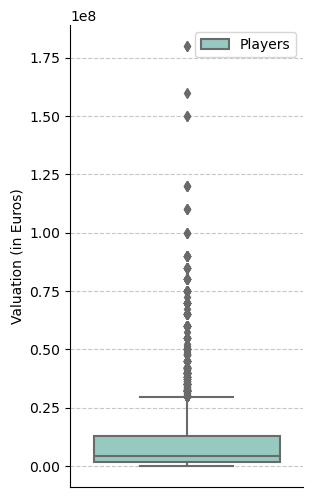

In [836]:
plt.figure(figsize = (3,6))
sns.boxplot(y, palette="Set3")
sns.despine()
plt.ylabel('Valuation (in Euros)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([])
plt.legend(['Players'])
plt.savefig('Valuation_boxplot.png', dpi = 500, bbox_inches = 'tight')
plt.show()


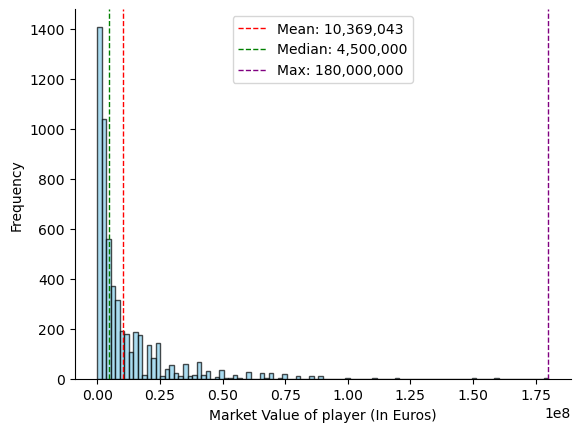

In [837]:
# Set our descriptive measures values
mean_val = y.mean()
median_val = y.median()
max_val = y.max()

plt.figure()
plt.hist(final_df.sort_values(by='Valuation')['Valuation'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')

# Plot descriptive measures
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:,.0f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:,.0f}')
plt.axvline(max_val, color='purple', linestyle='dashed', linewidth=1, label=f'Max: {max_val:,.0f}')

plt.xlabel('Market Value of player (In Euros)')
plt.ylabel('Frequency')
plt.legend()
sns.despine()
plt.savefig('Valuation_histogram.png', dpi = 300)
plt.show()


From our plots, we can see that most of our valuations lie between 1,800,000 and 13,000,000 (our interquartile range). We can also see that the distribution is very heavily skewed to the right.

# Next steps

Our next steps will be as follows:
- Fully integrate all categorical features into final dataframe - including Nation and Team.
- Address target variable skewness with potential log transformation.
- Look to reduce feature set

Upon completing above steps and obtaining a final dataframe, we can proceed to start modeling.